In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers


%matplotlib inline

C:\Users\aman tyagi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

In [3]:
def denoise(data):  
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len) 
    threshold = 0.04 

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev) 
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym4')# Tái cấu trúc dữ liệu từ các hệ số đã xử lý để tạo ra tín hiệu đã được làm sạch
    
    return datarec

In [4]:
path = './mitbih_database/'
window_size = 180
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

In [5]:
# Read files
filenames = next(os.walk(path))[2]#Sử dụng os.walk() để lấy danh sách tất cả các tệp trong thư mục được chỉ định bởi biến path. [2] chỉ trả về danh sách tên các tệp trong thư mục đó.

# Split and save .csv , .txt 
records = list()
annotations = list()
filenames.sort()

In [6]:
# segrefating filenames and annotations
for f in filenames:
    filename, file_extension = os.path.splitext(f) #trích xuất phần mở rộng của tên tệp
    
    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

650000


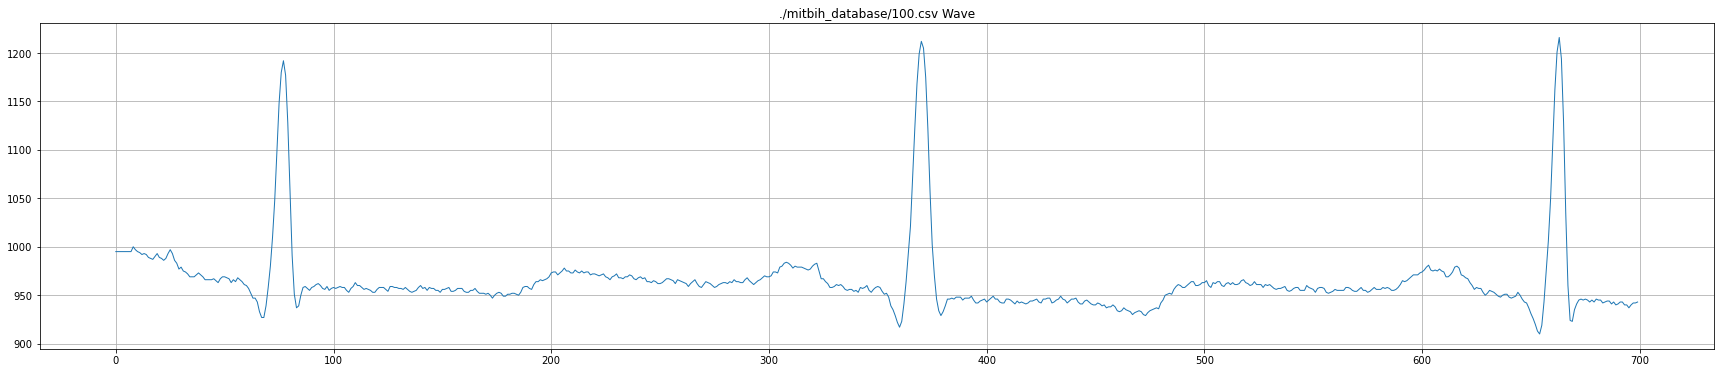

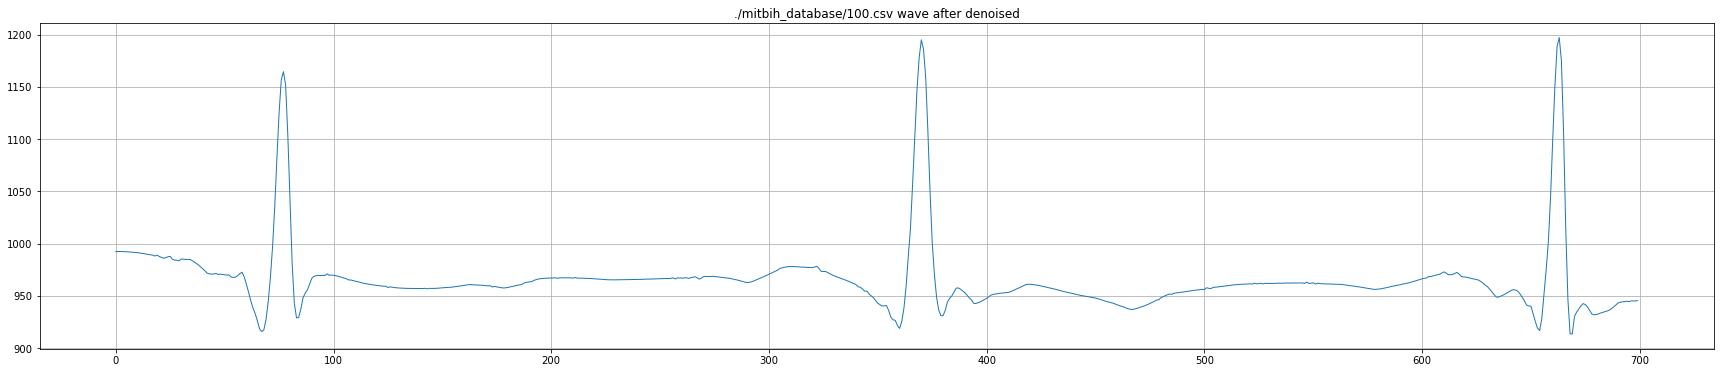

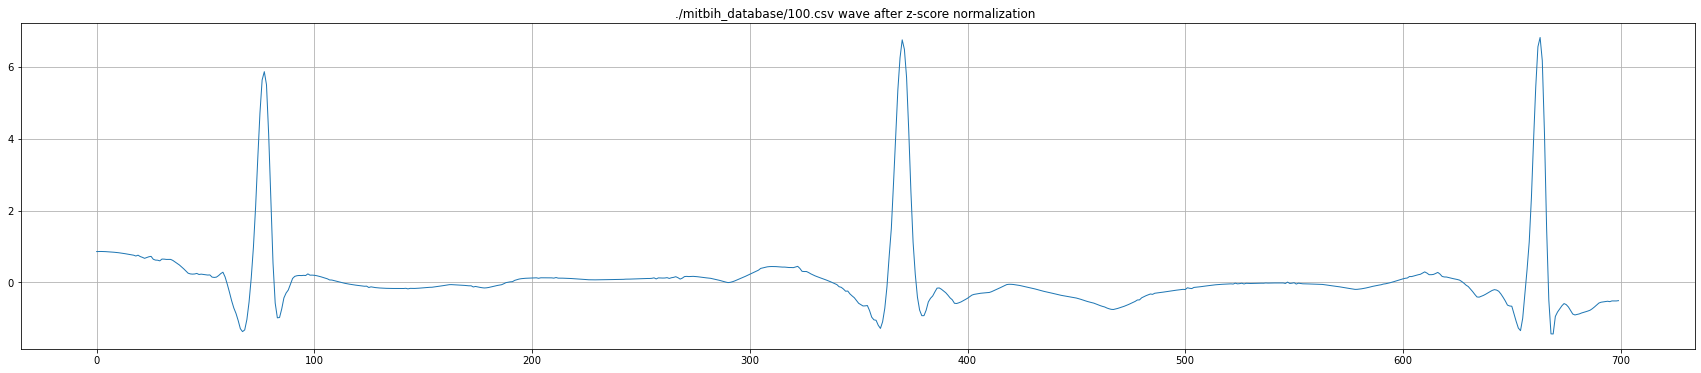

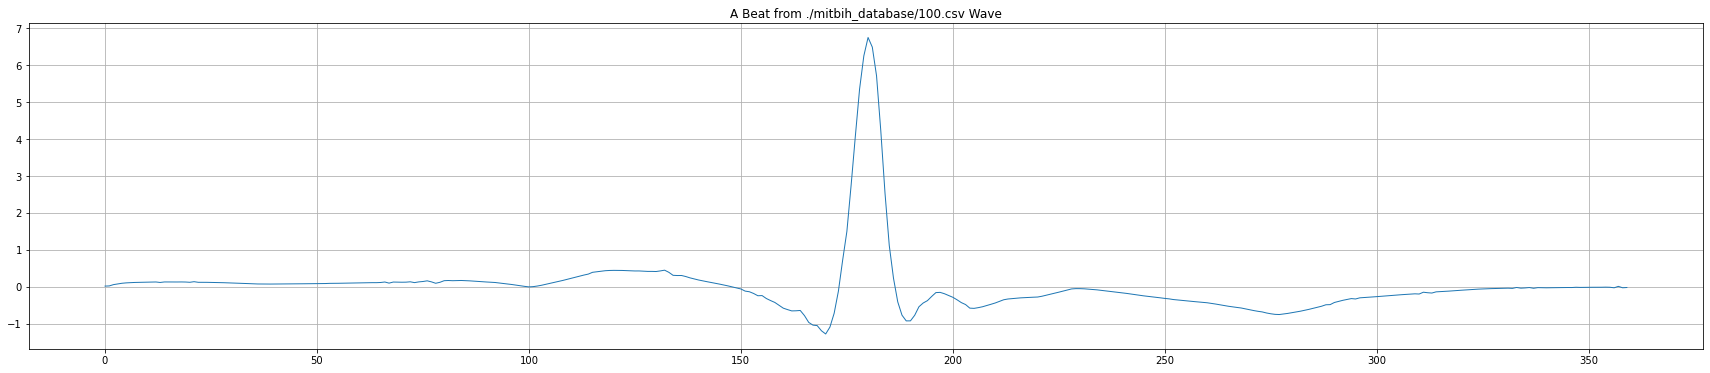

650000


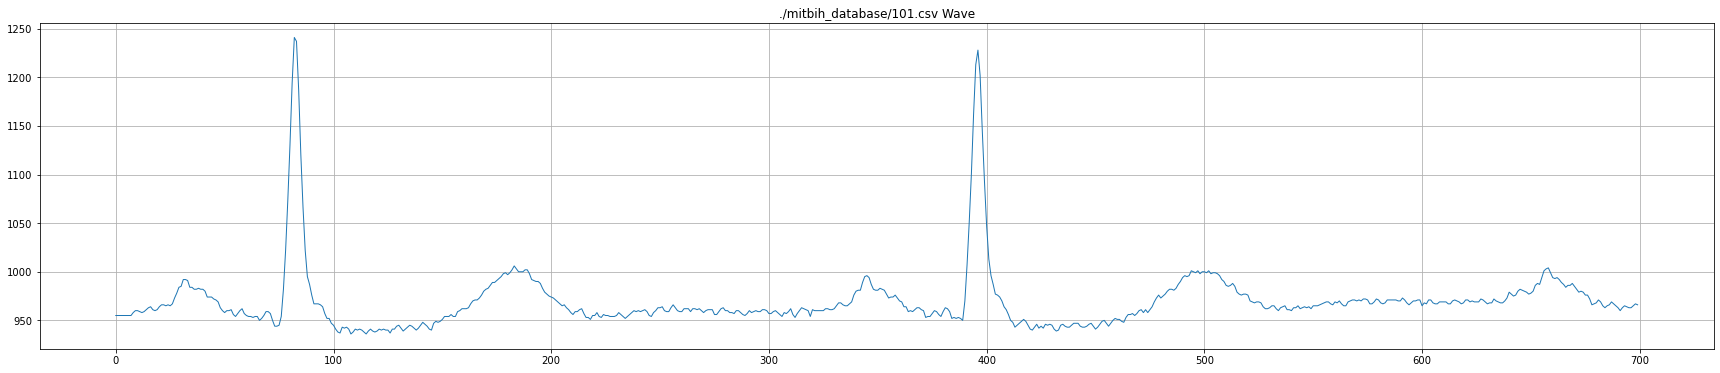

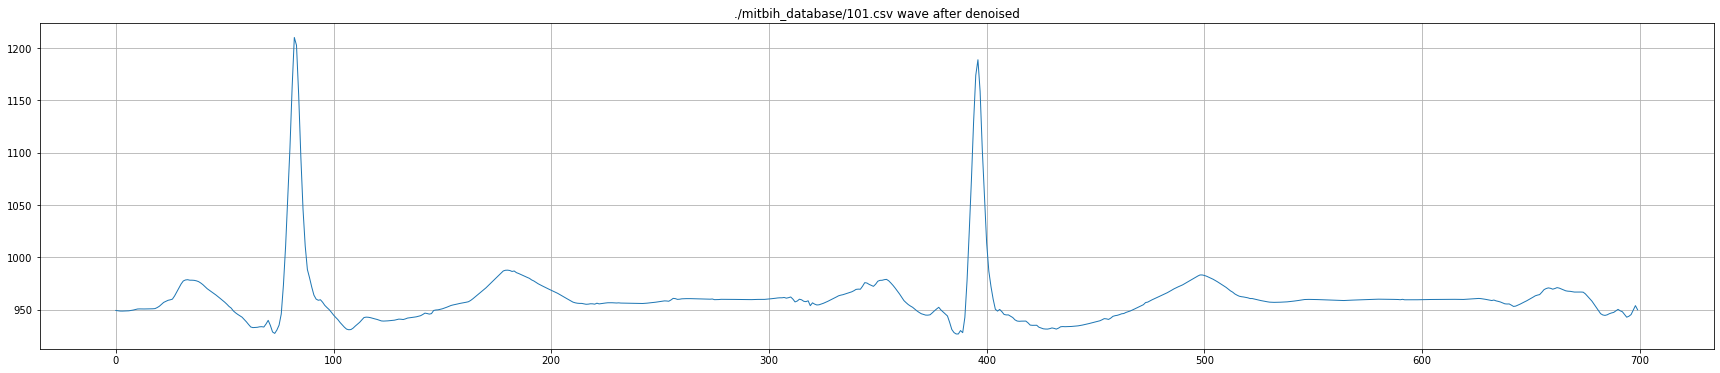

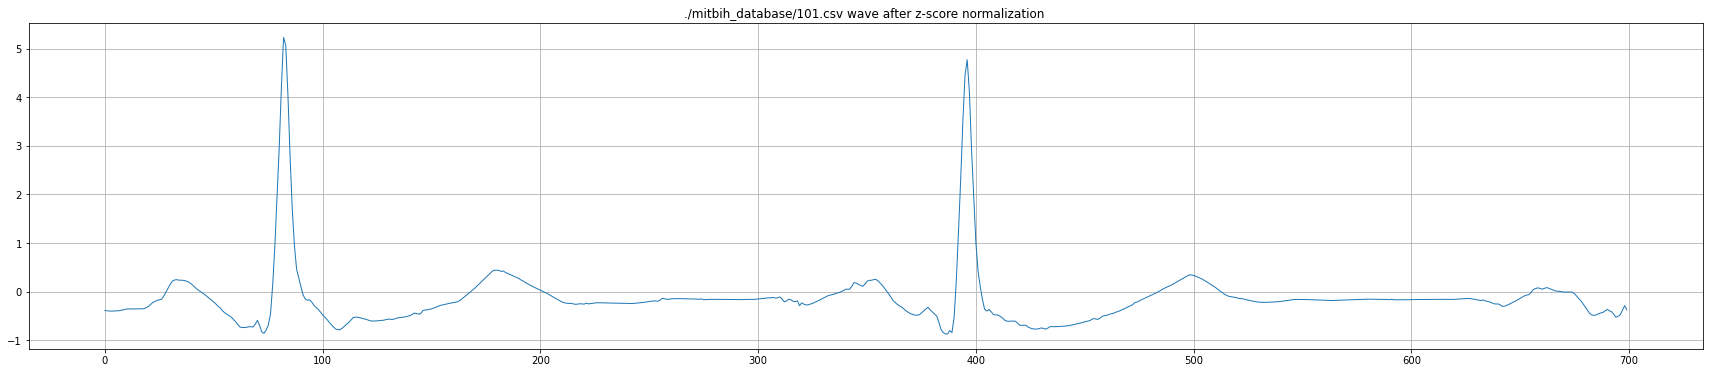

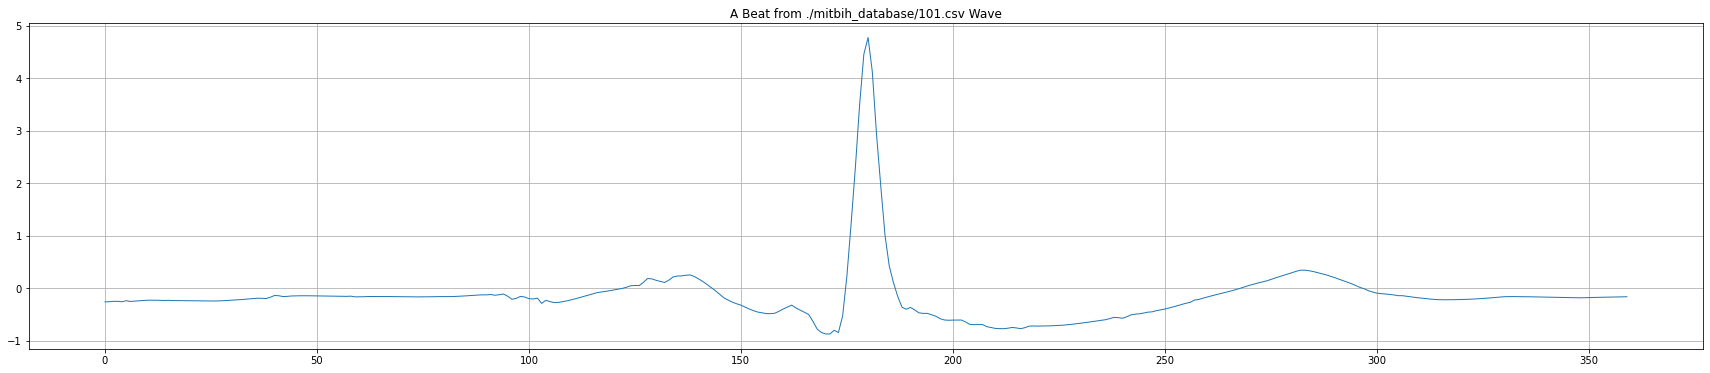

650000


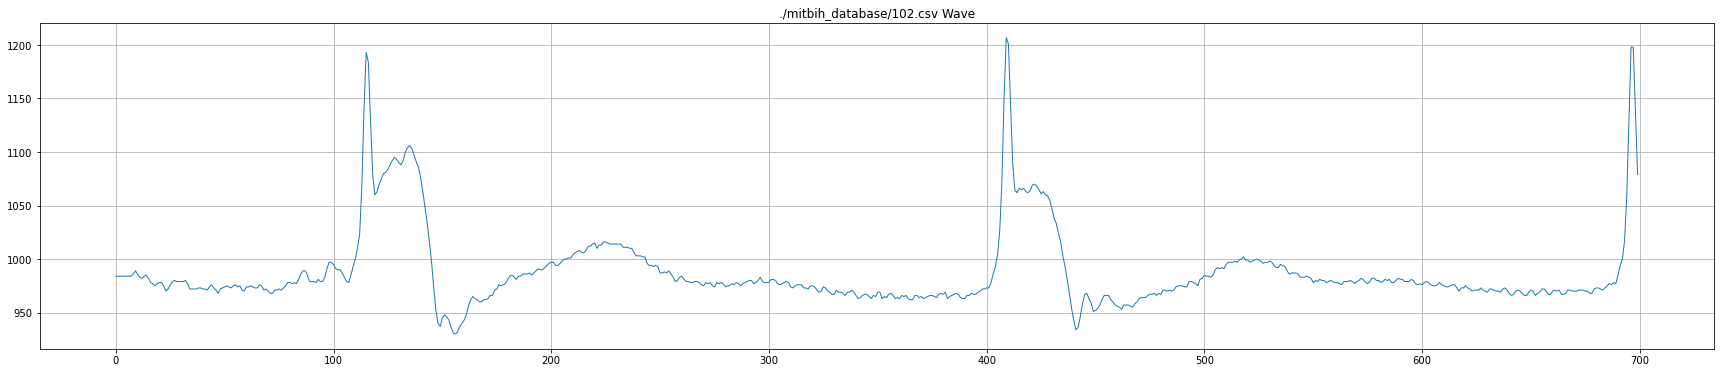

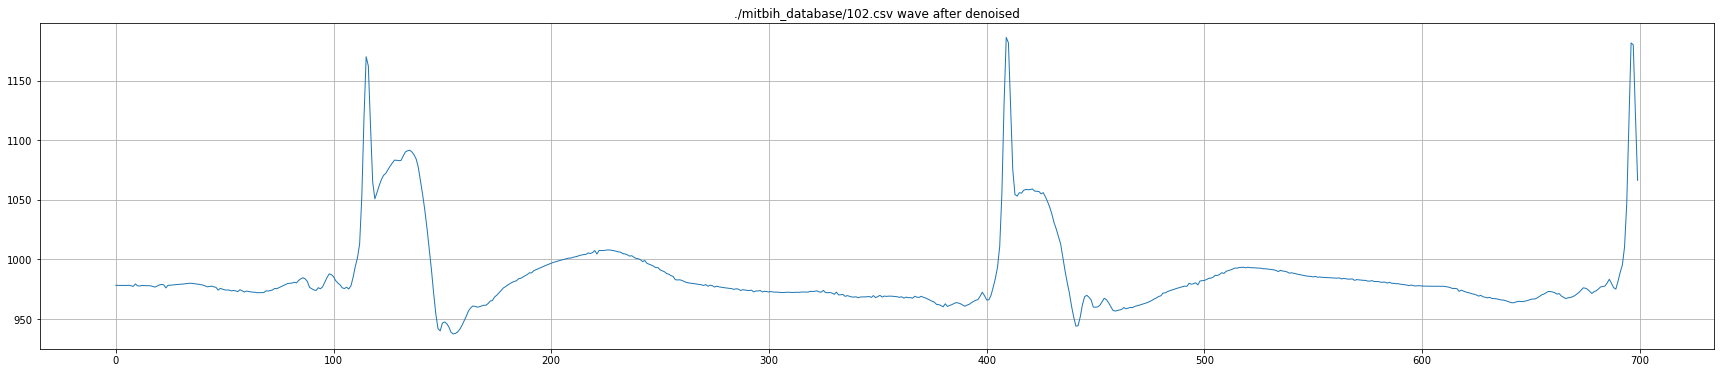

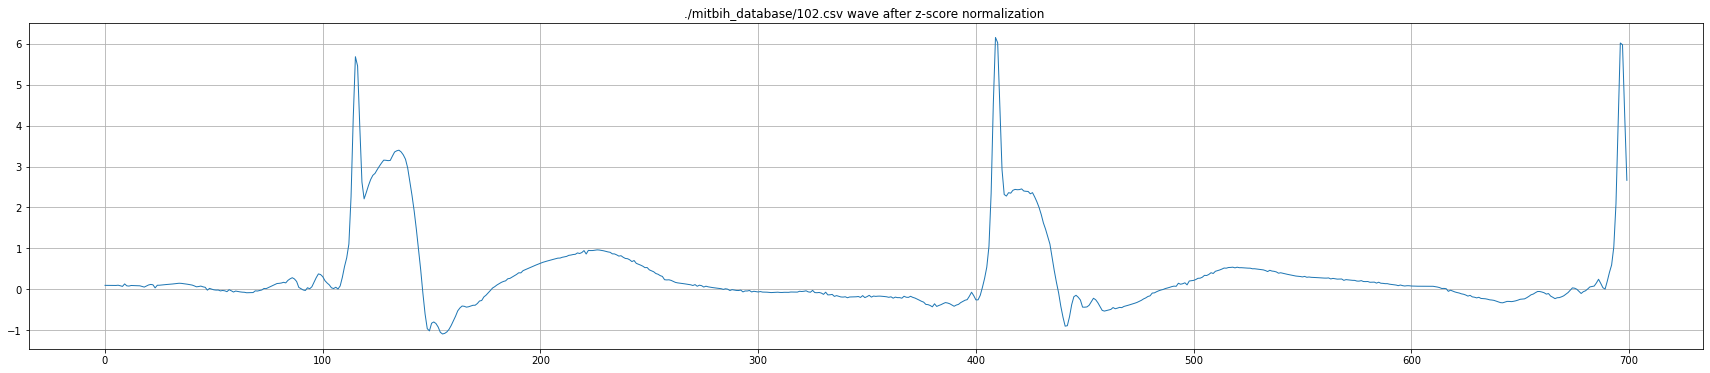

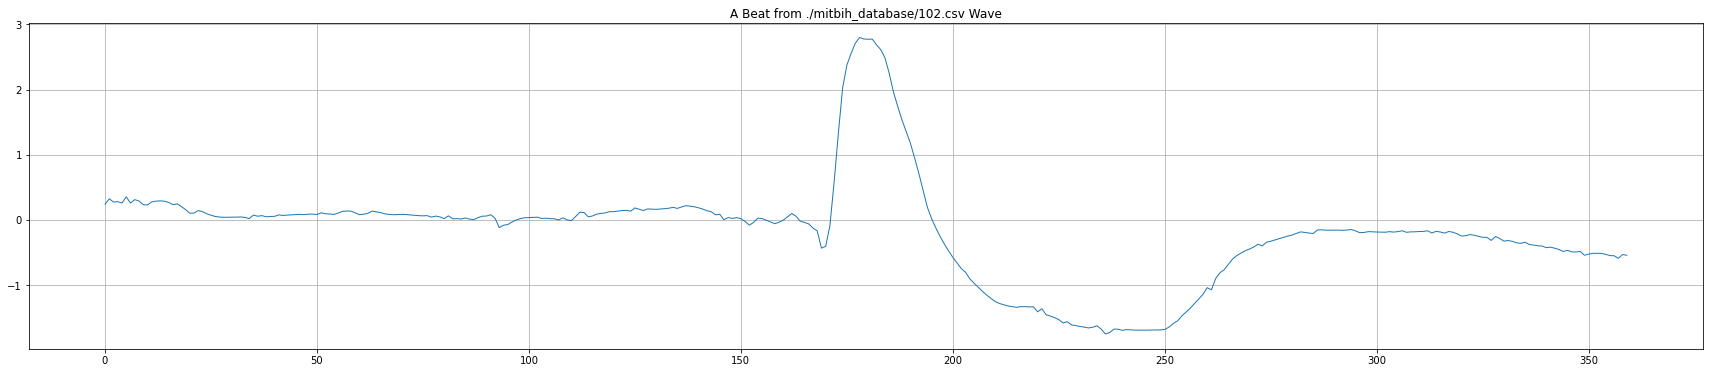

650000


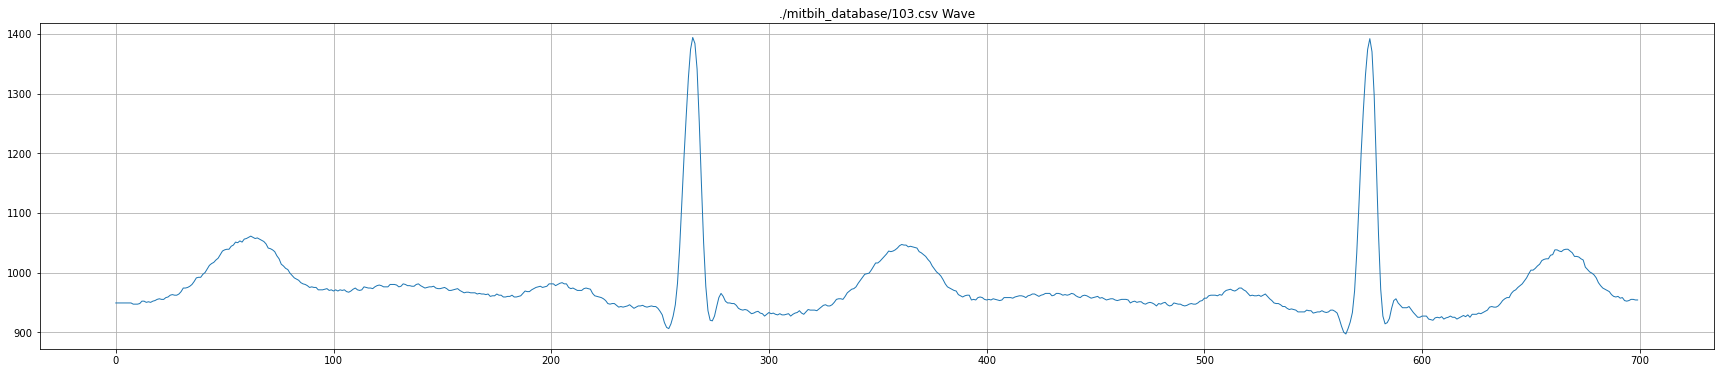

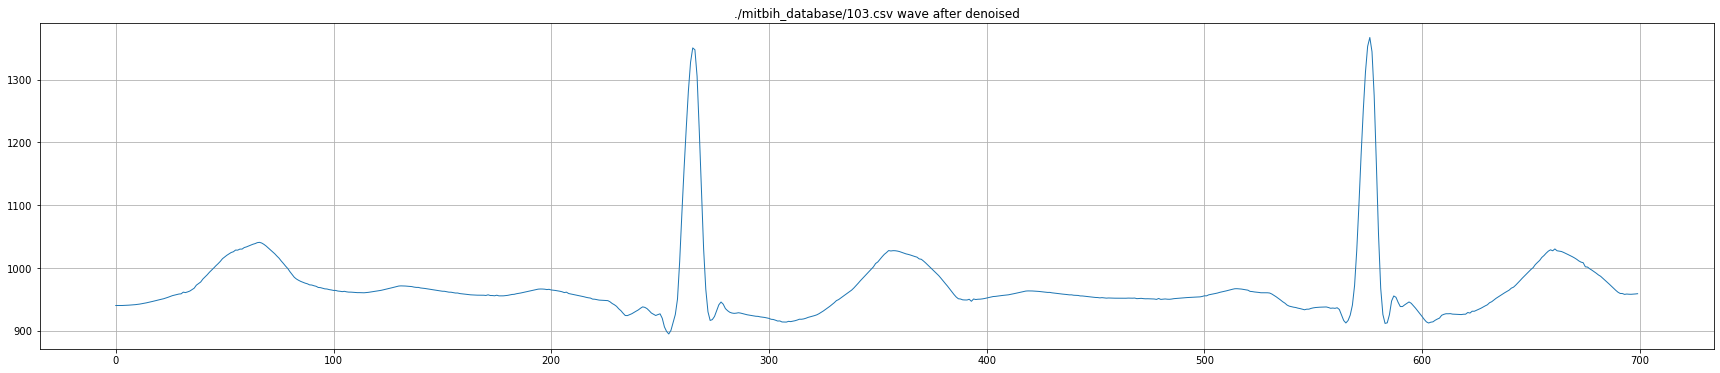

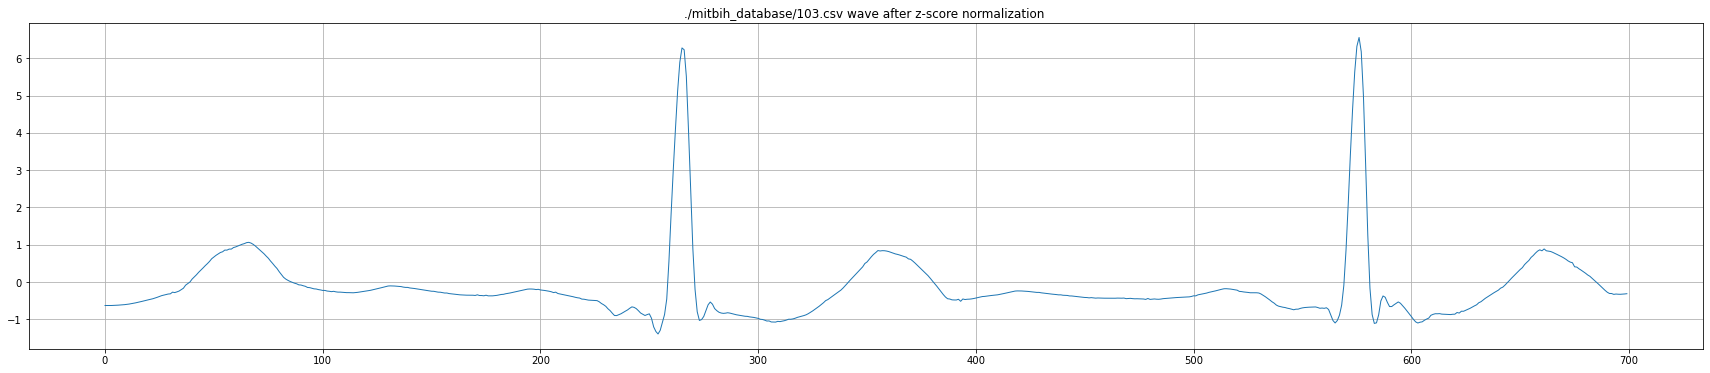

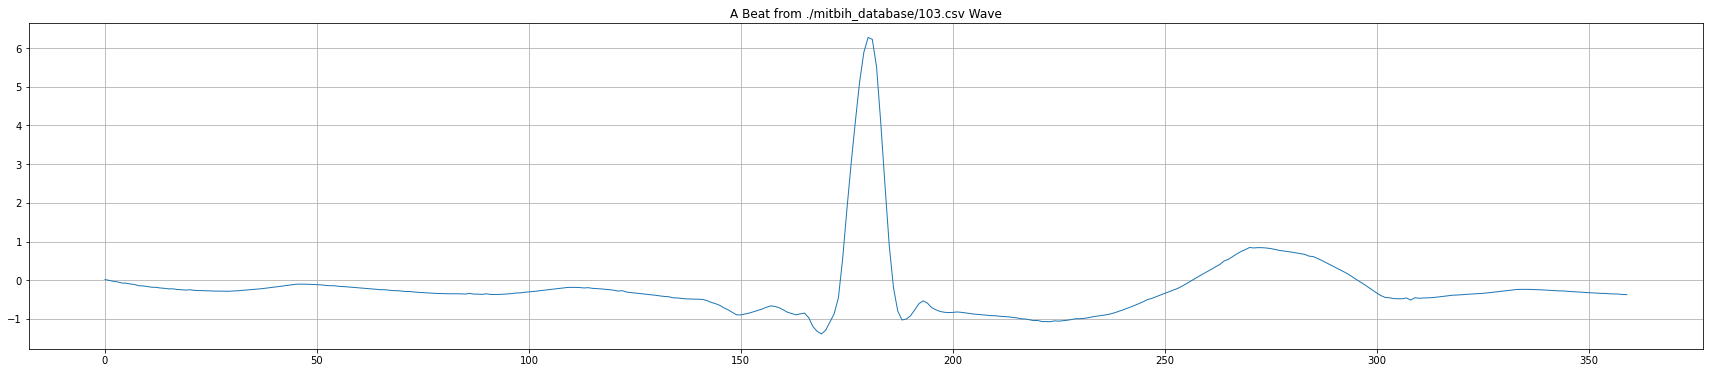

650000


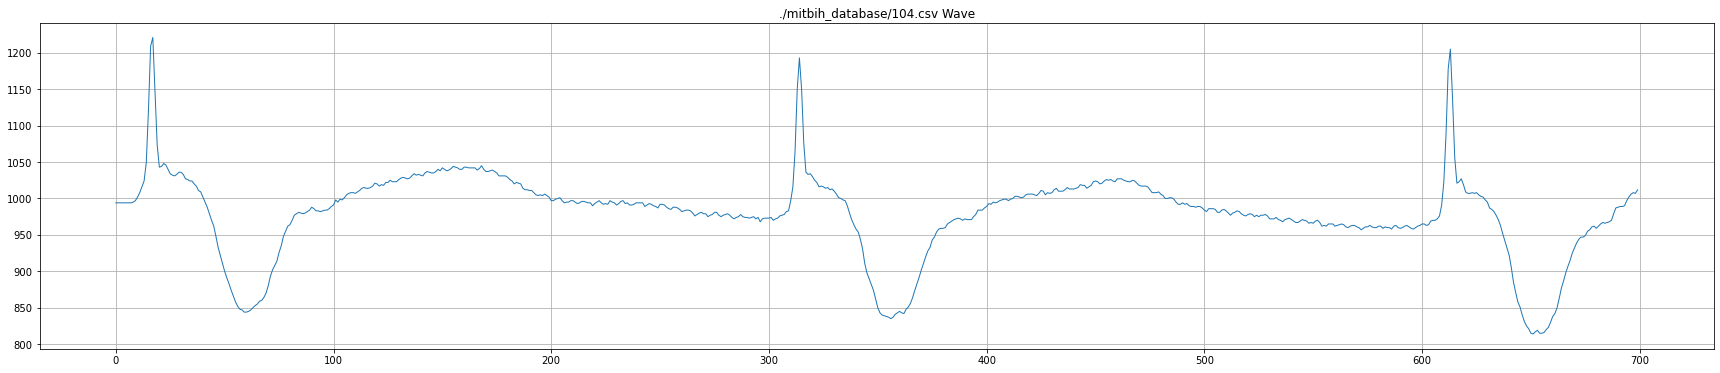

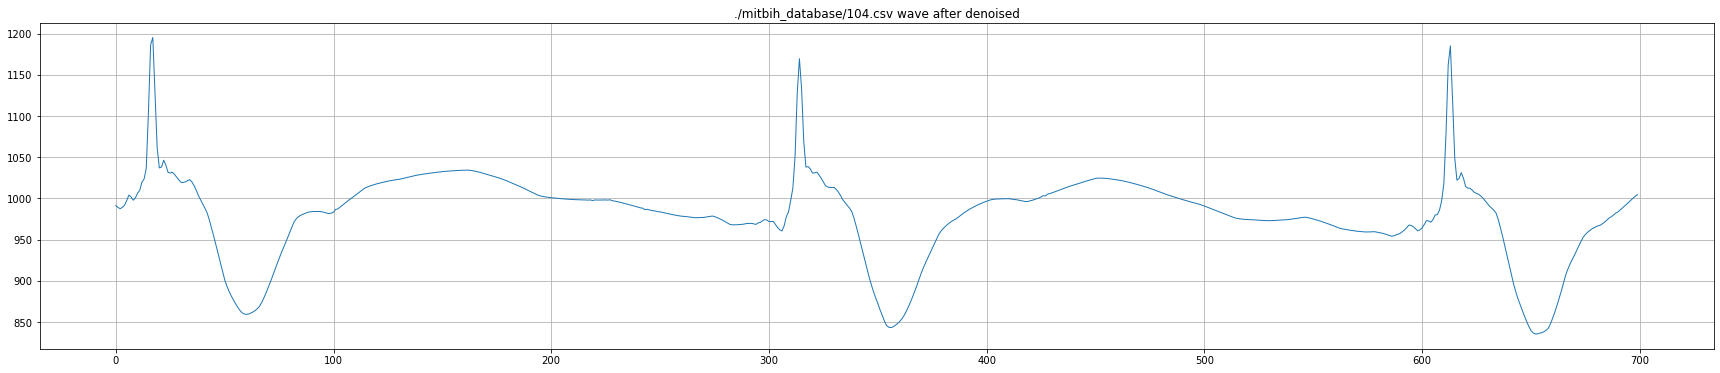

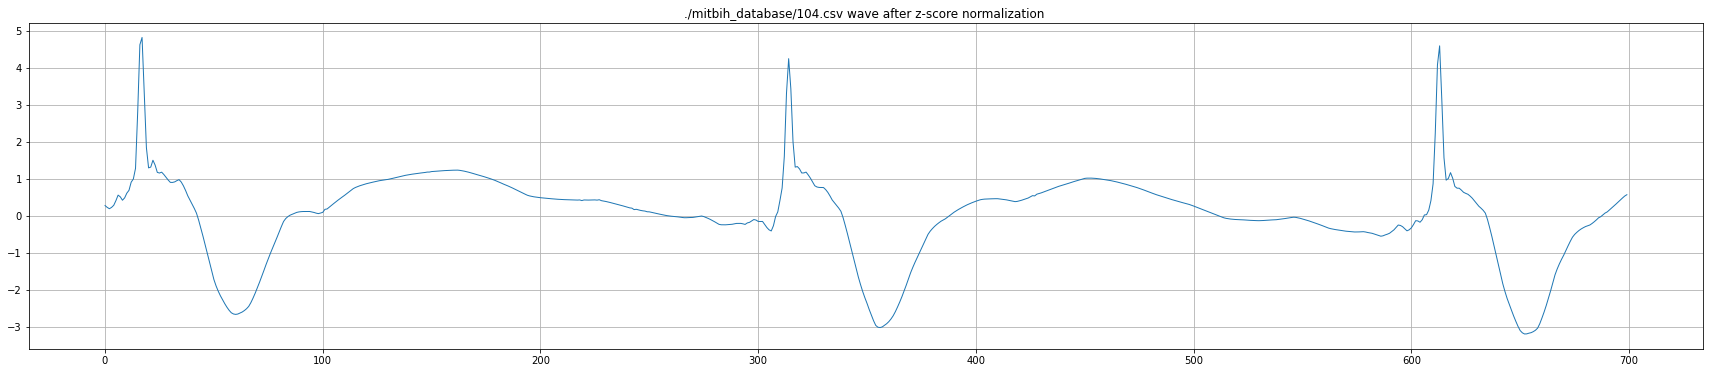

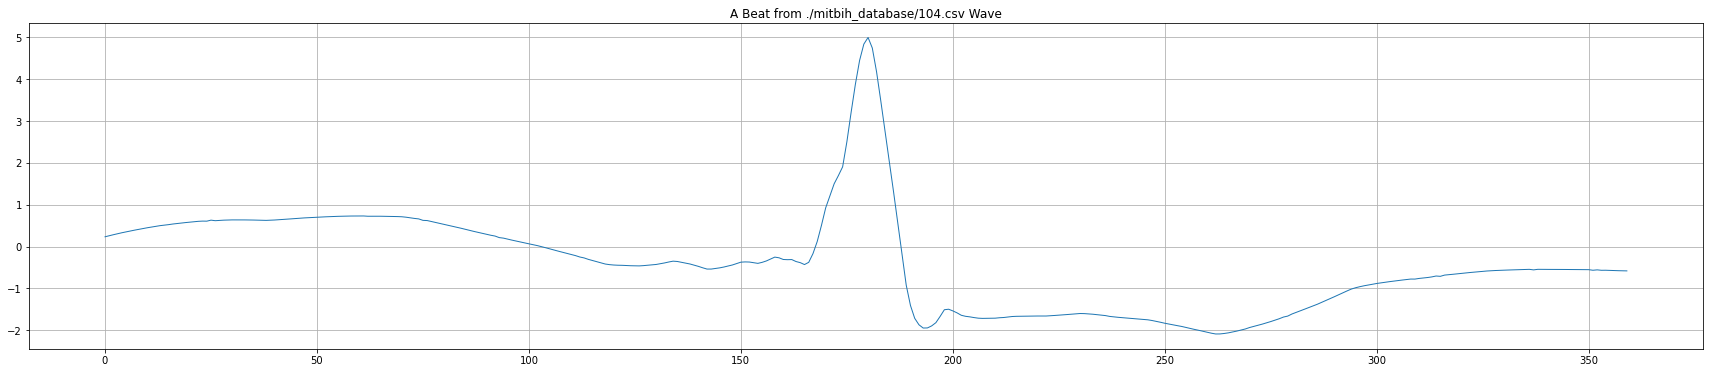

650000


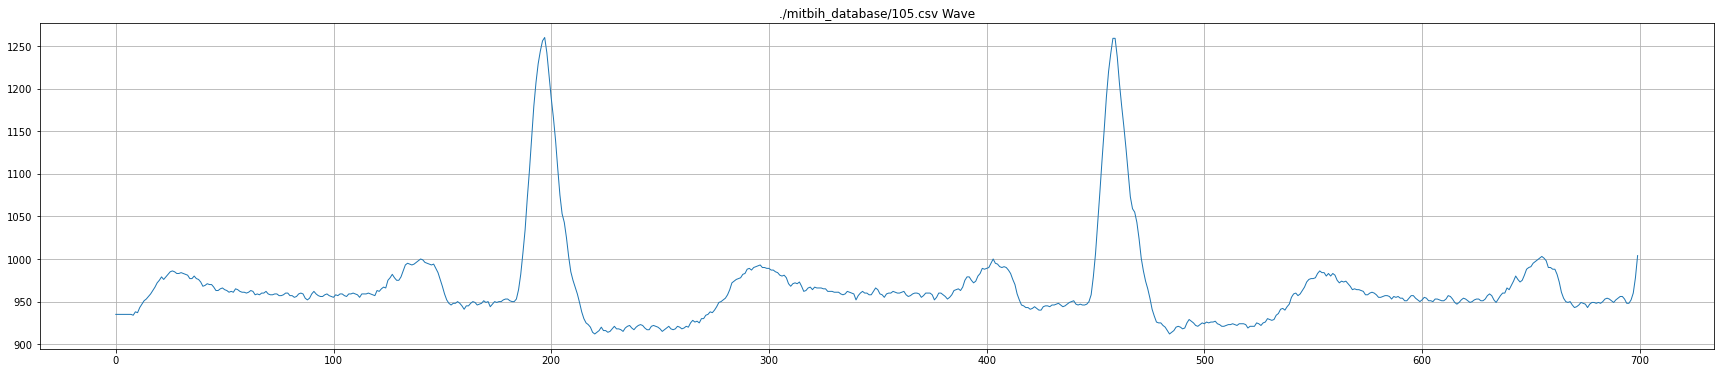

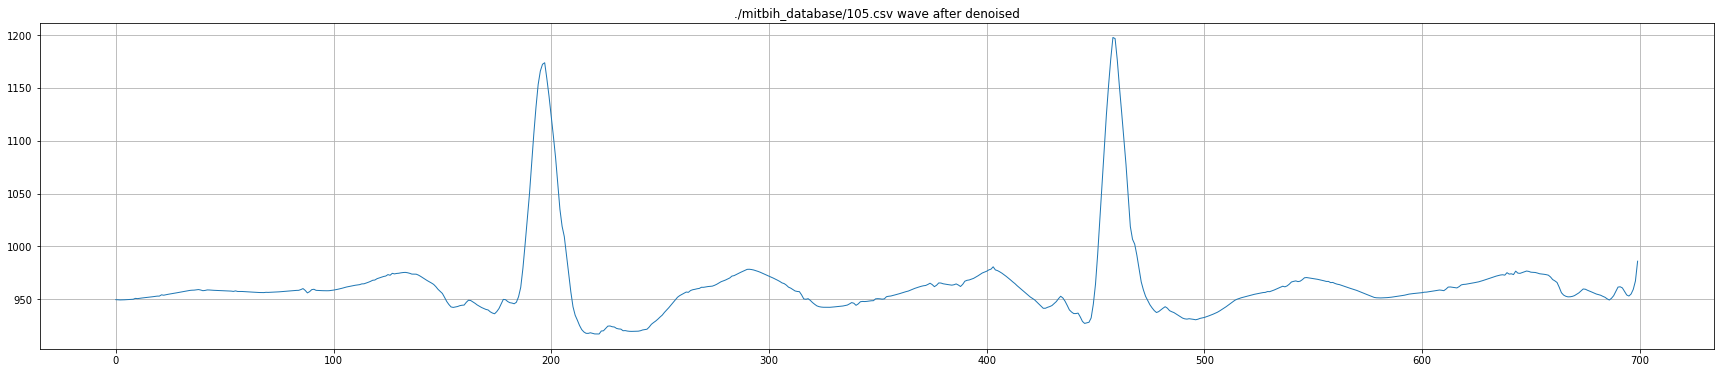

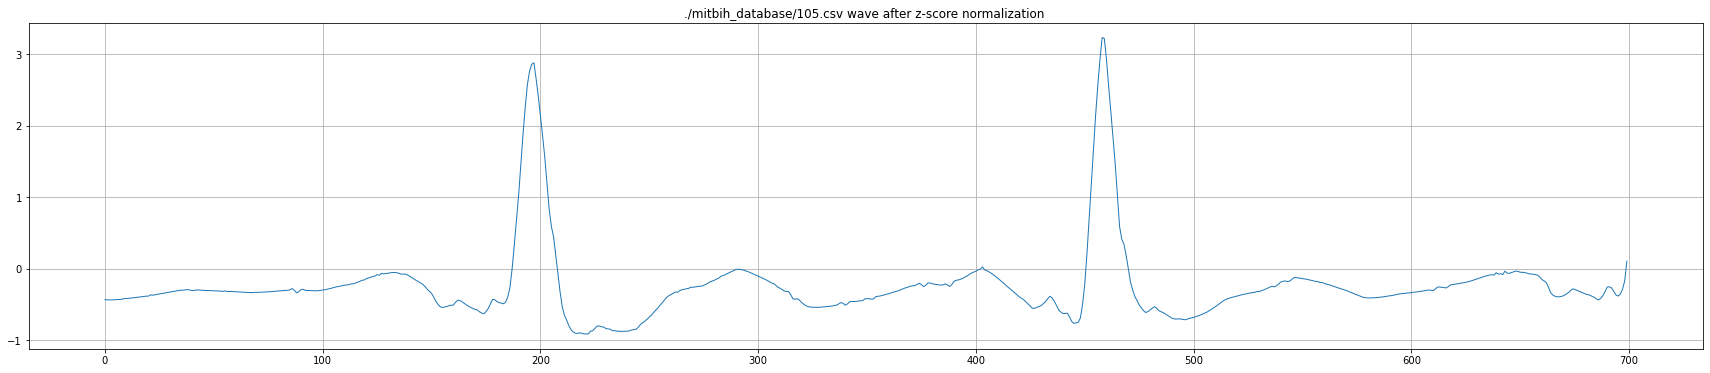

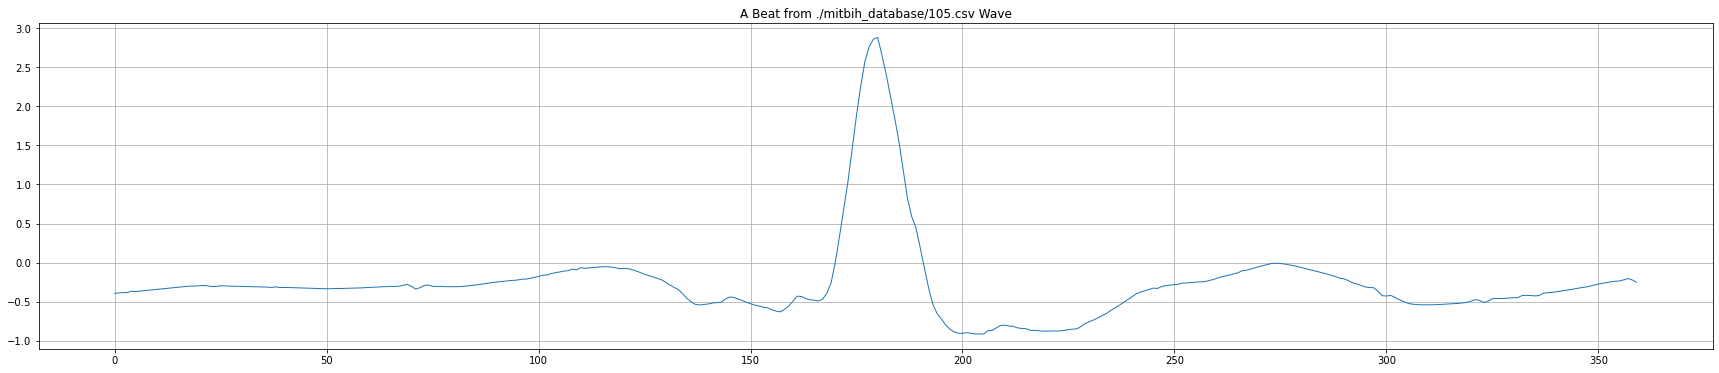

650000


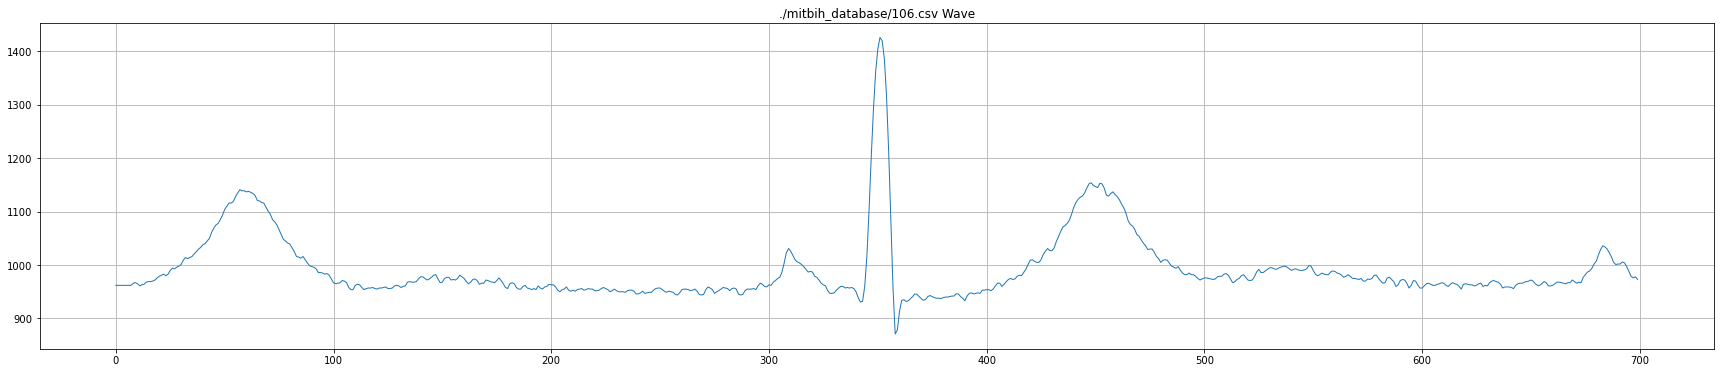

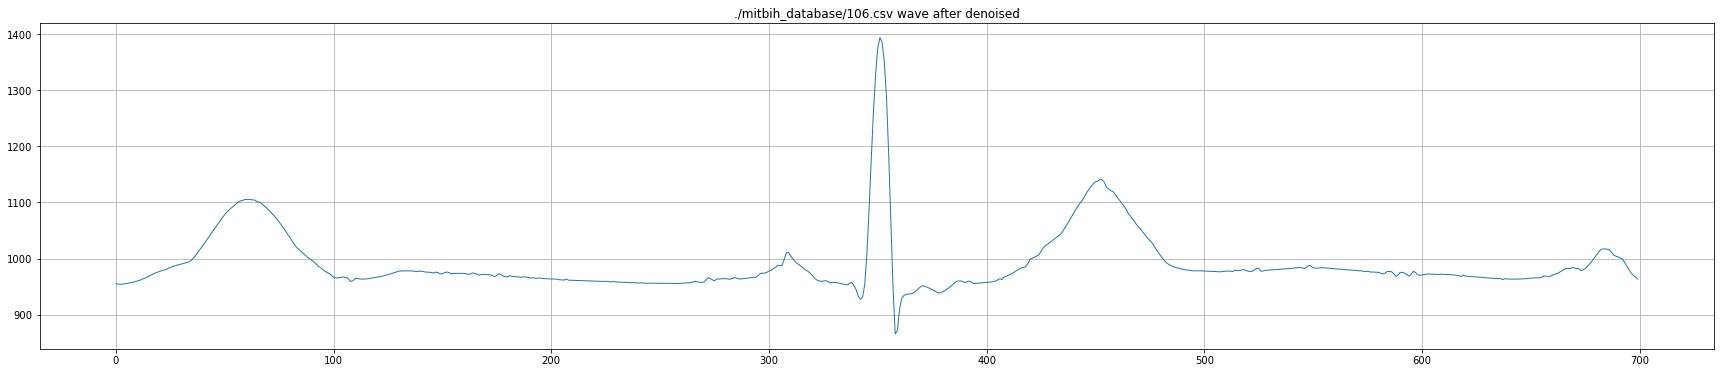

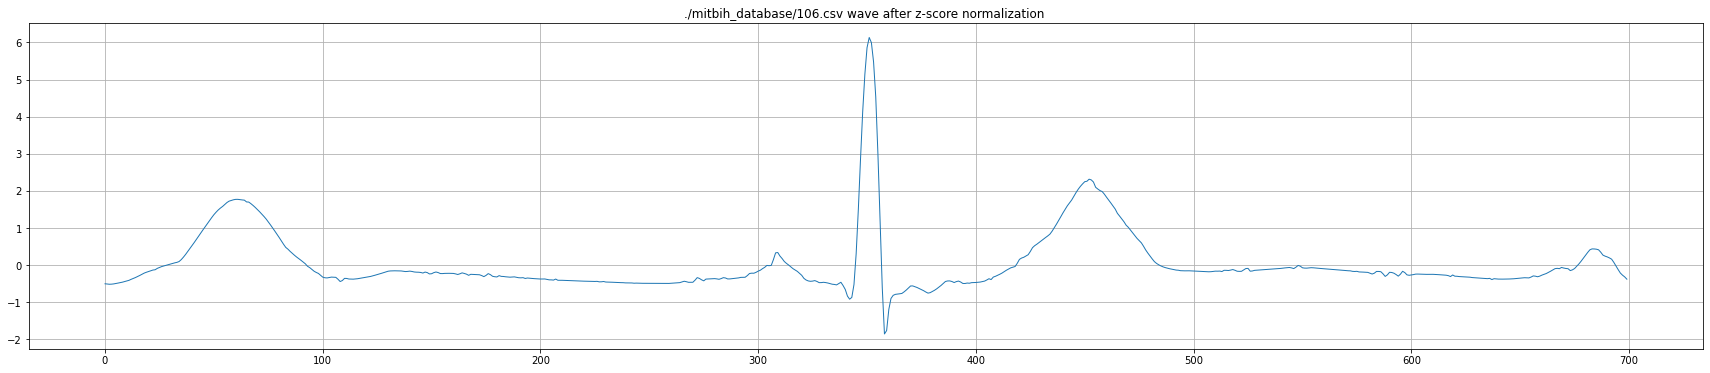

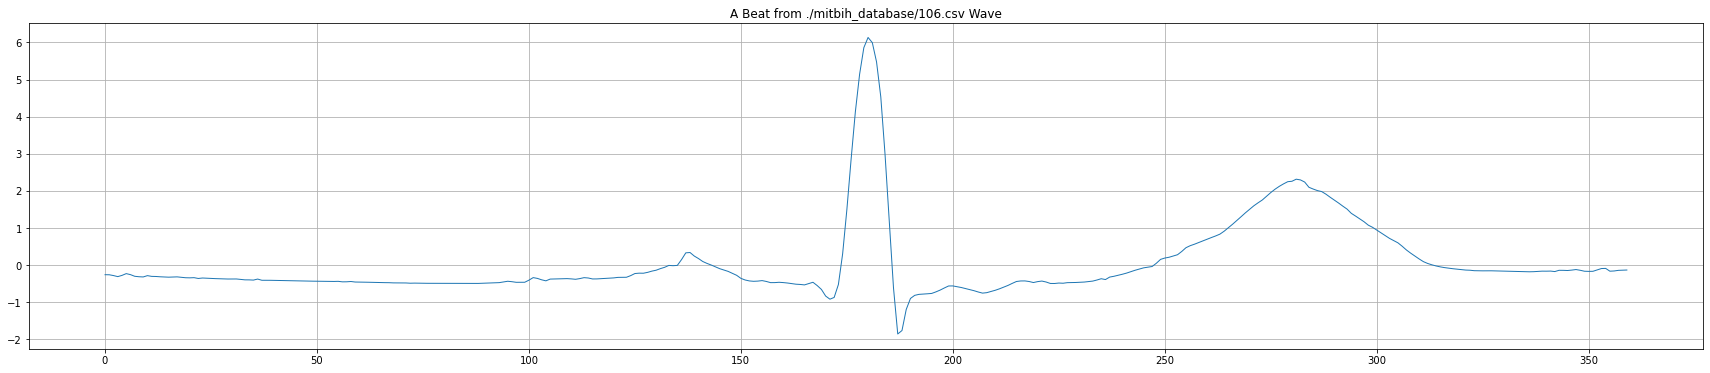

650000


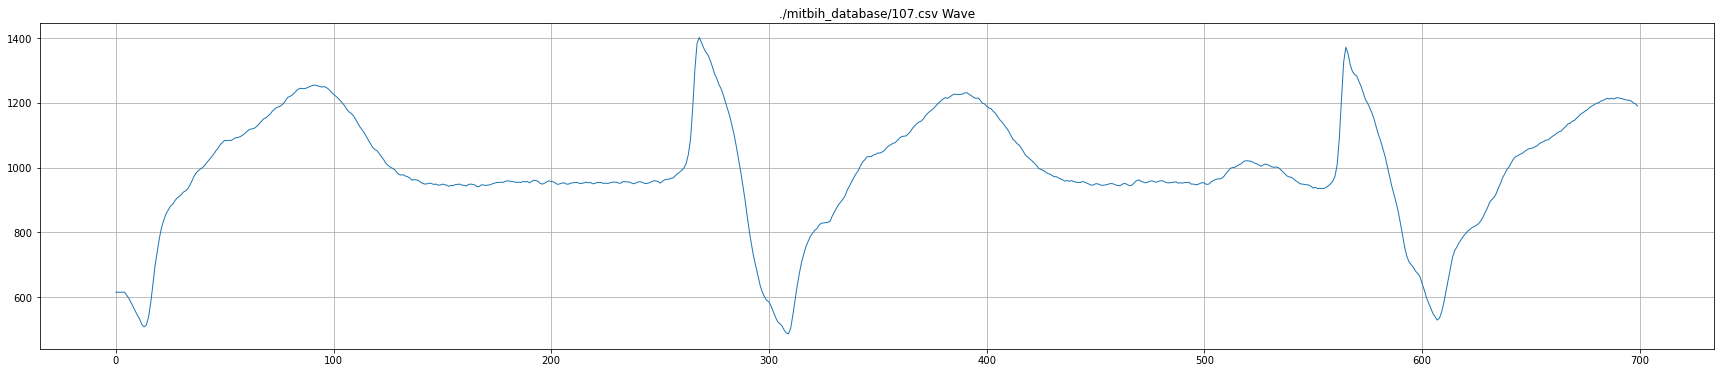

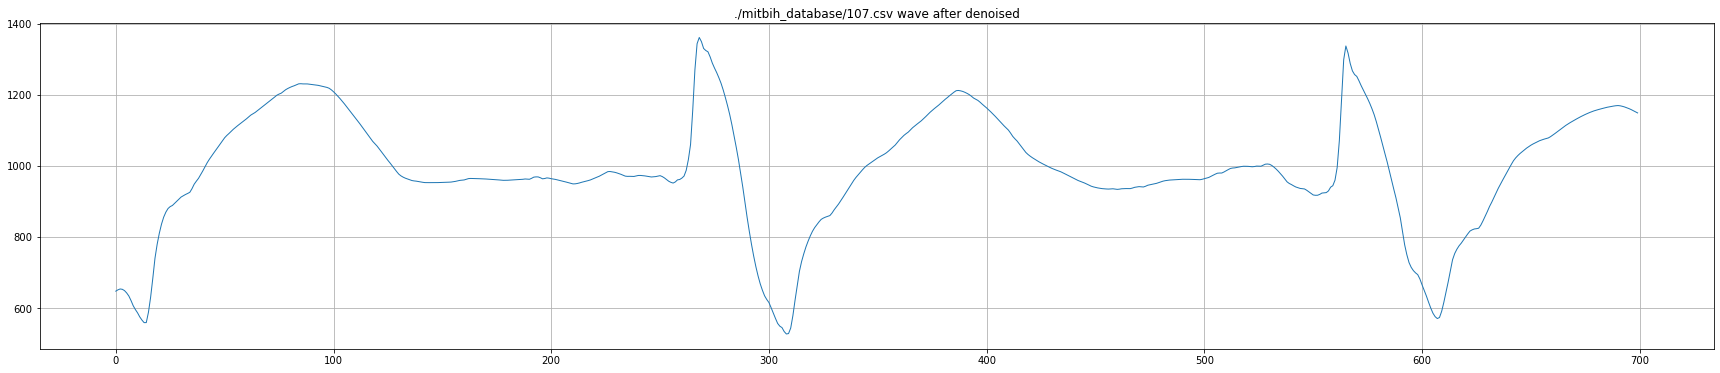

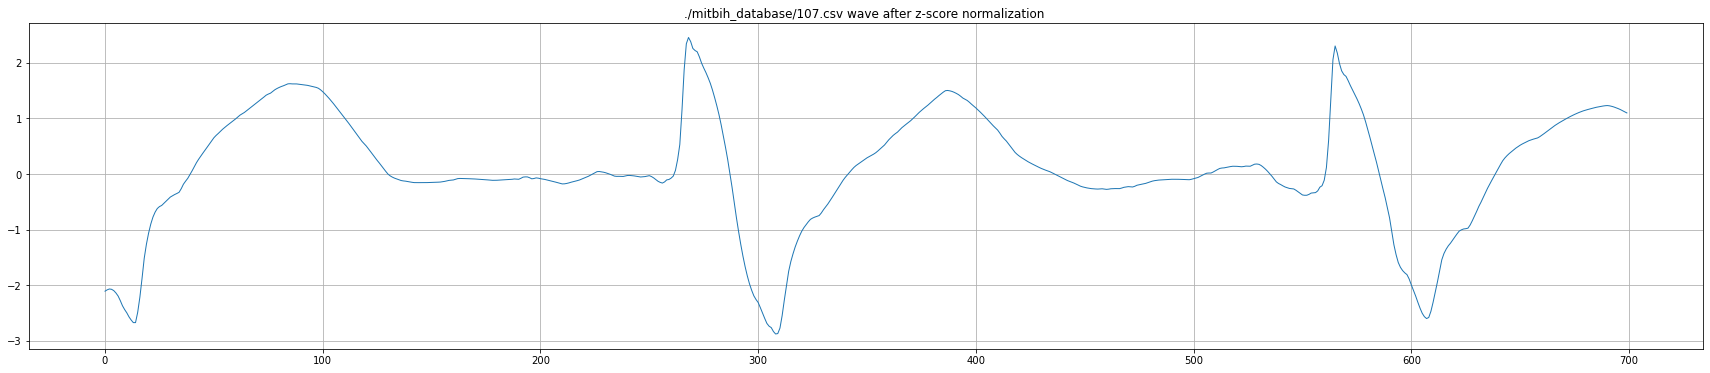

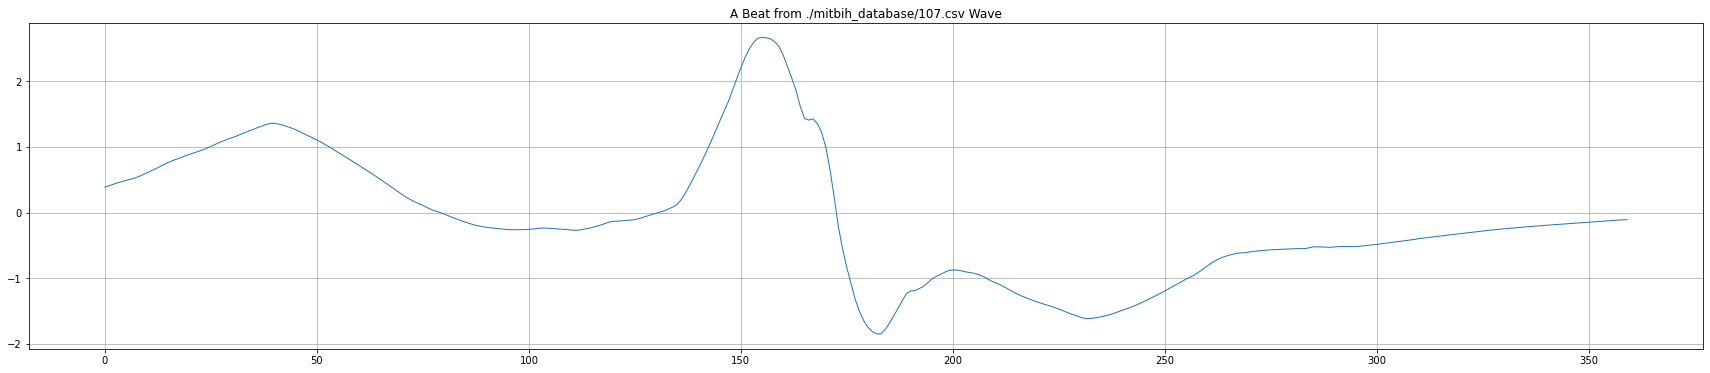

650000


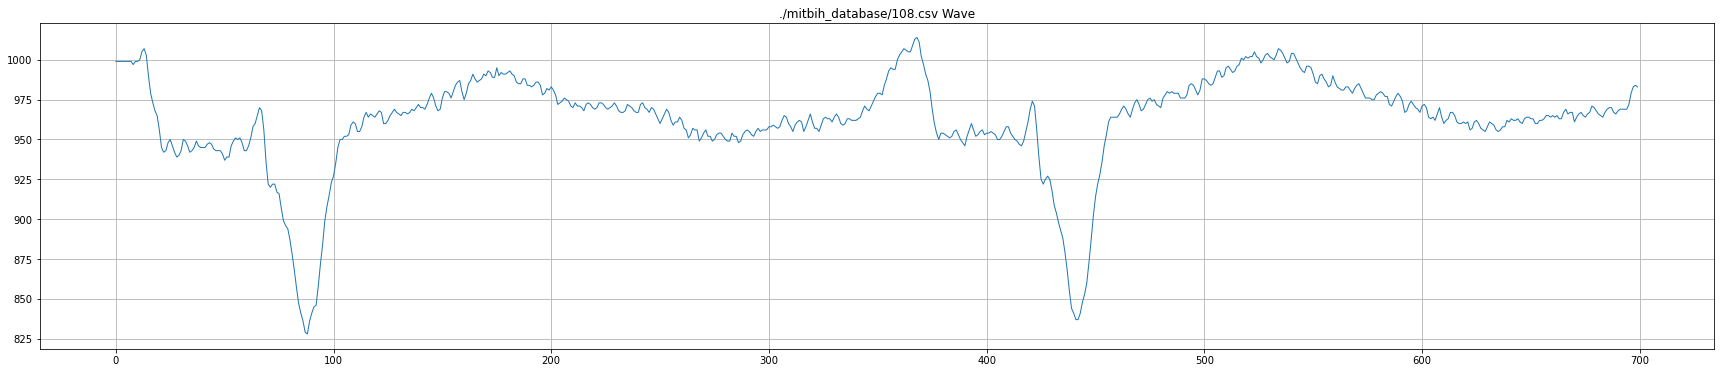

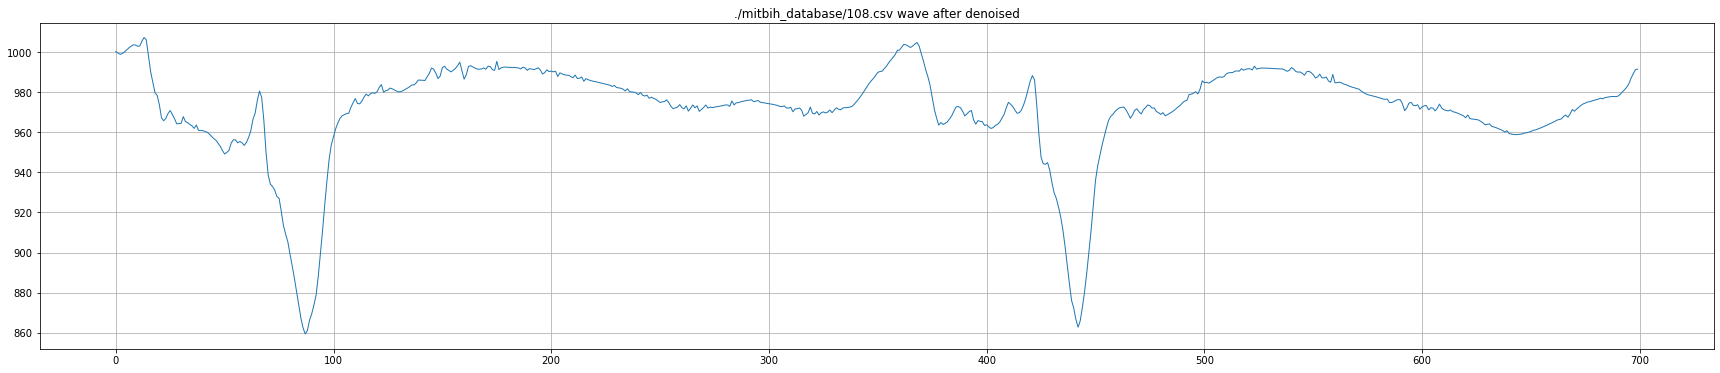

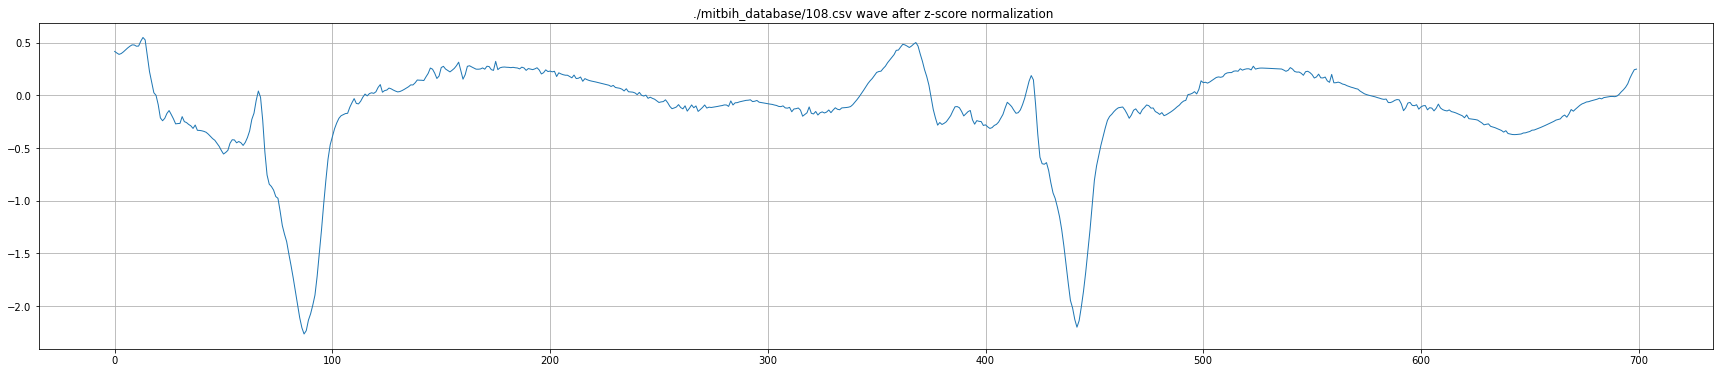

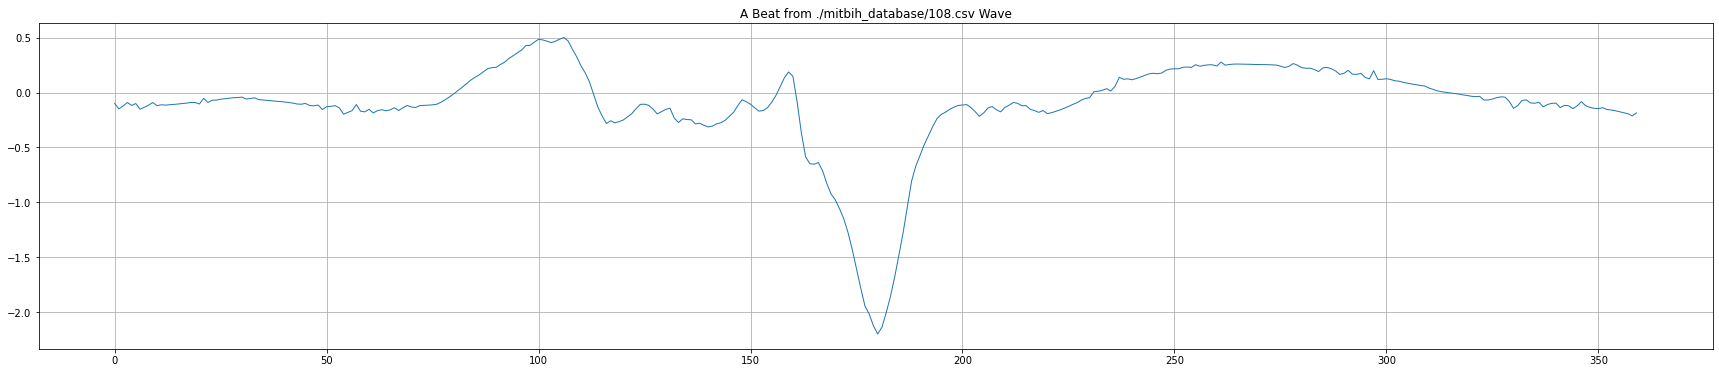

650000


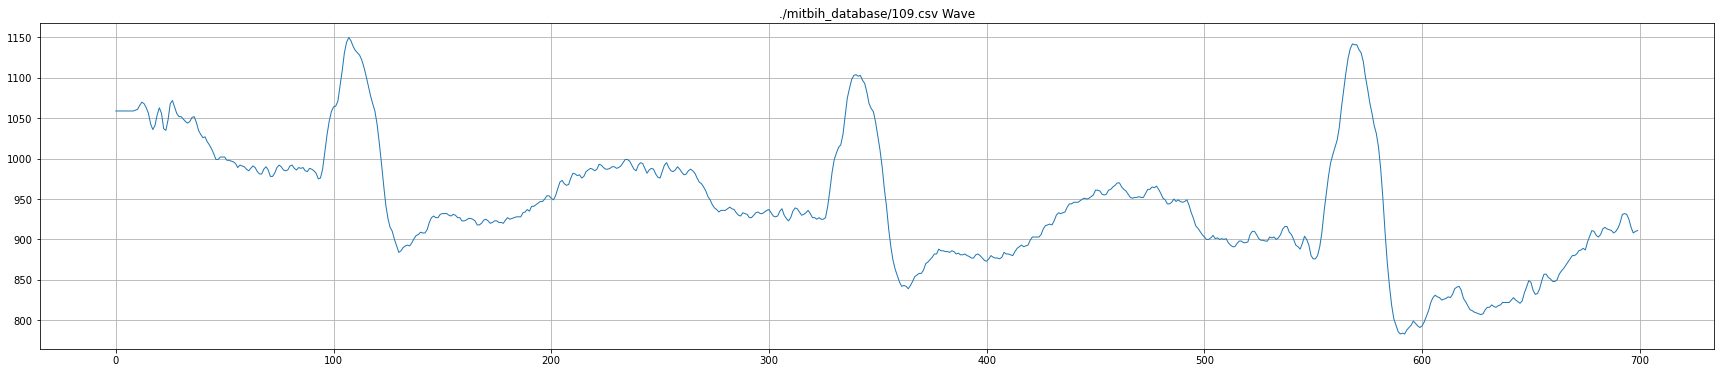

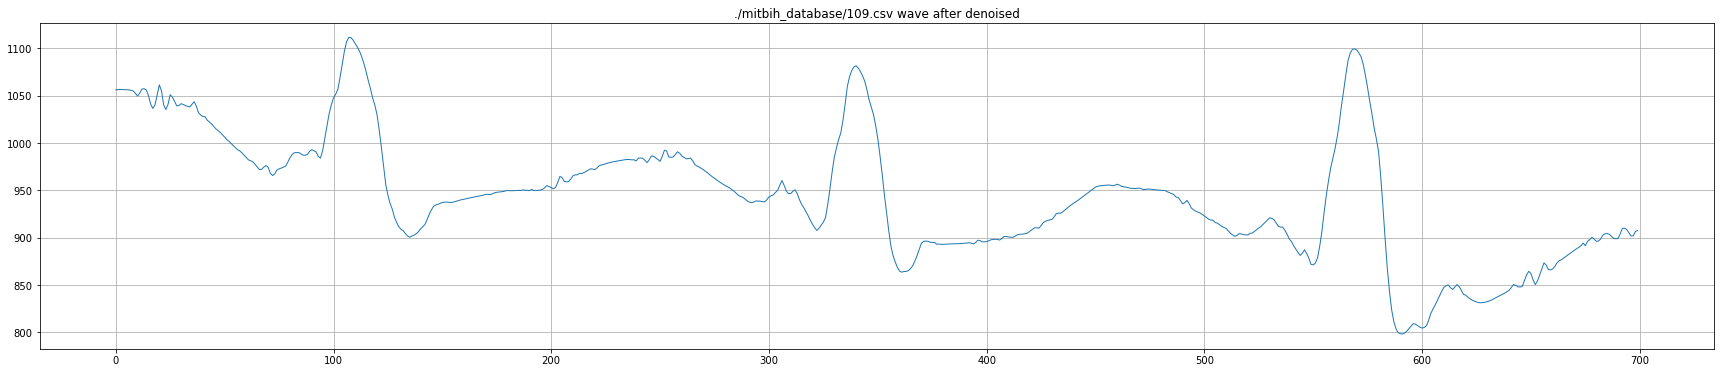

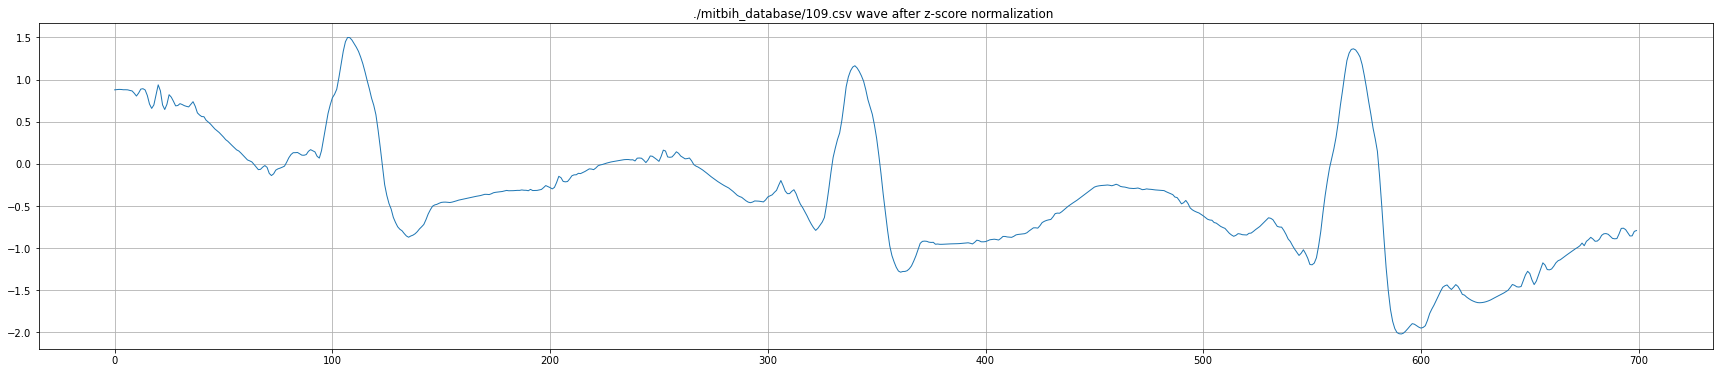

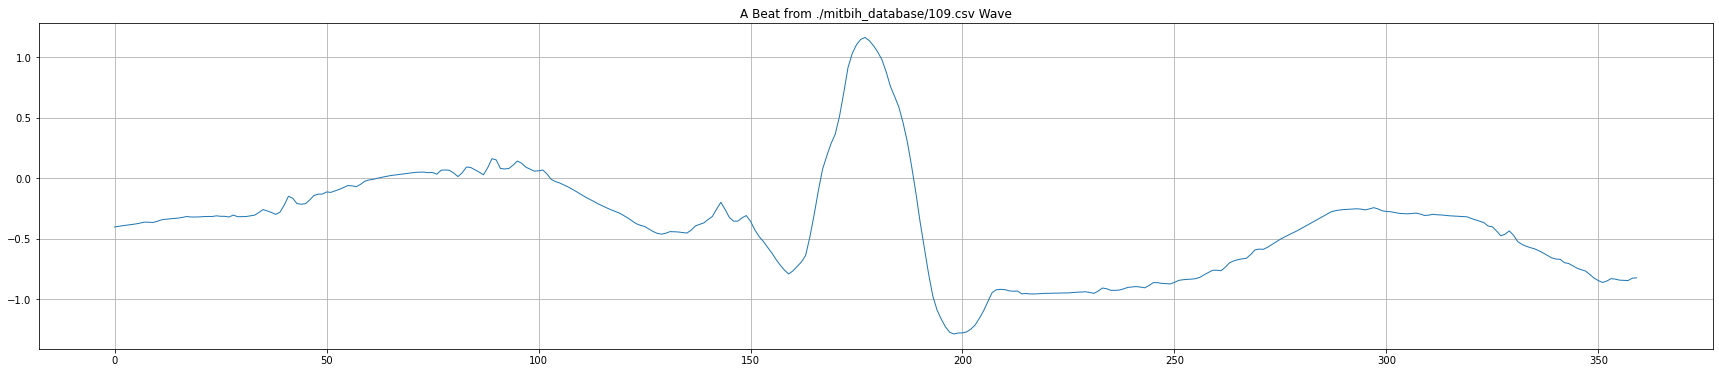

650000


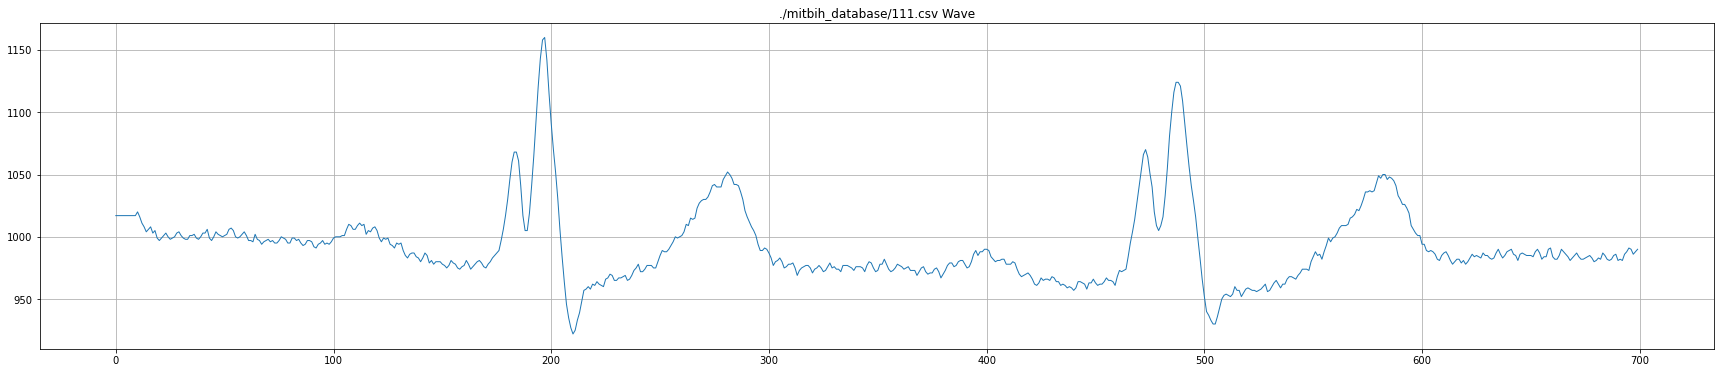

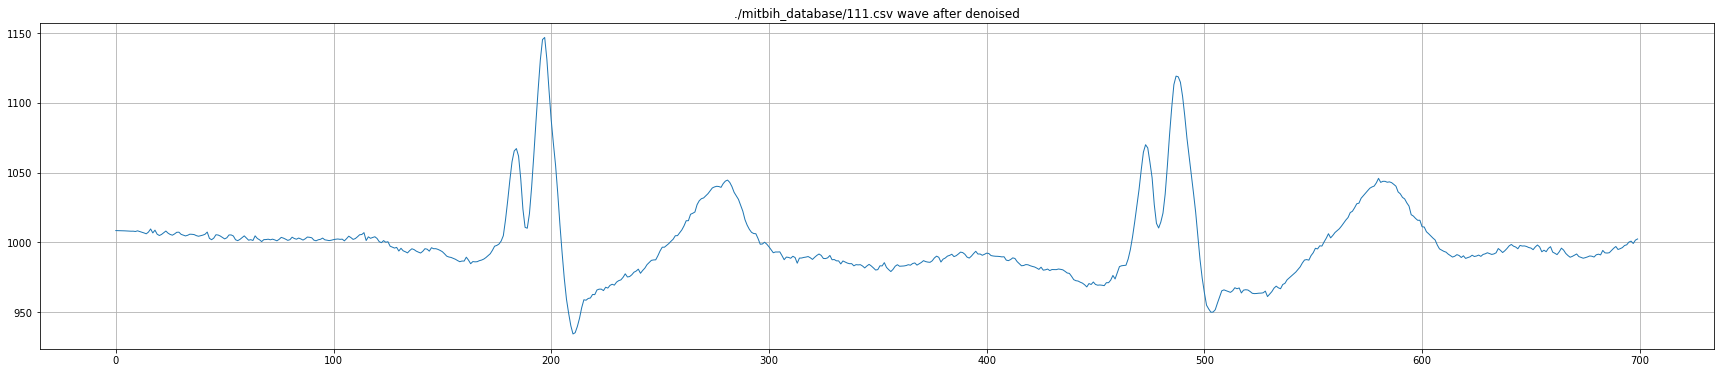

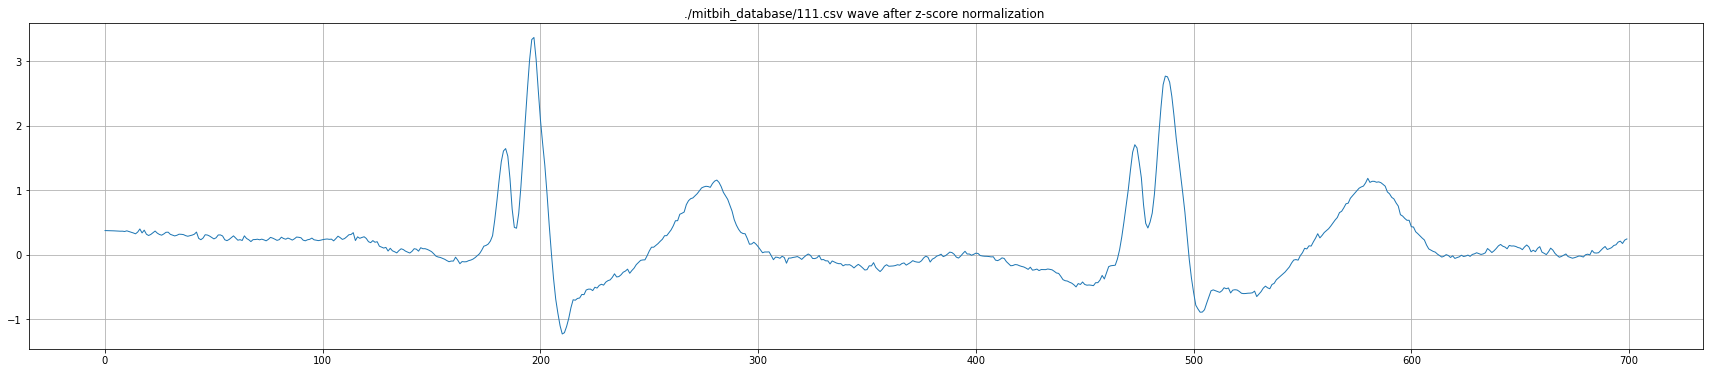

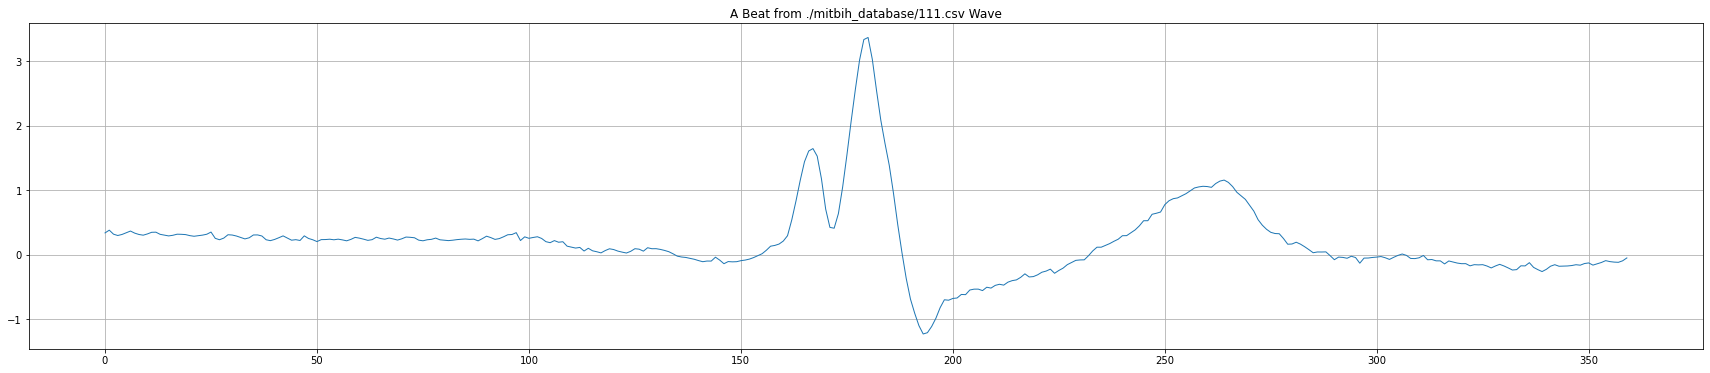

650000


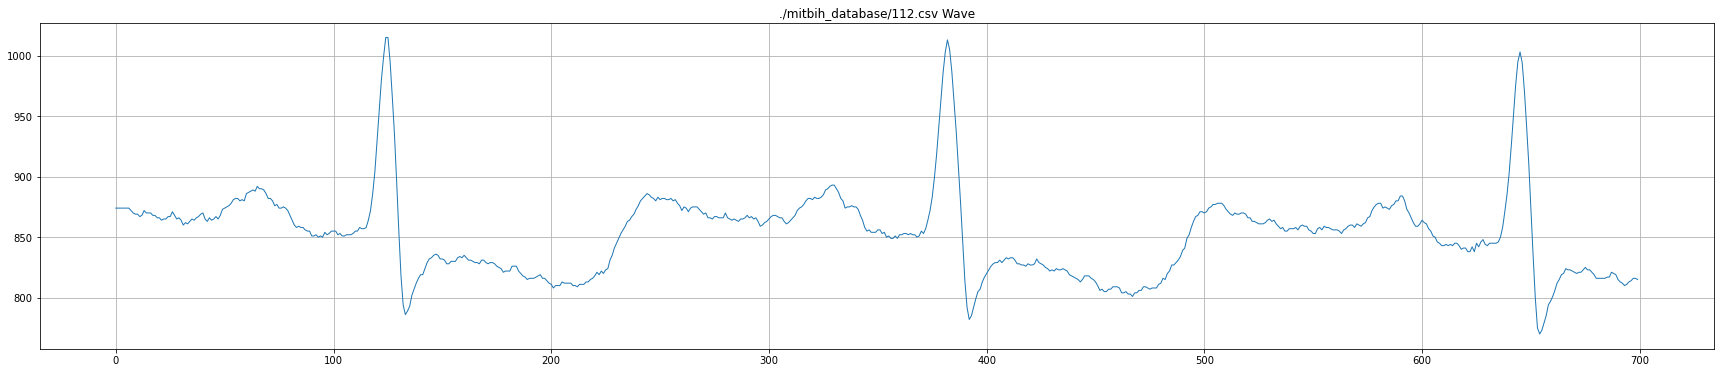

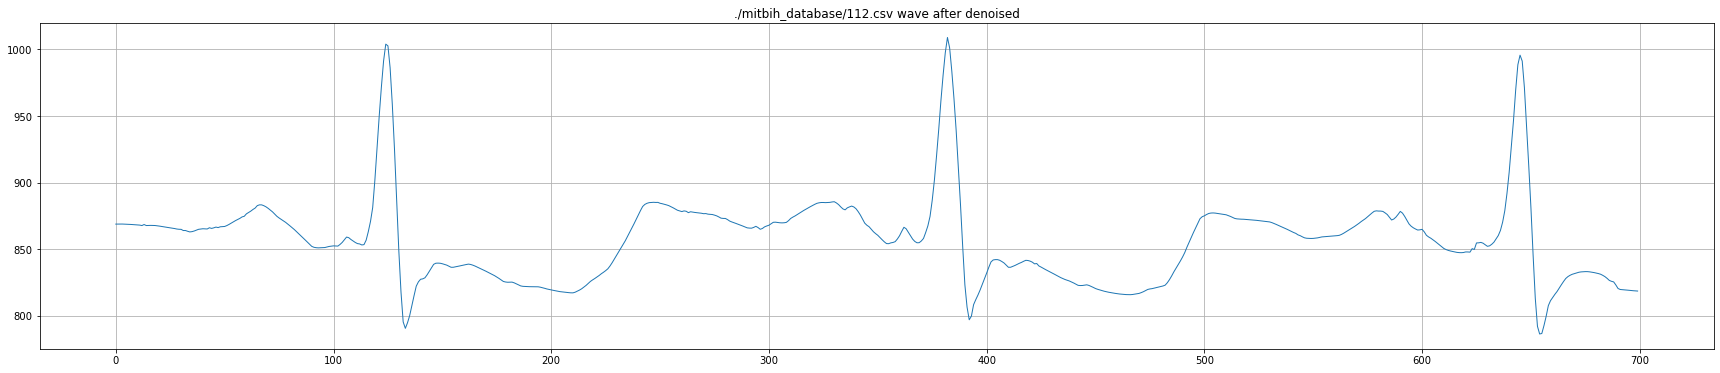

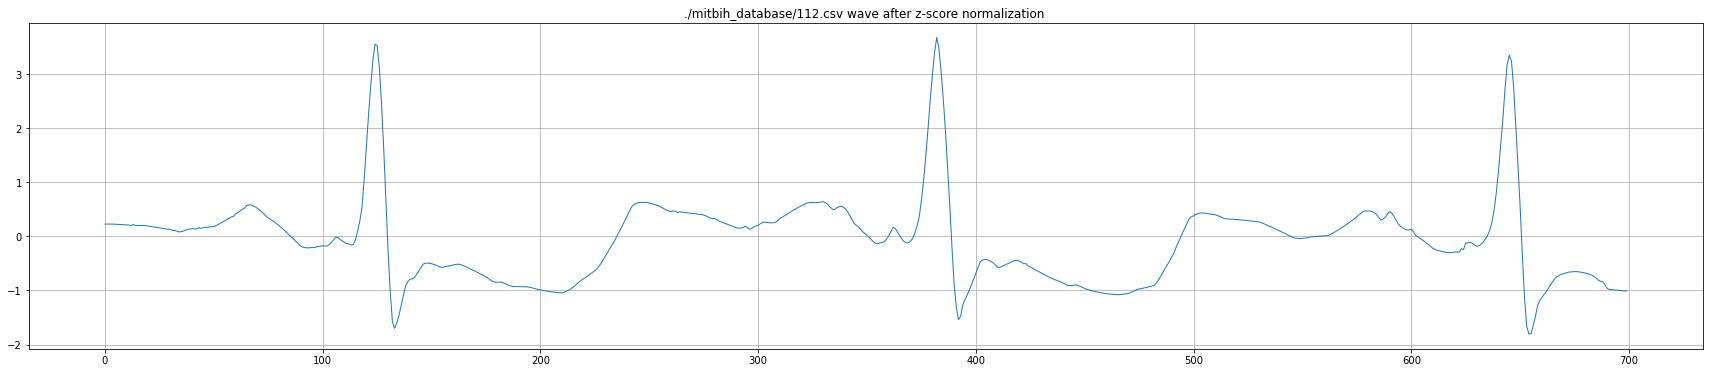

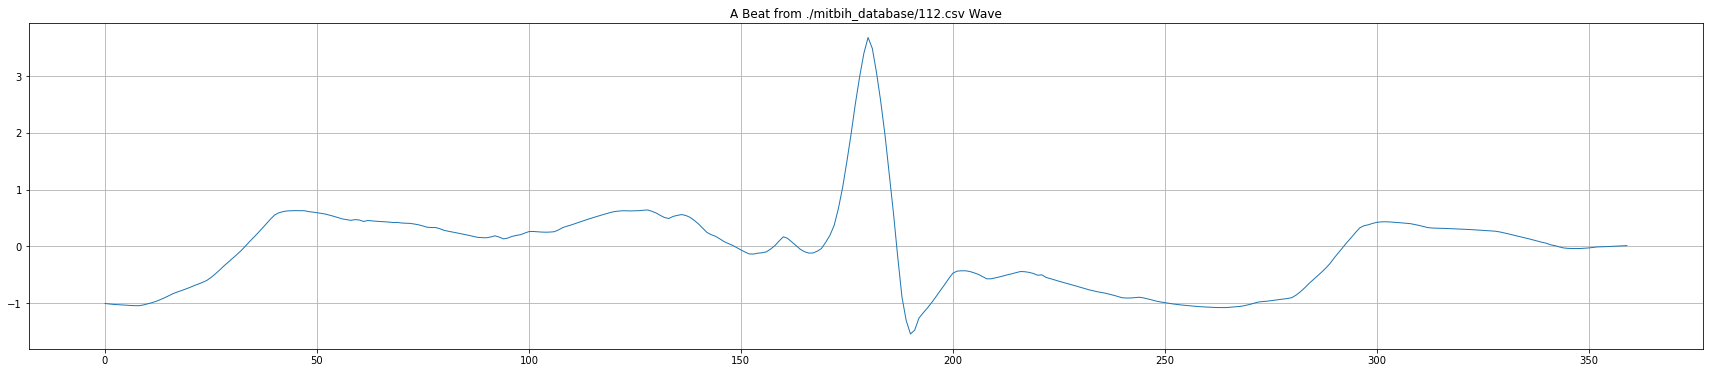

650000


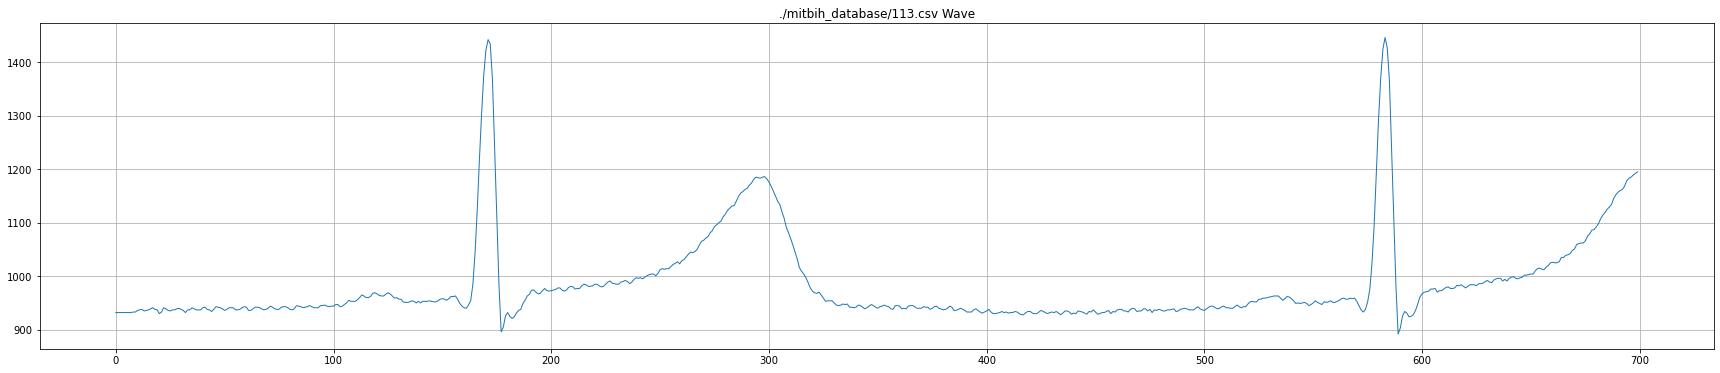

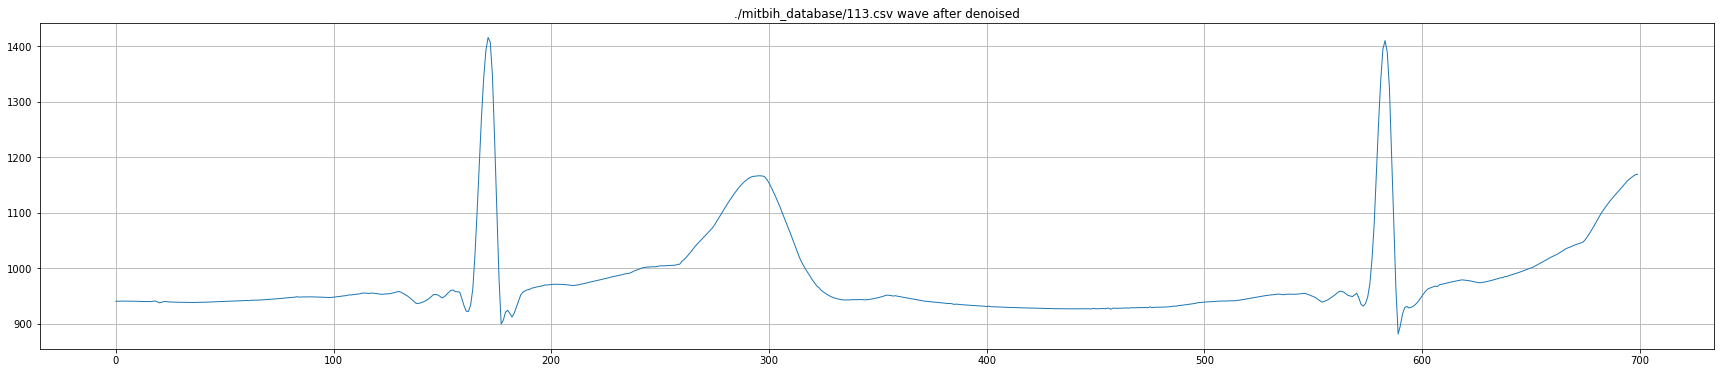

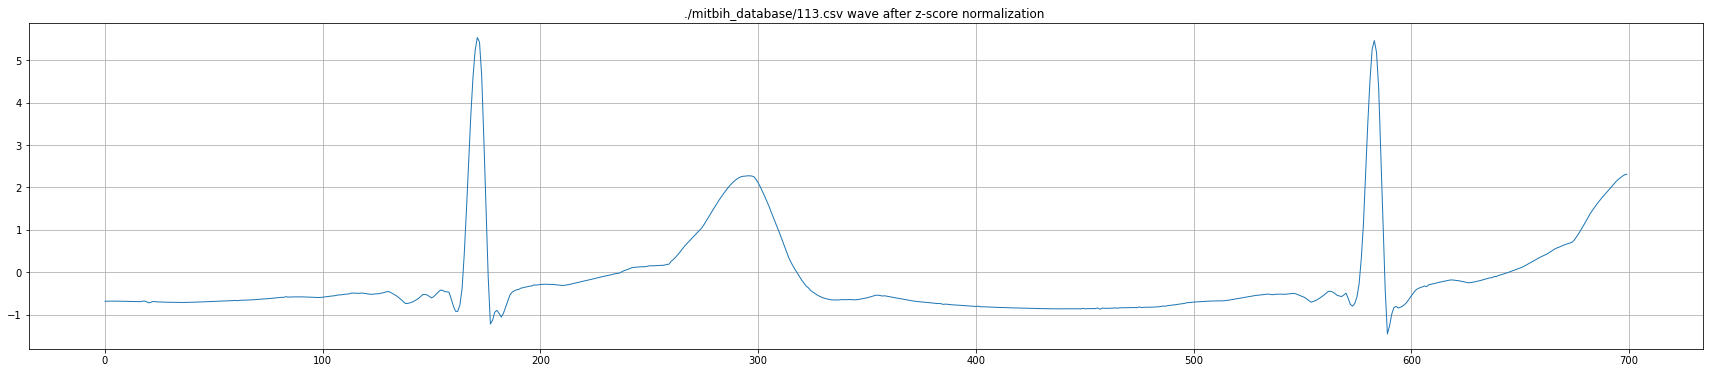

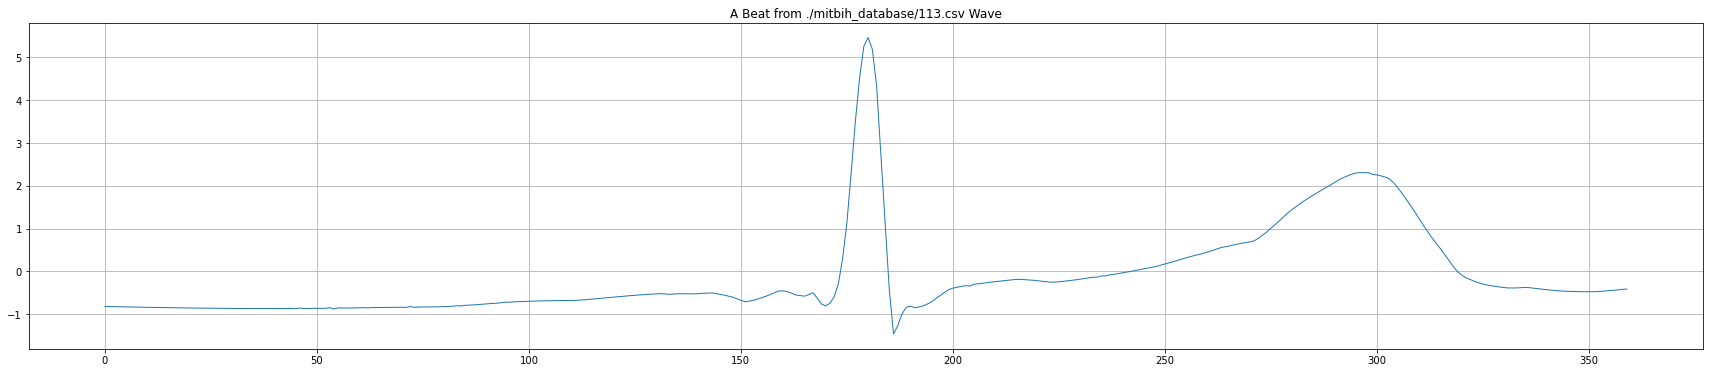

650000


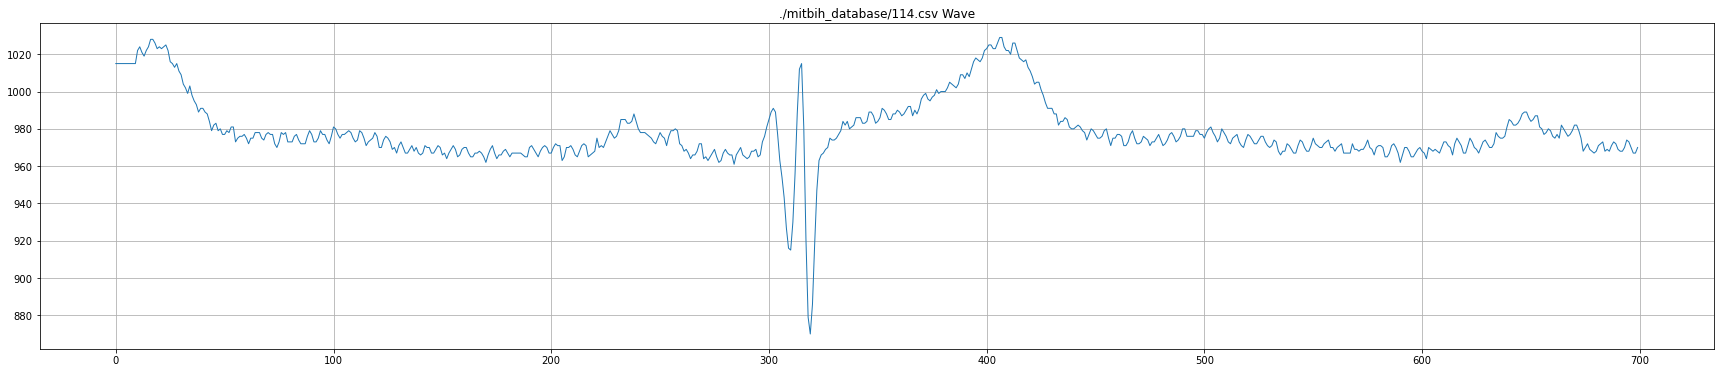

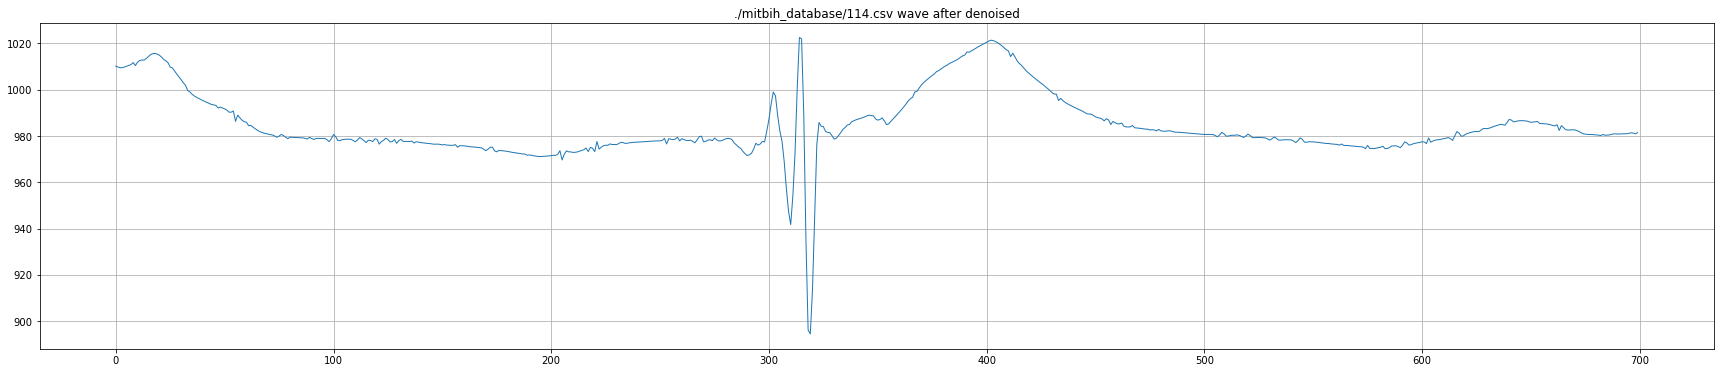

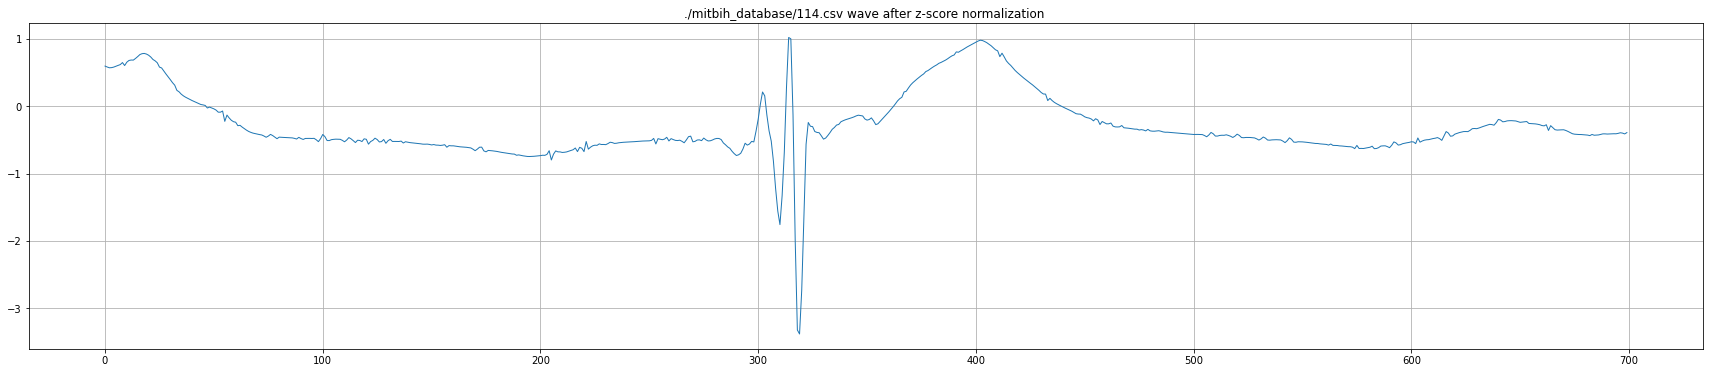

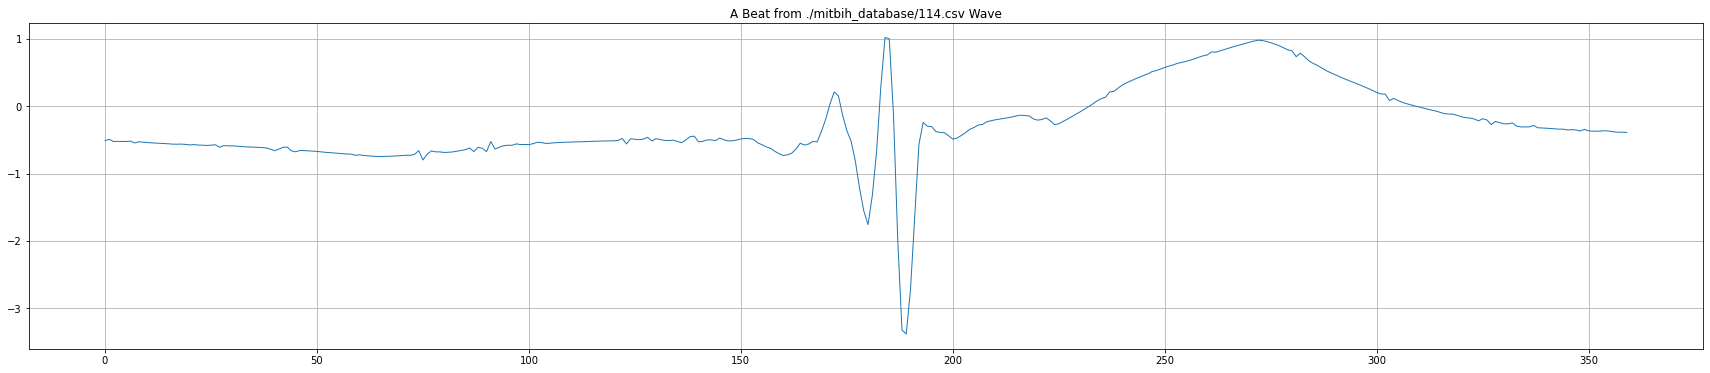

650000


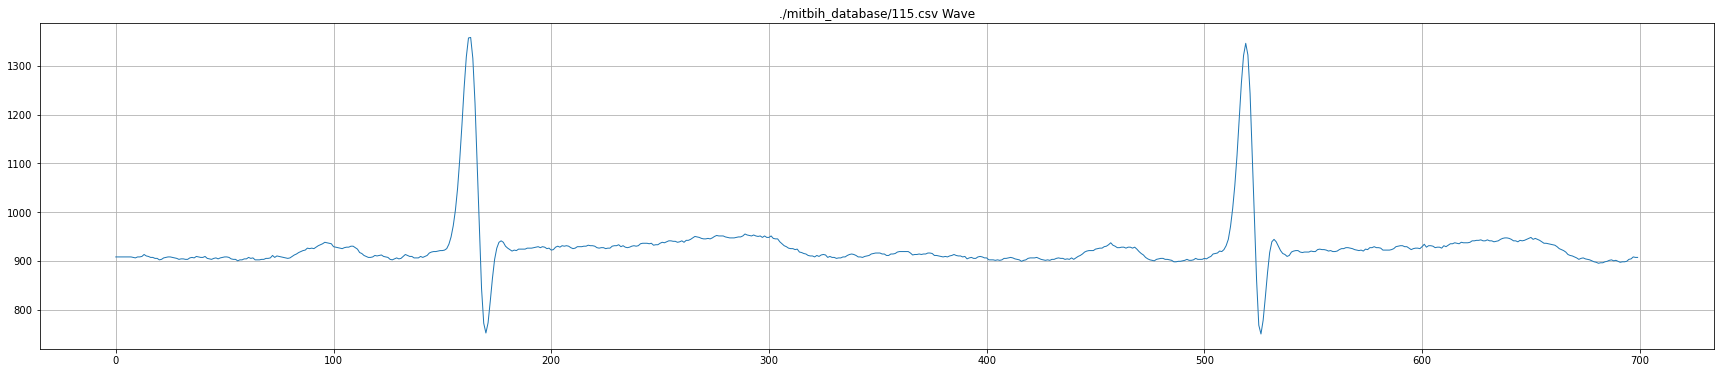

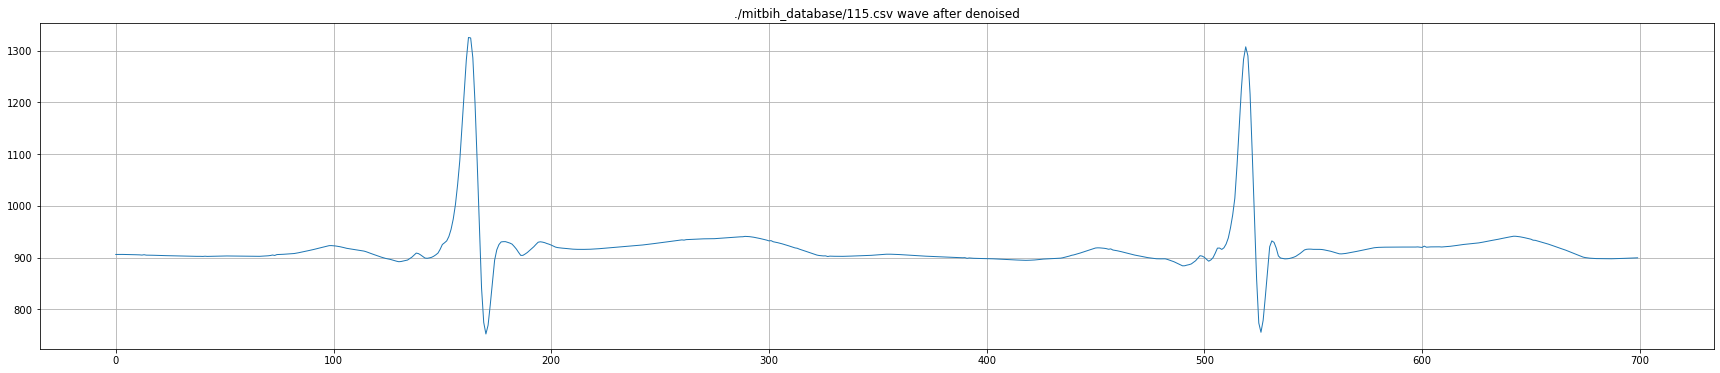

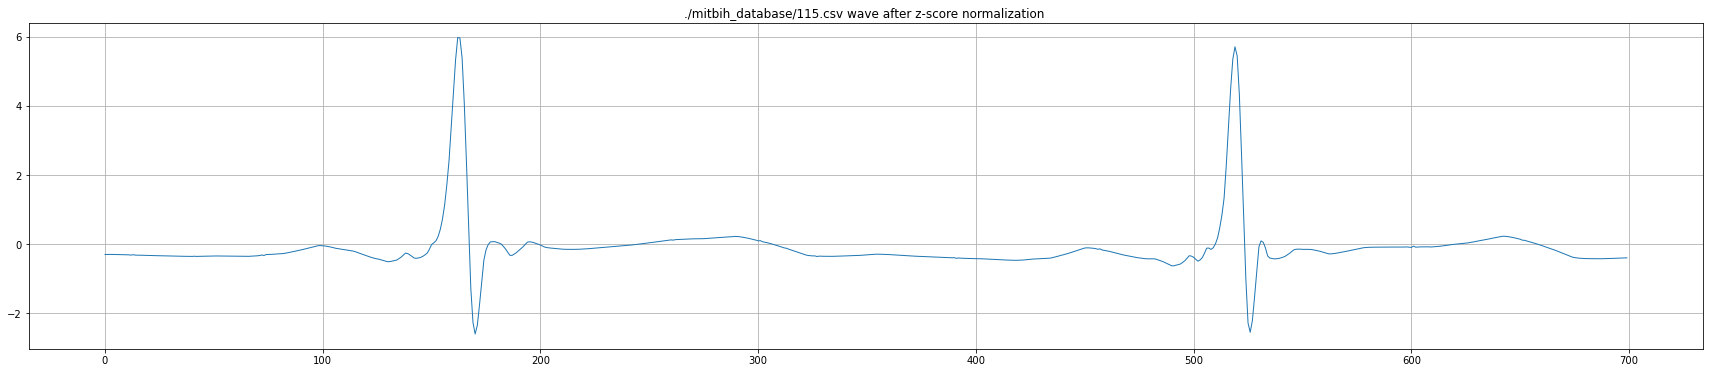

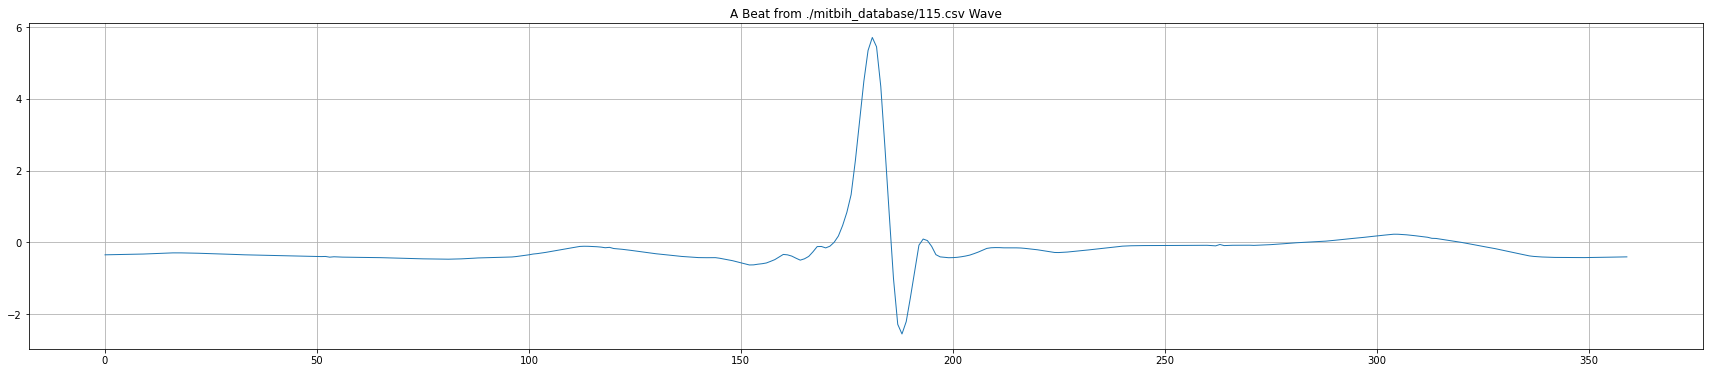

650000


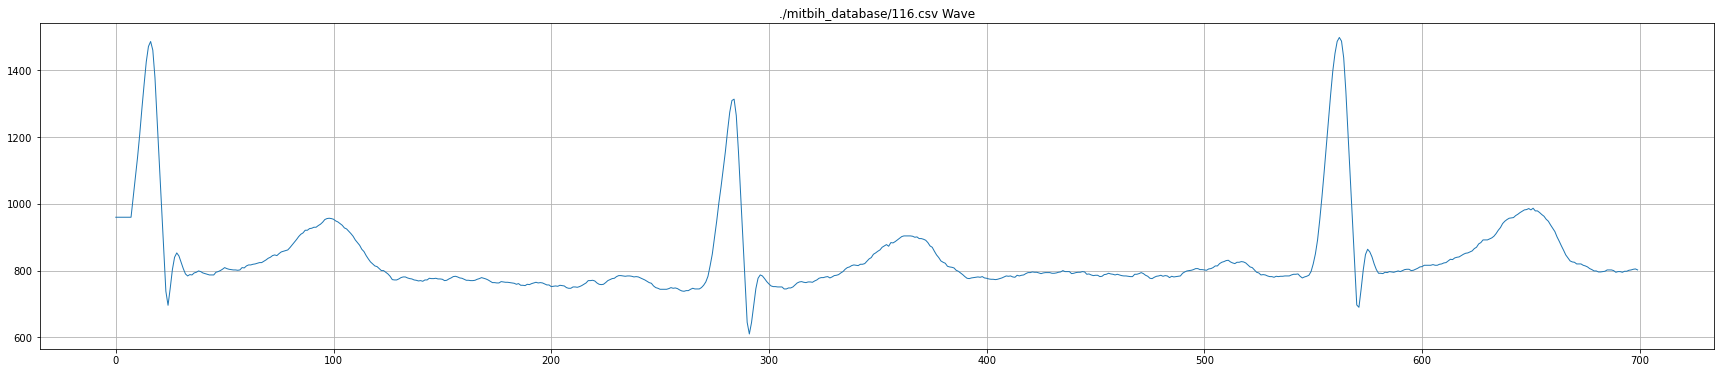

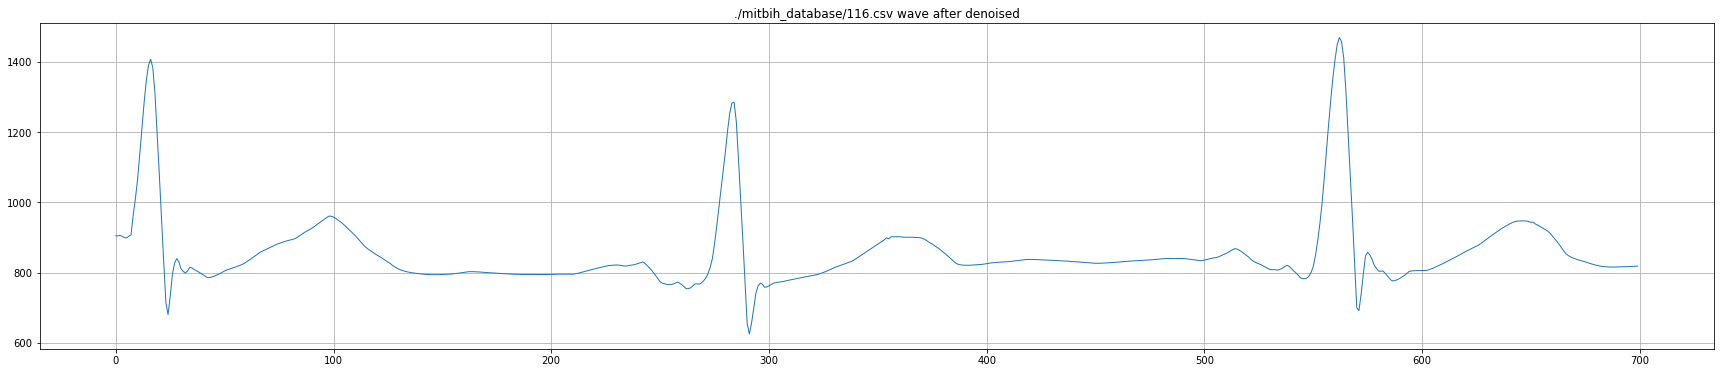

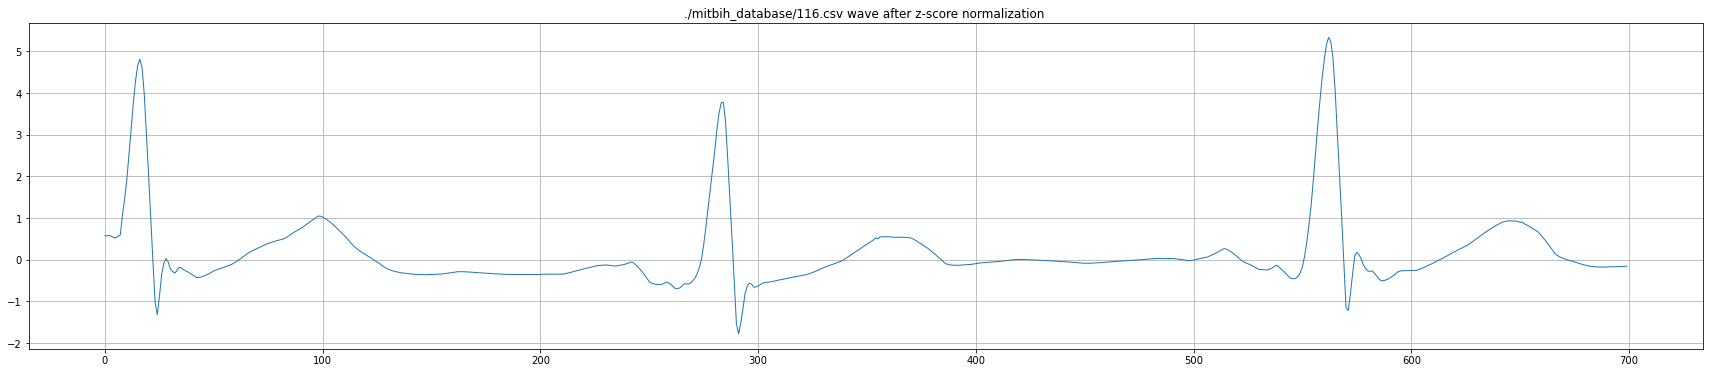

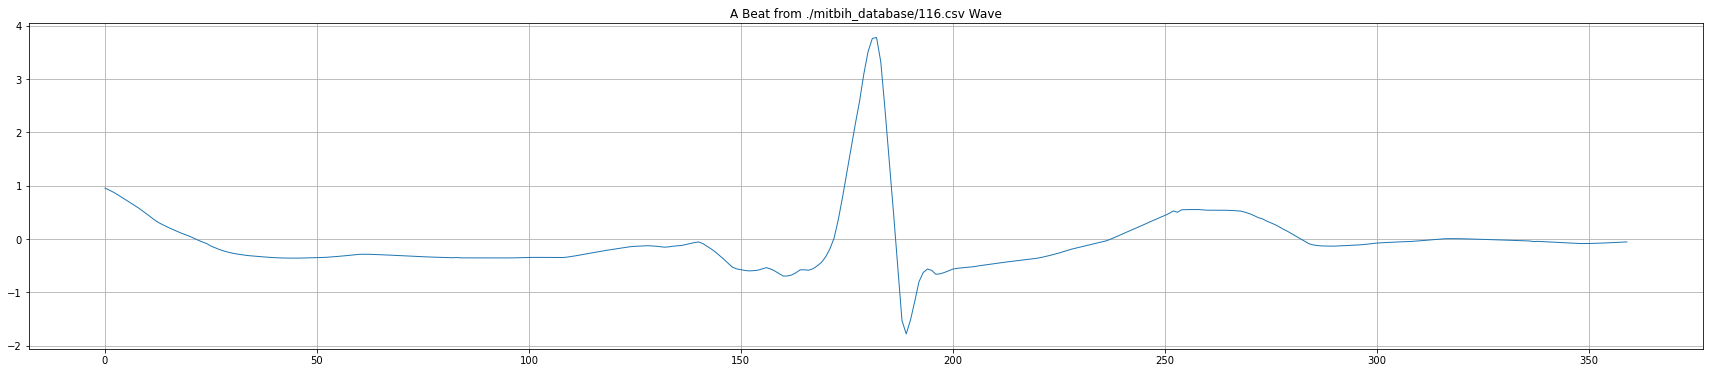

650000


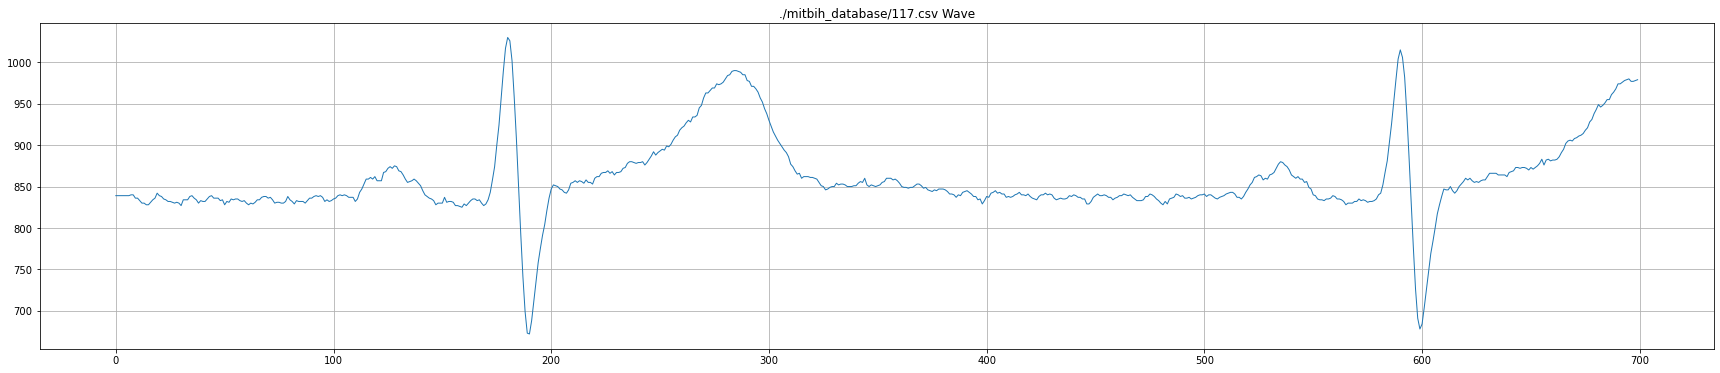

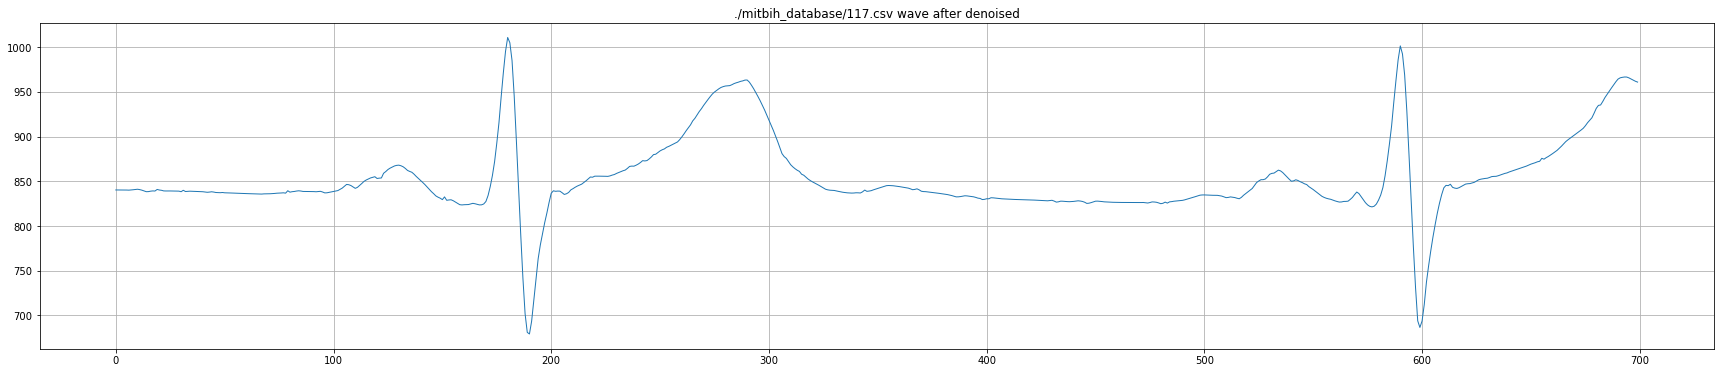

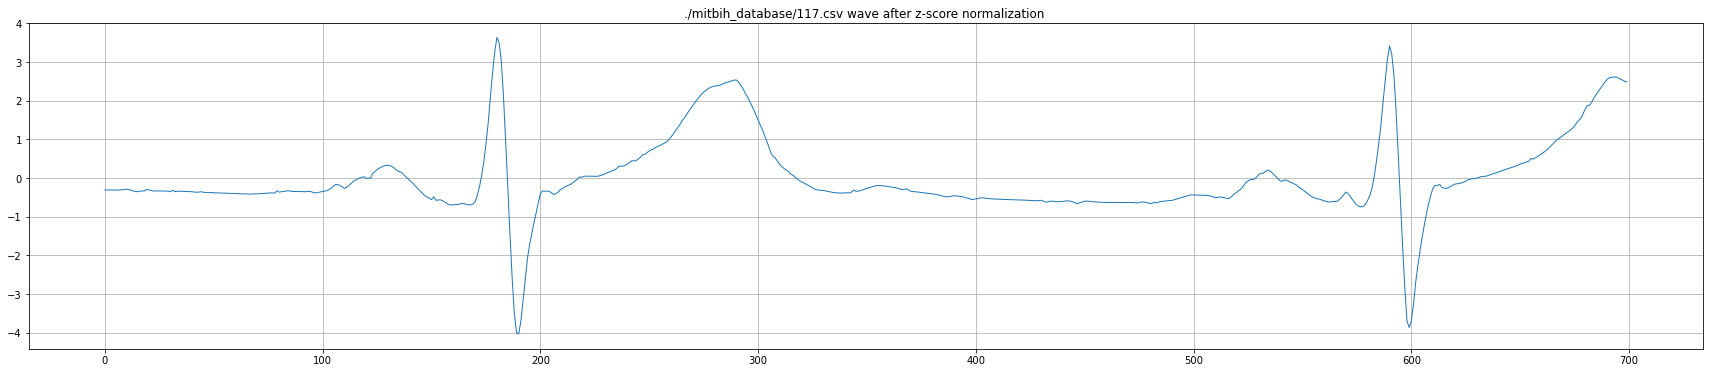

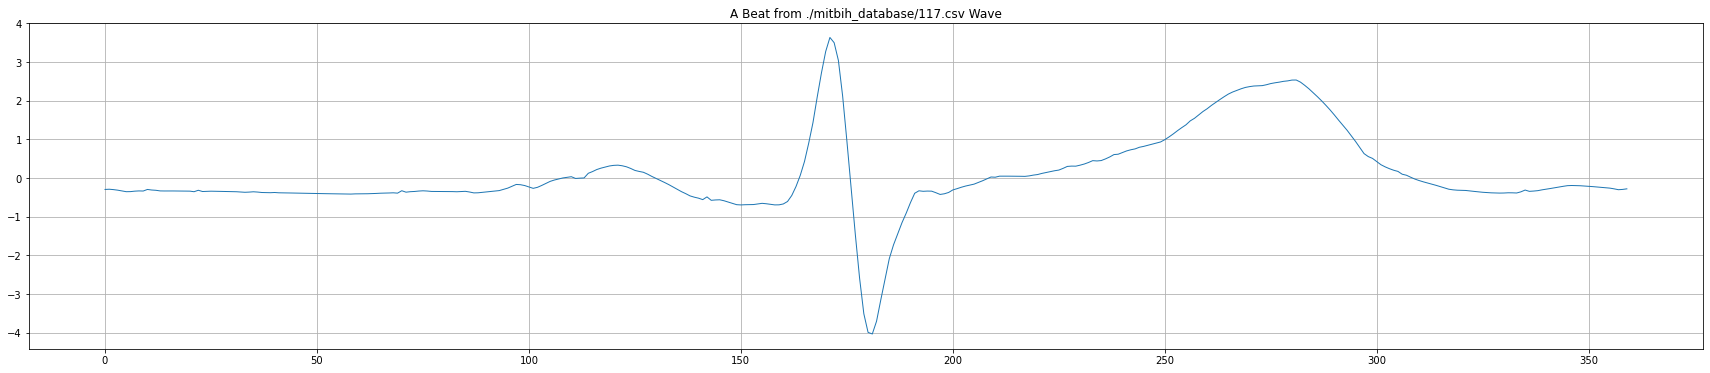

650000


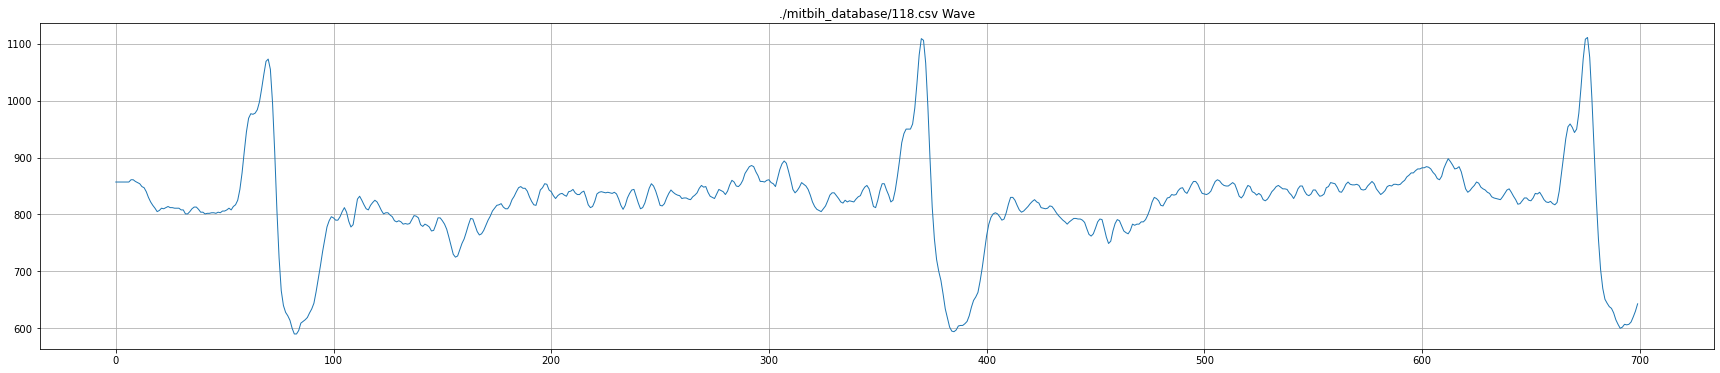

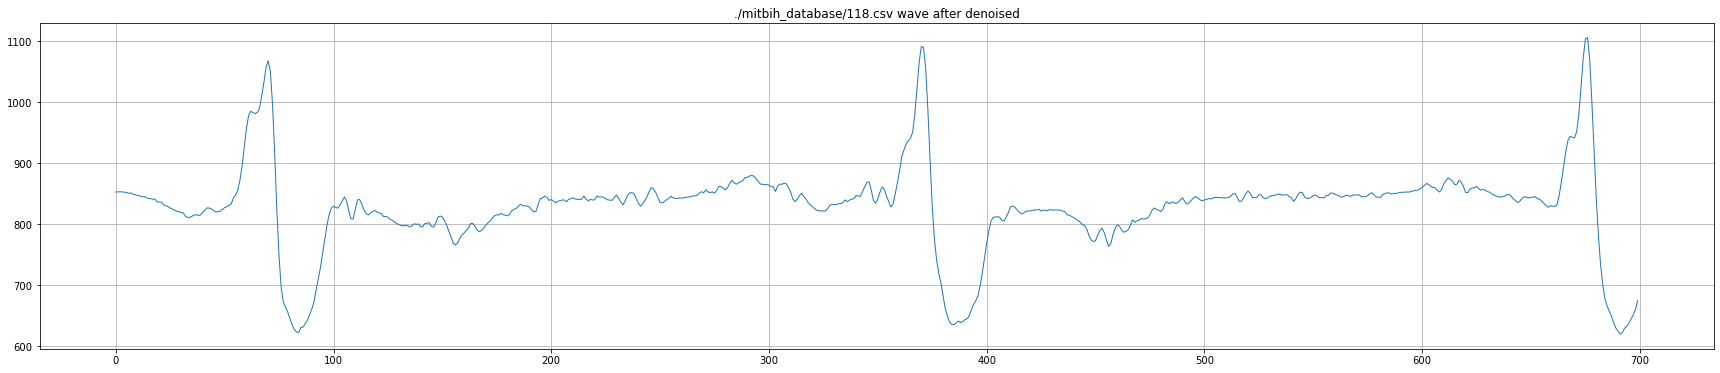

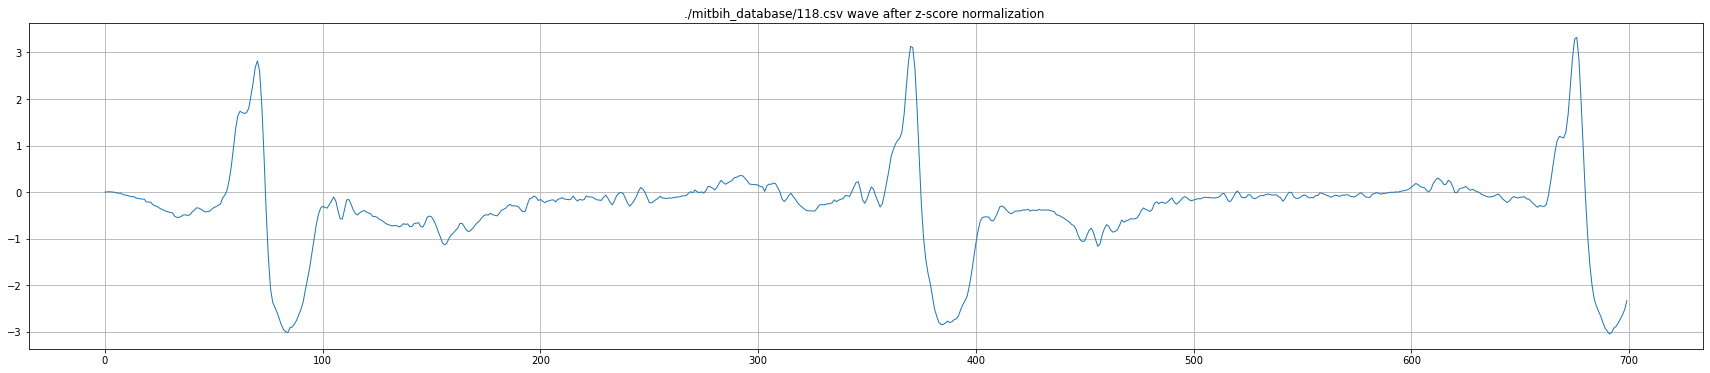

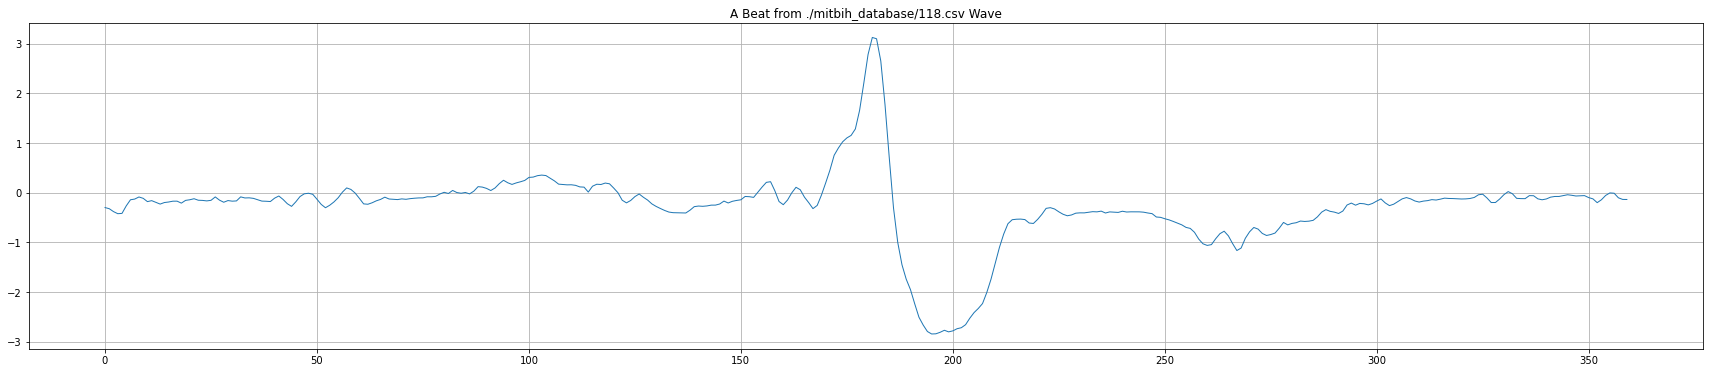

650000


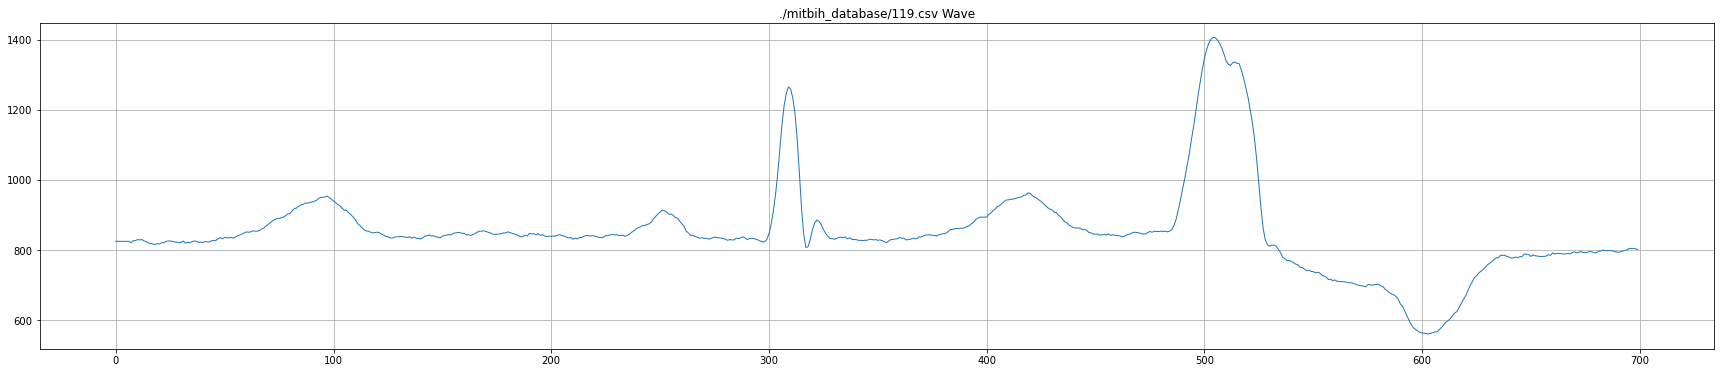

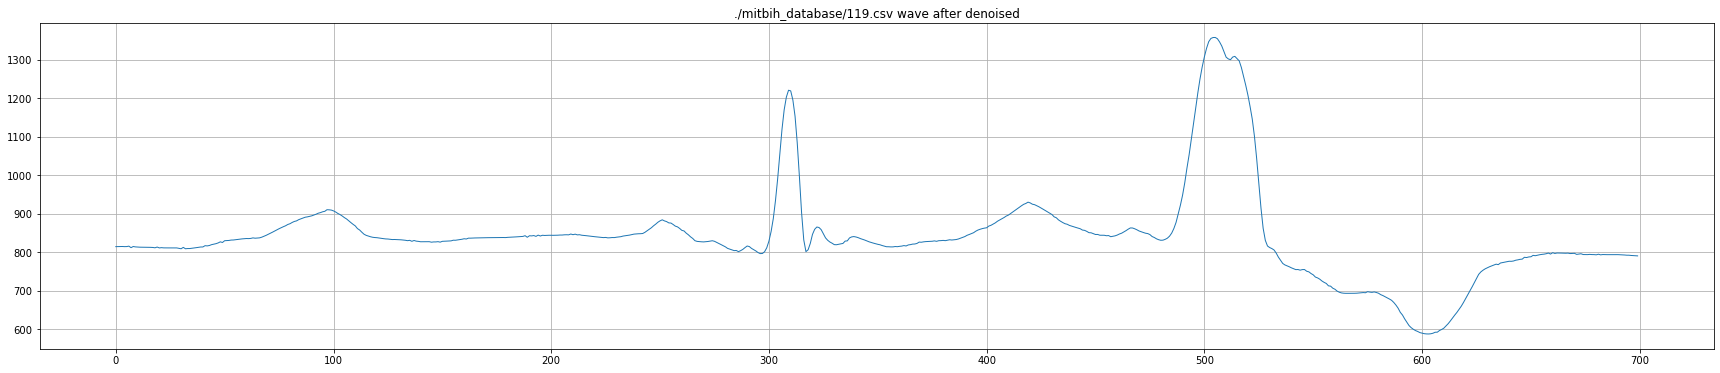

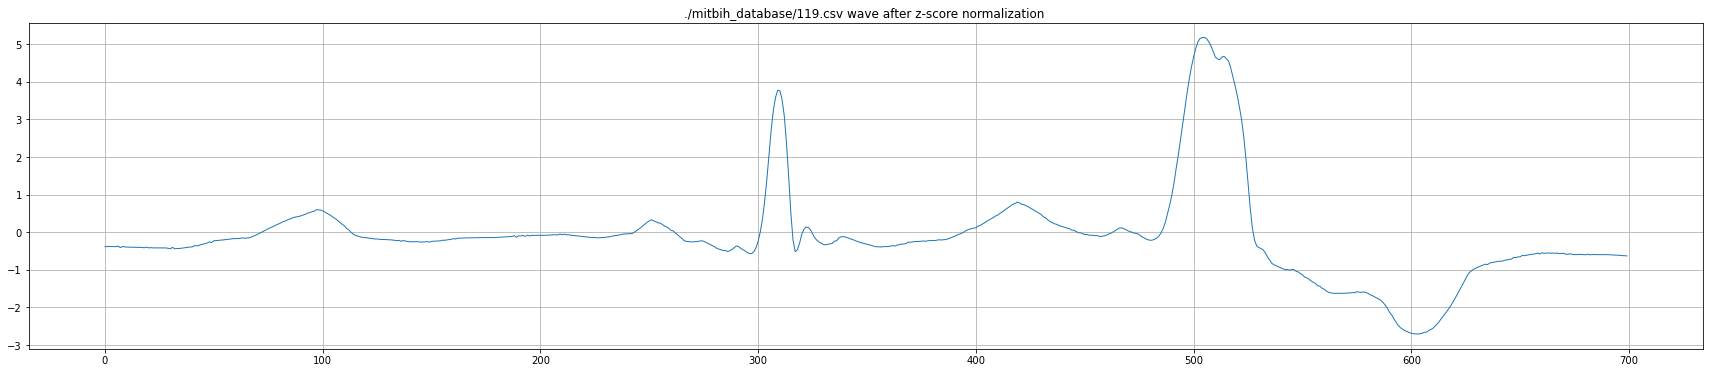

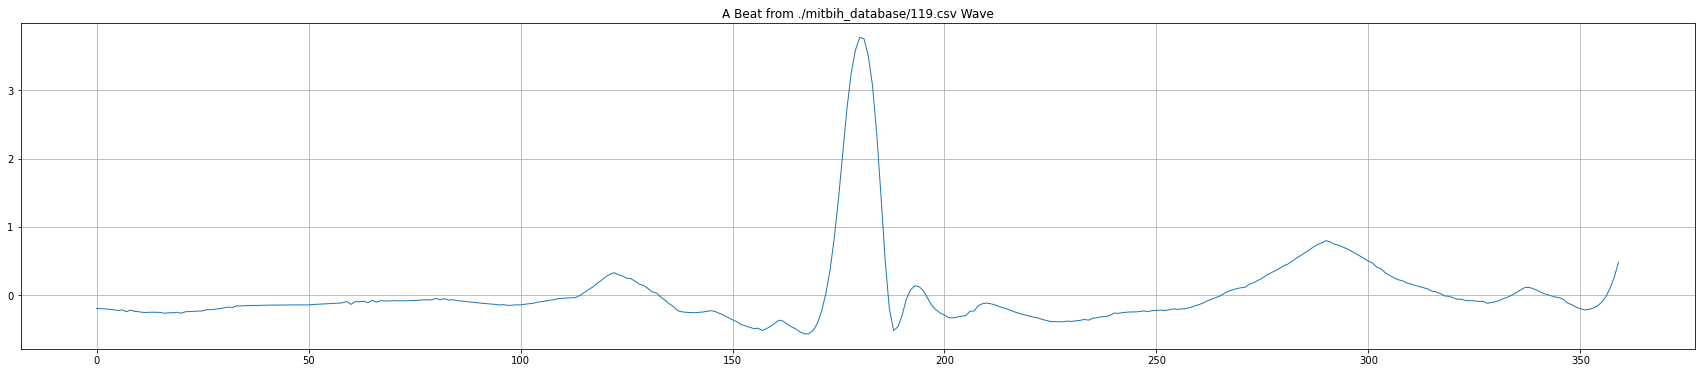

650000


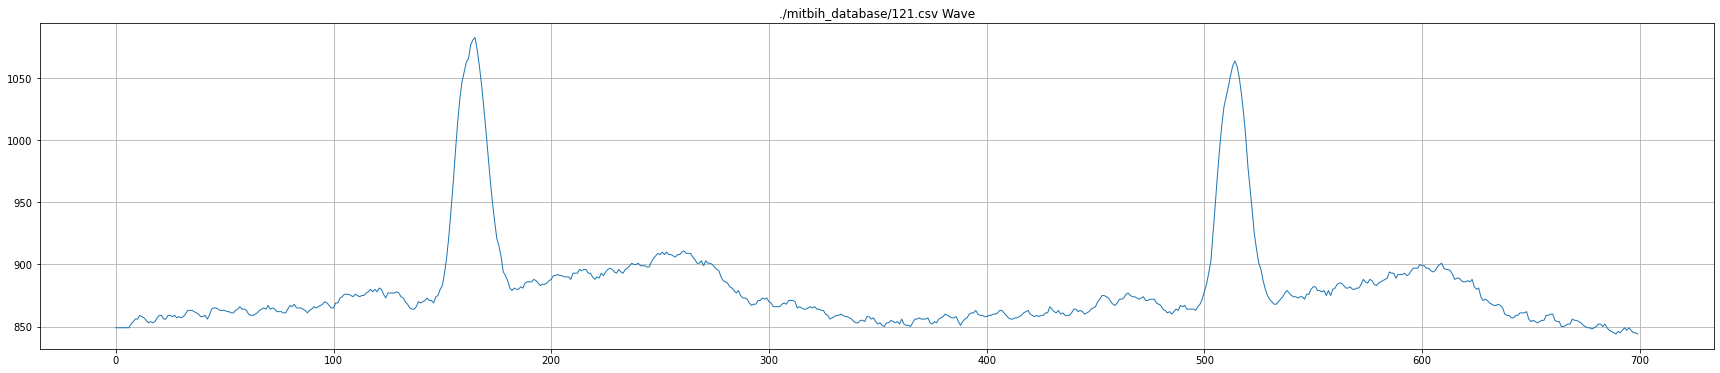

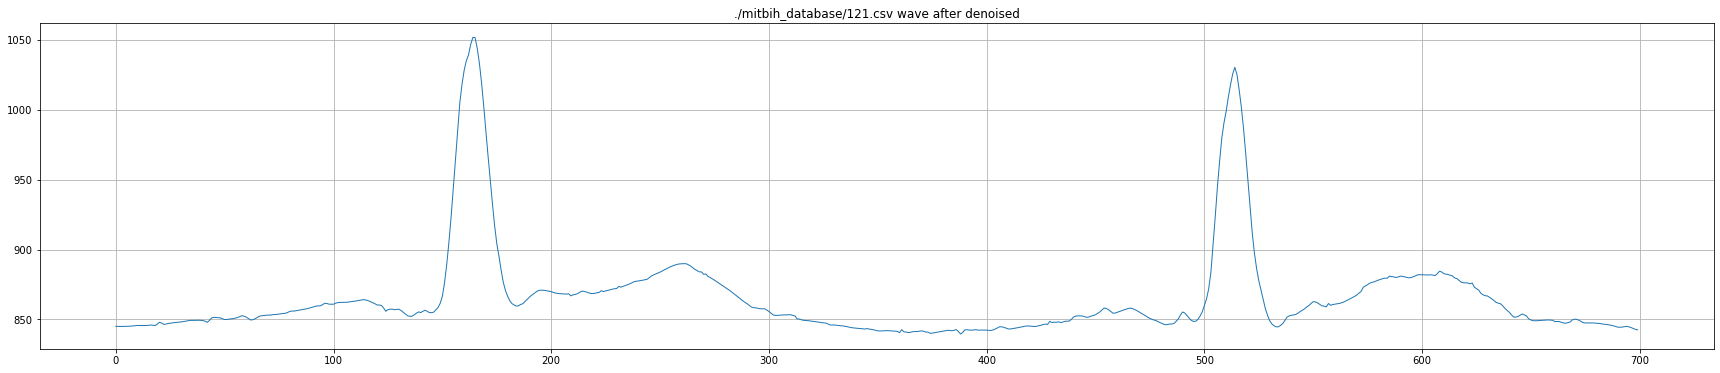

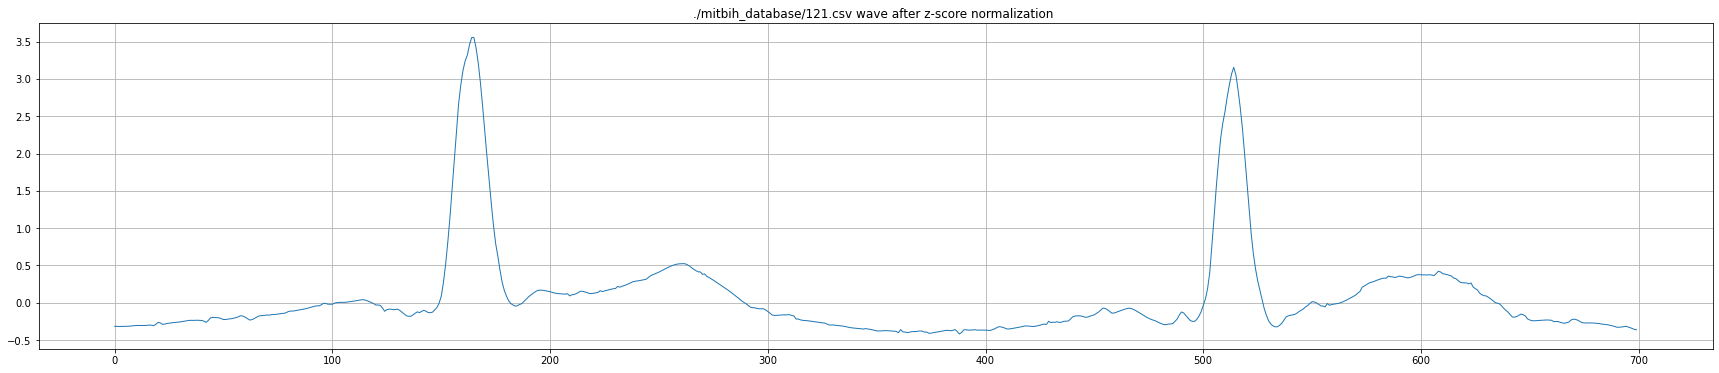

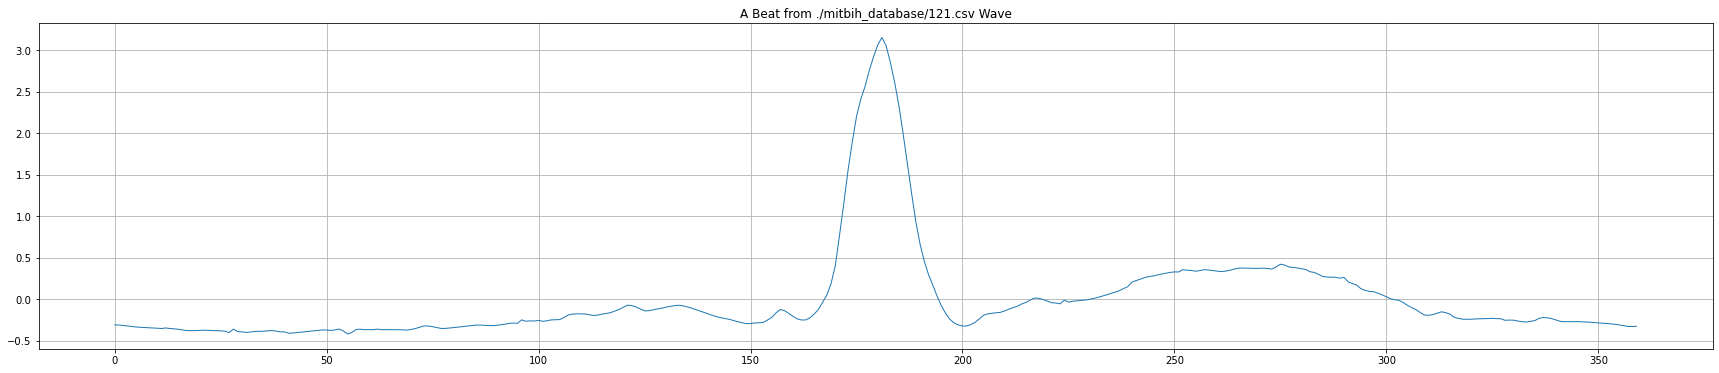

650000


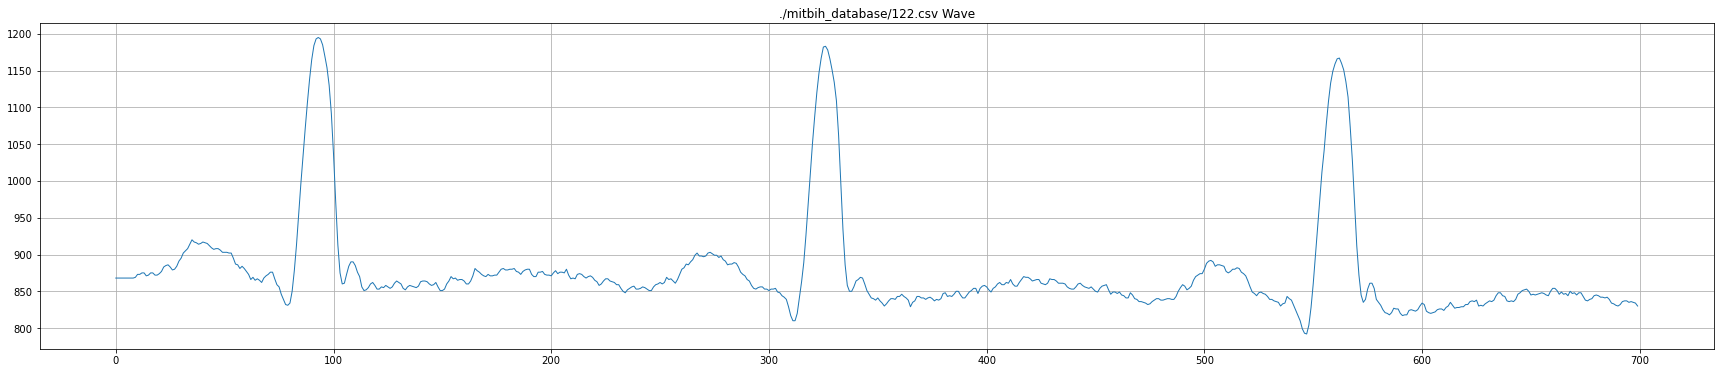

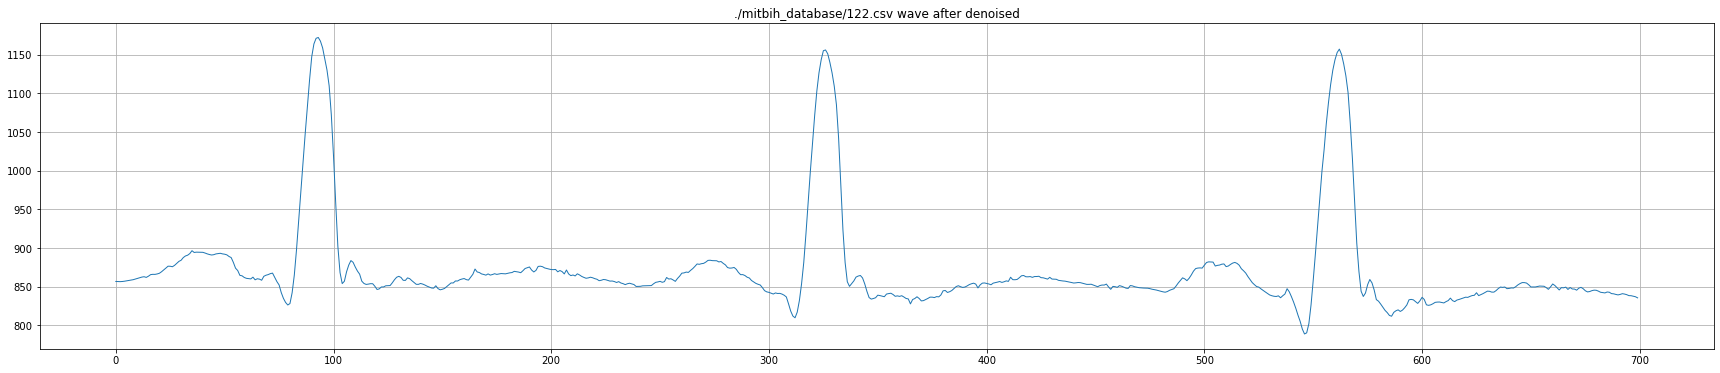

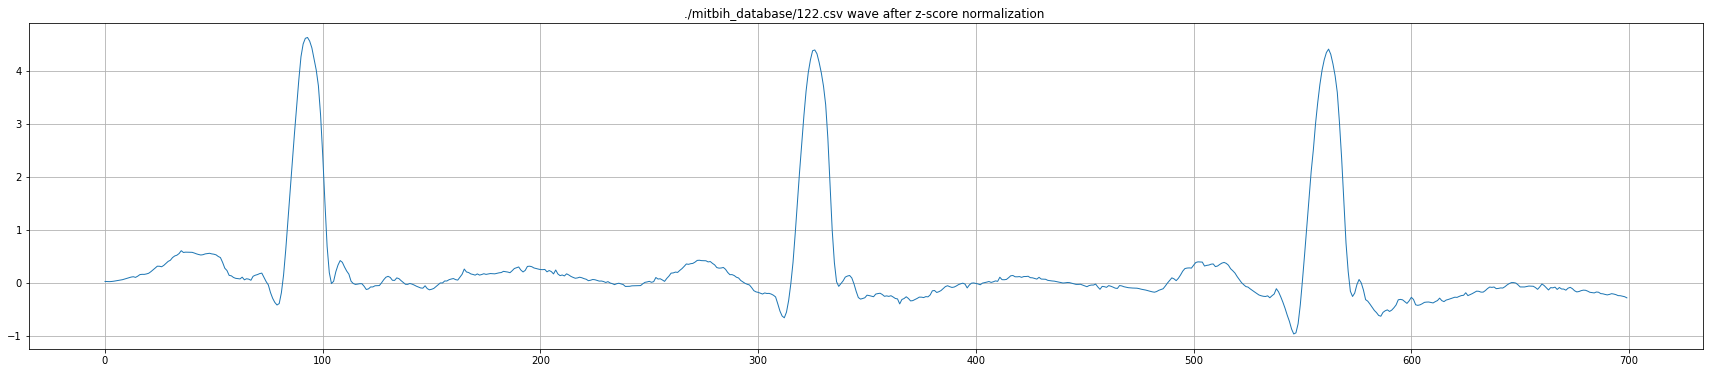

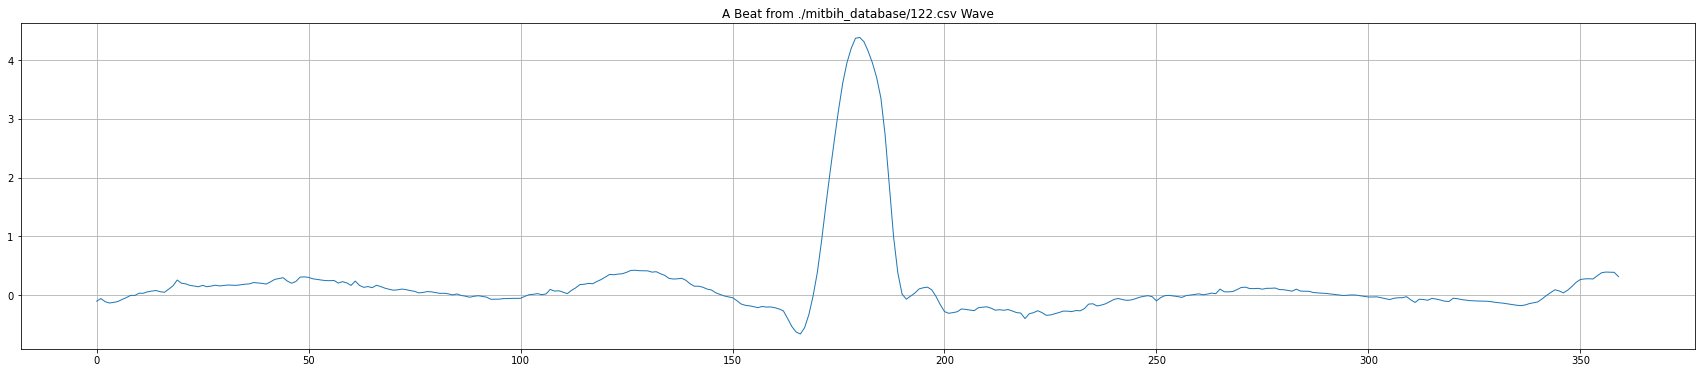

650000


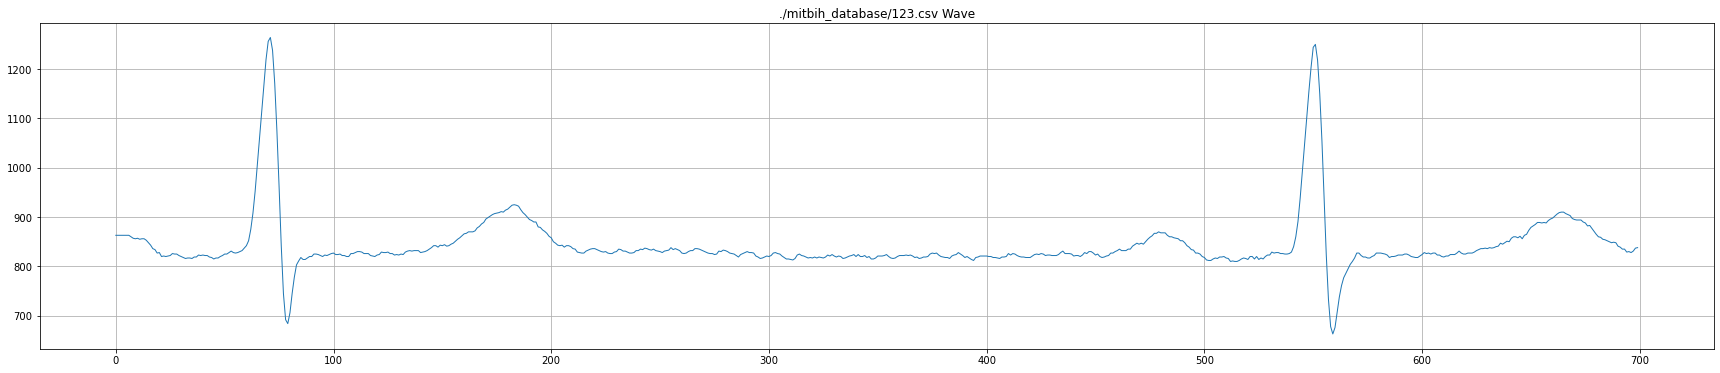

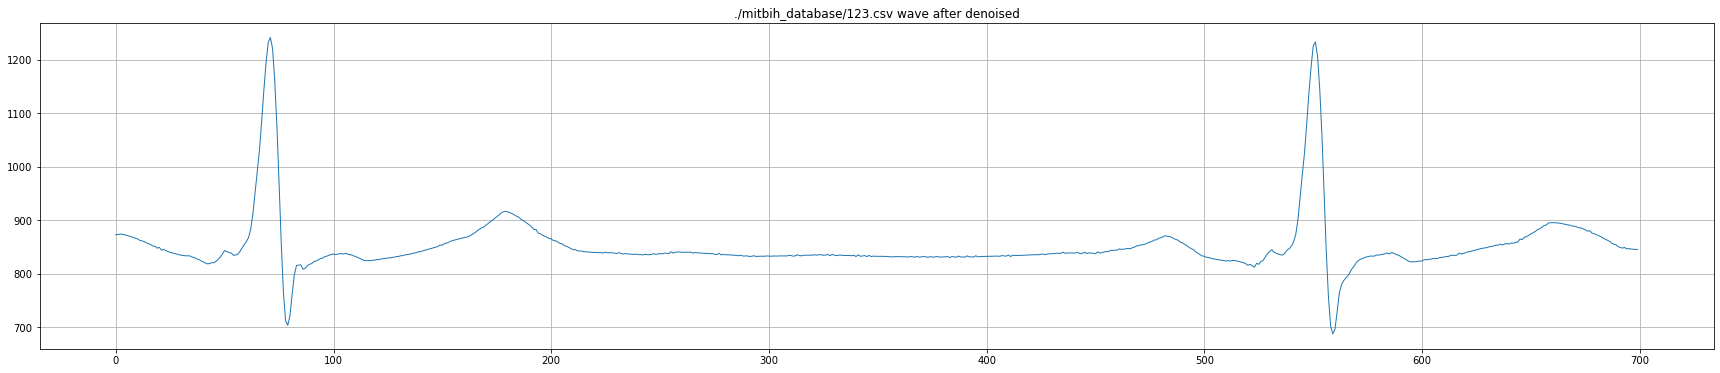

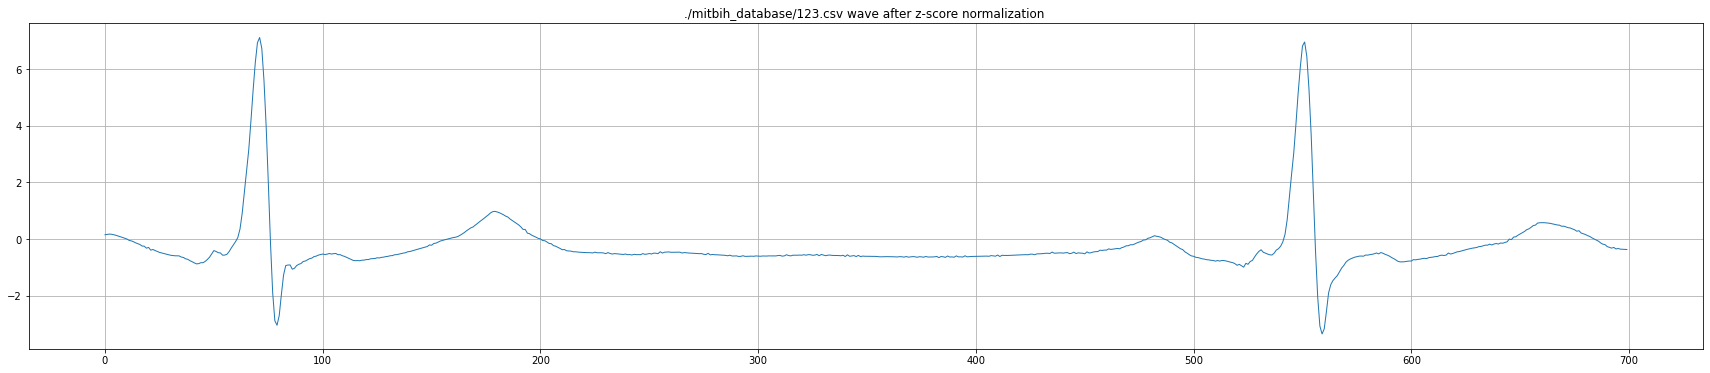

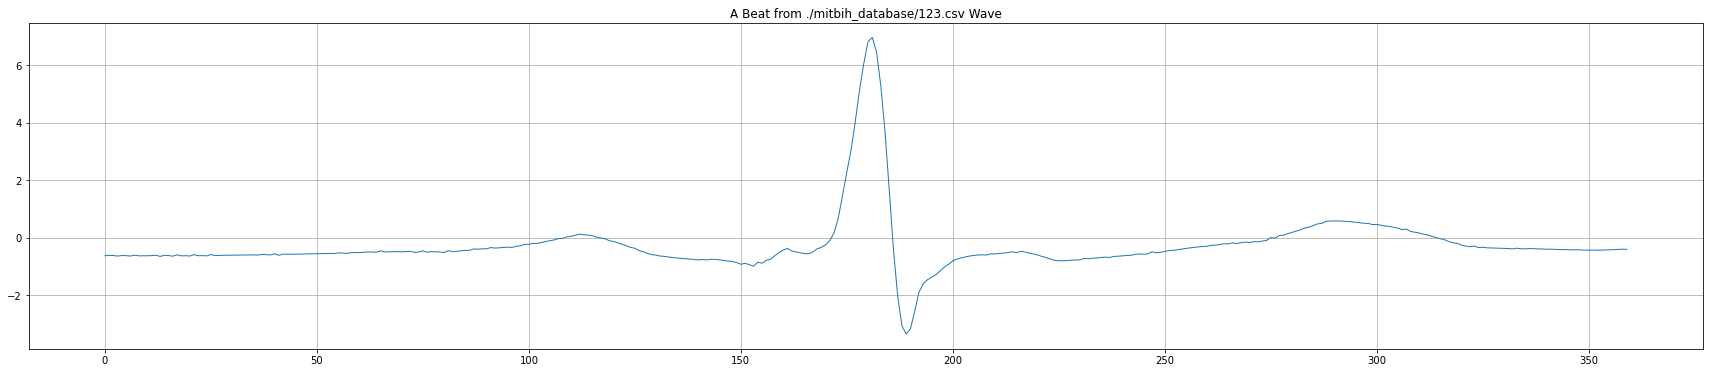

650000


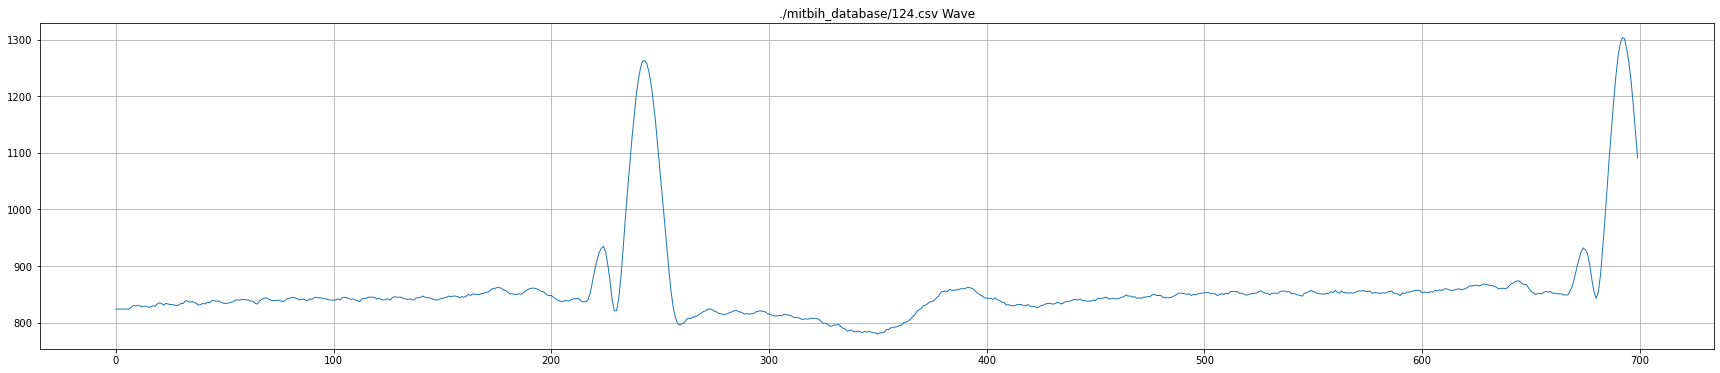

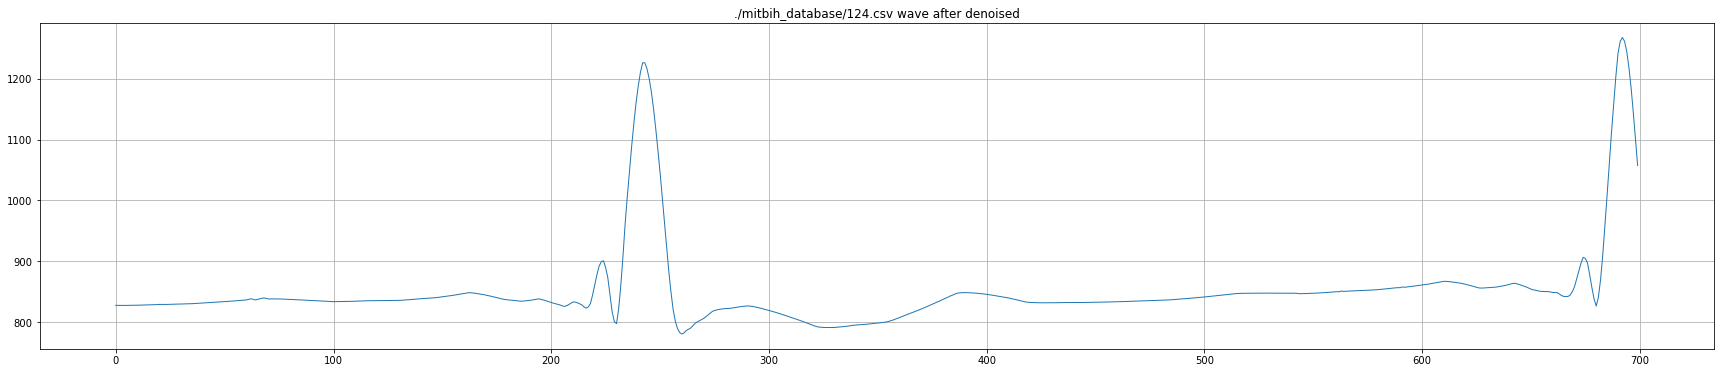

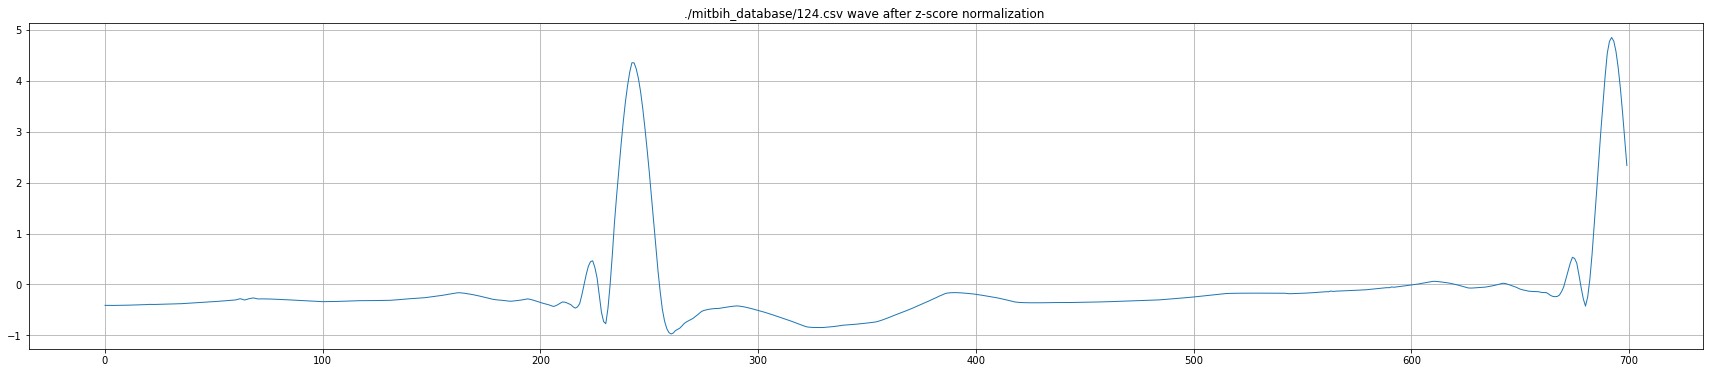

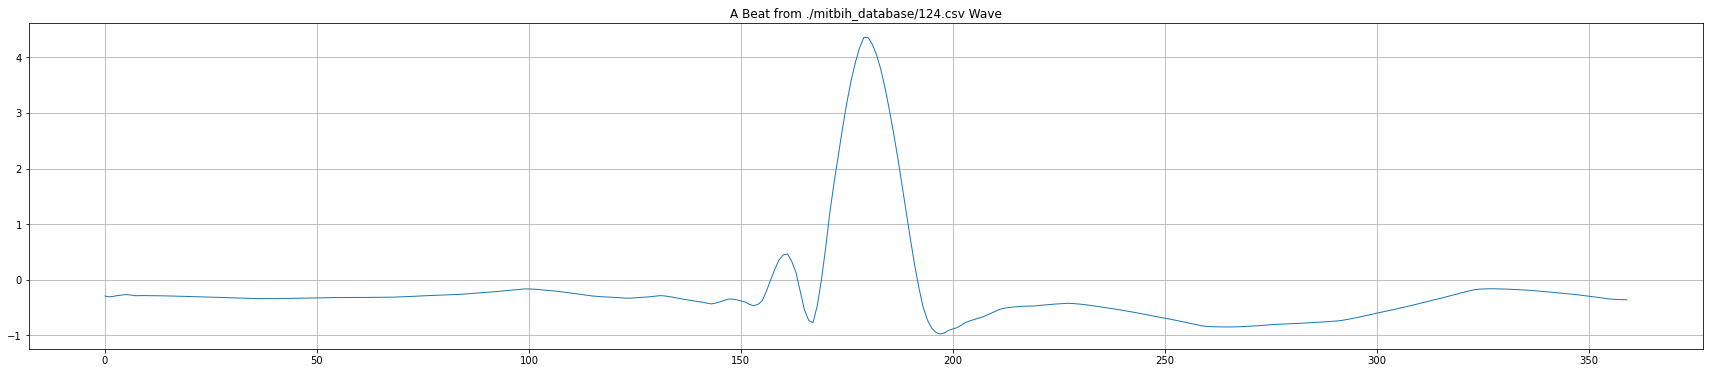

650000


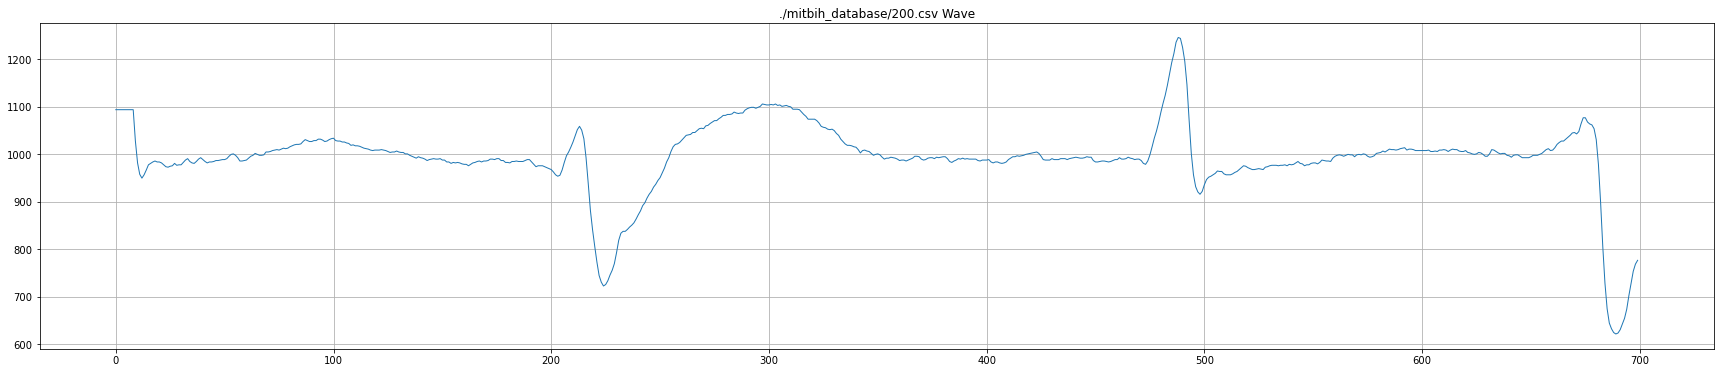

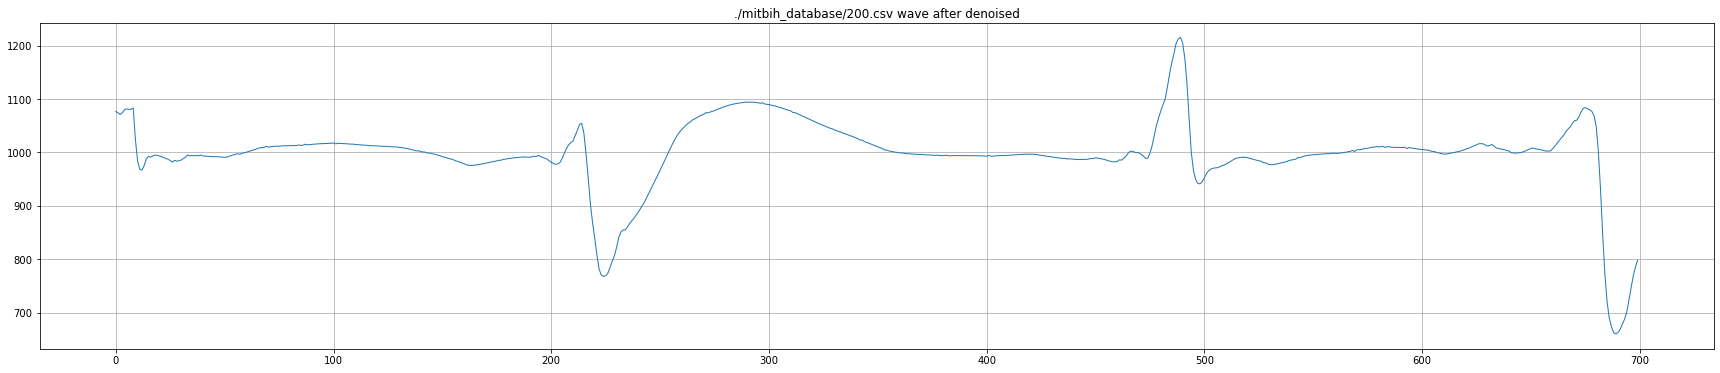

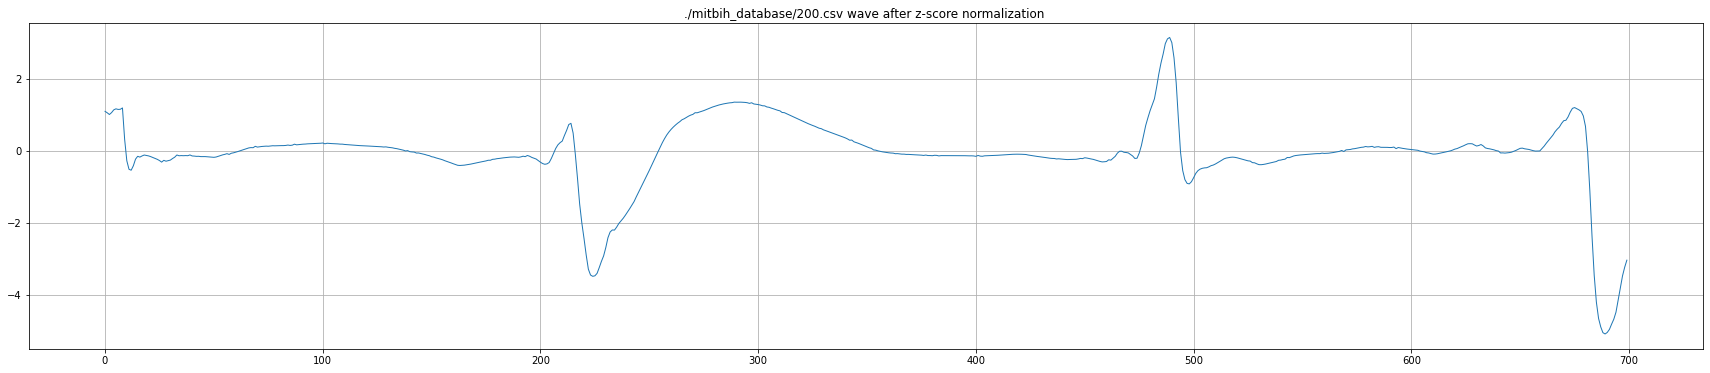

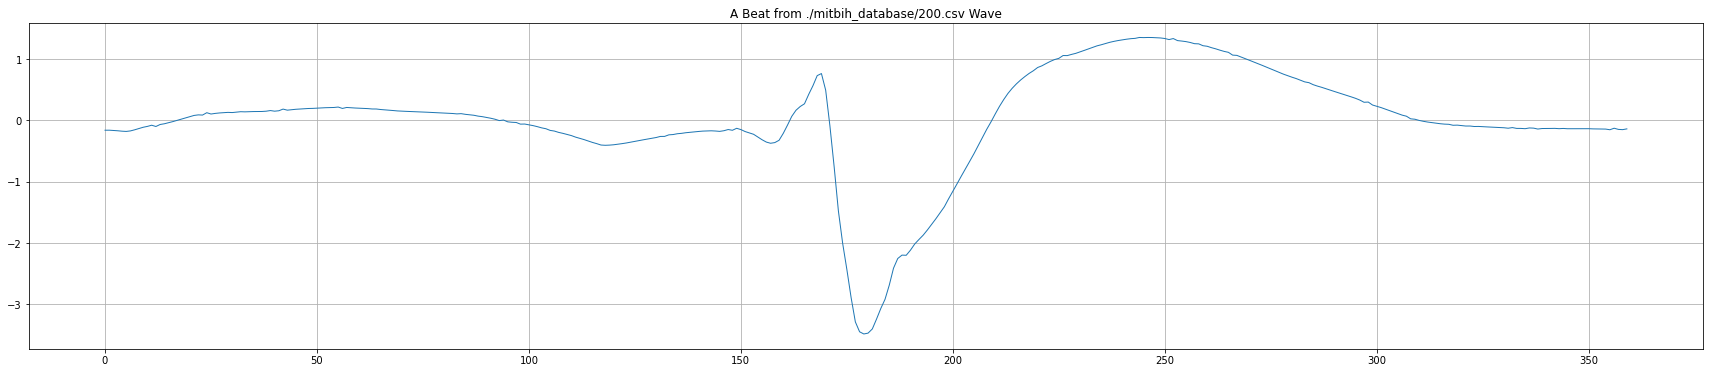

650000


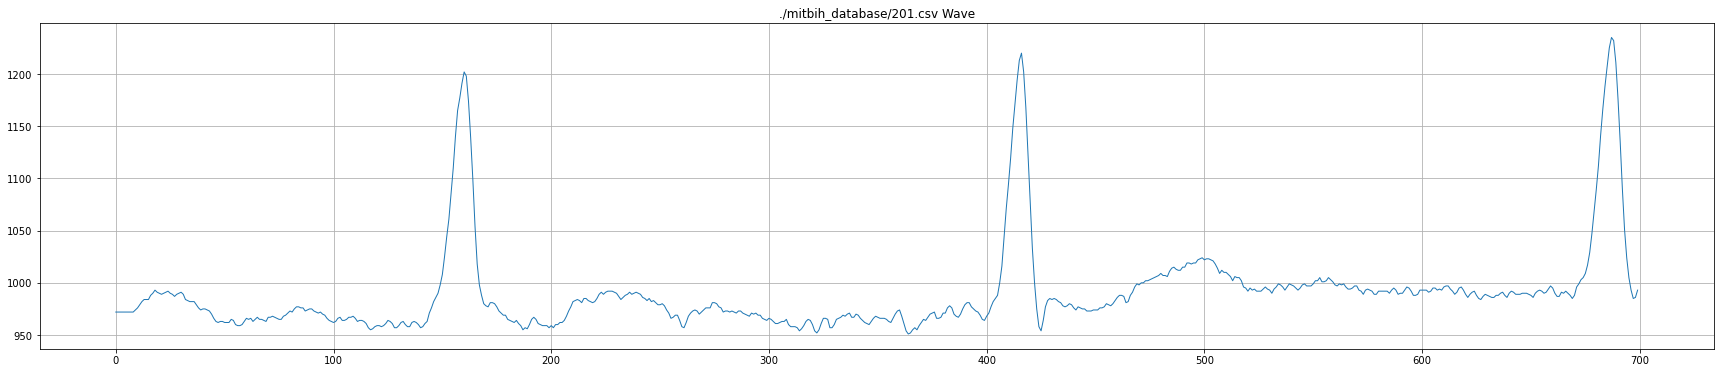

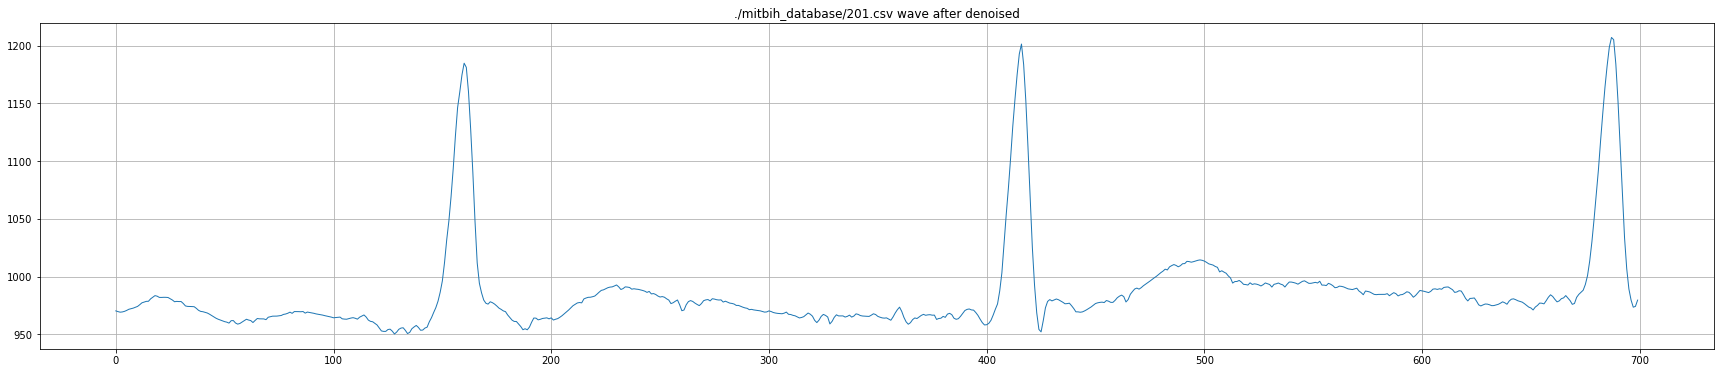

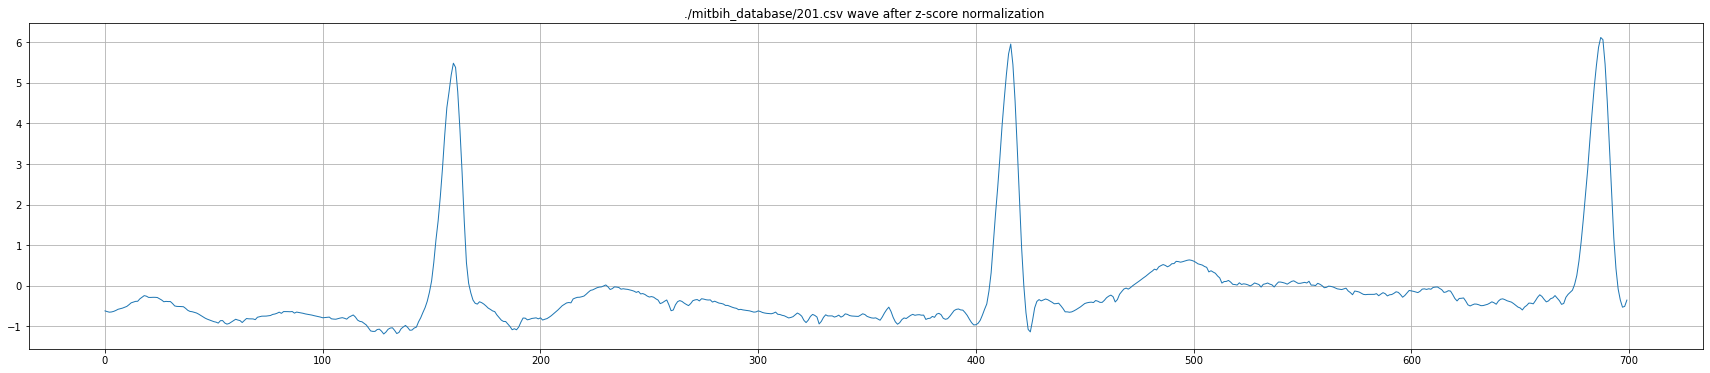

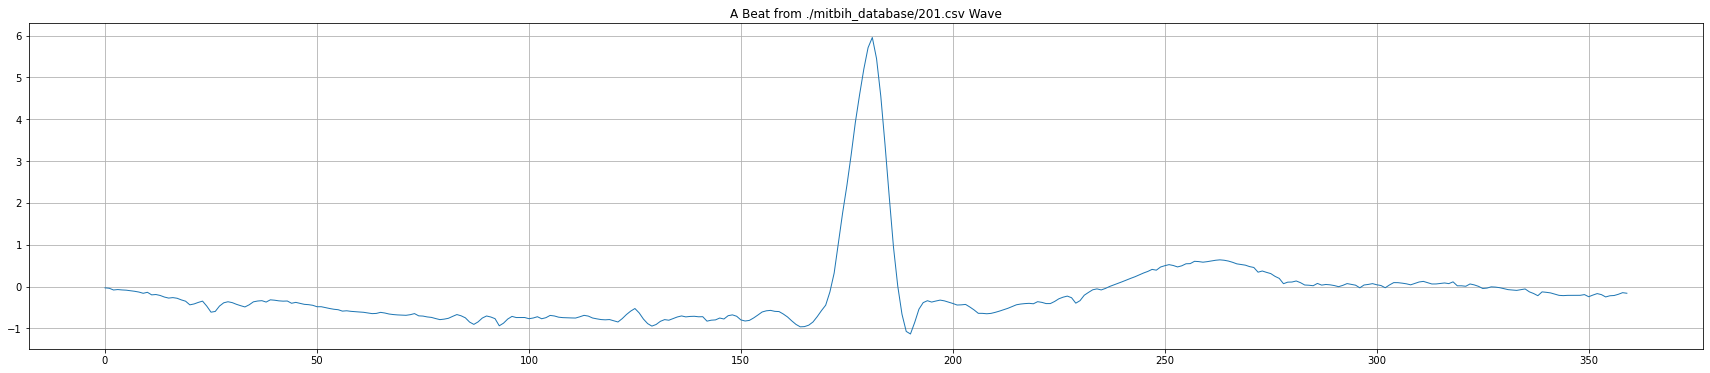

650000


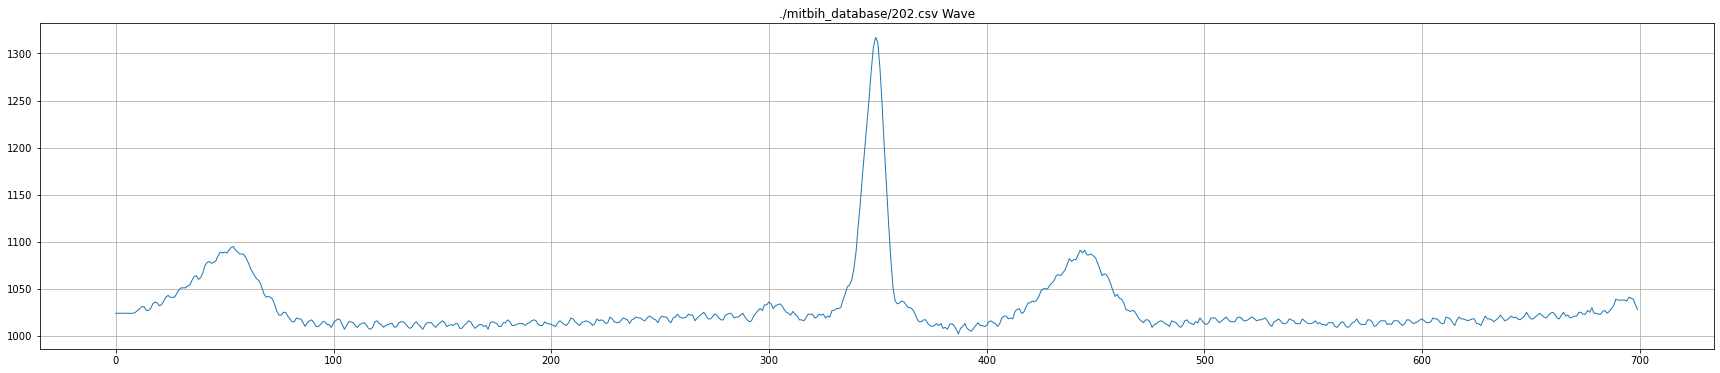

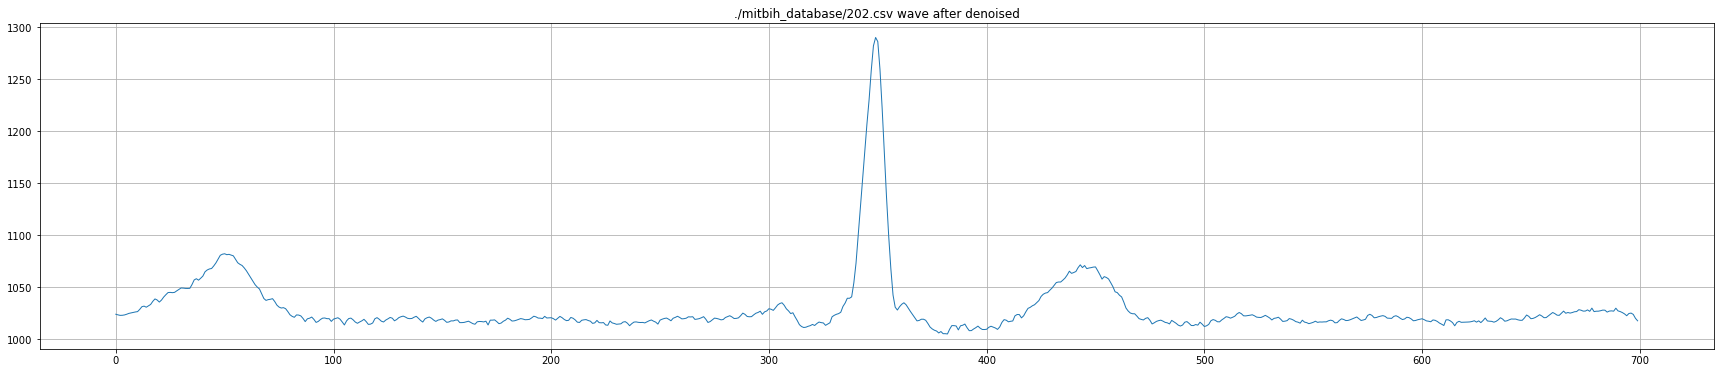

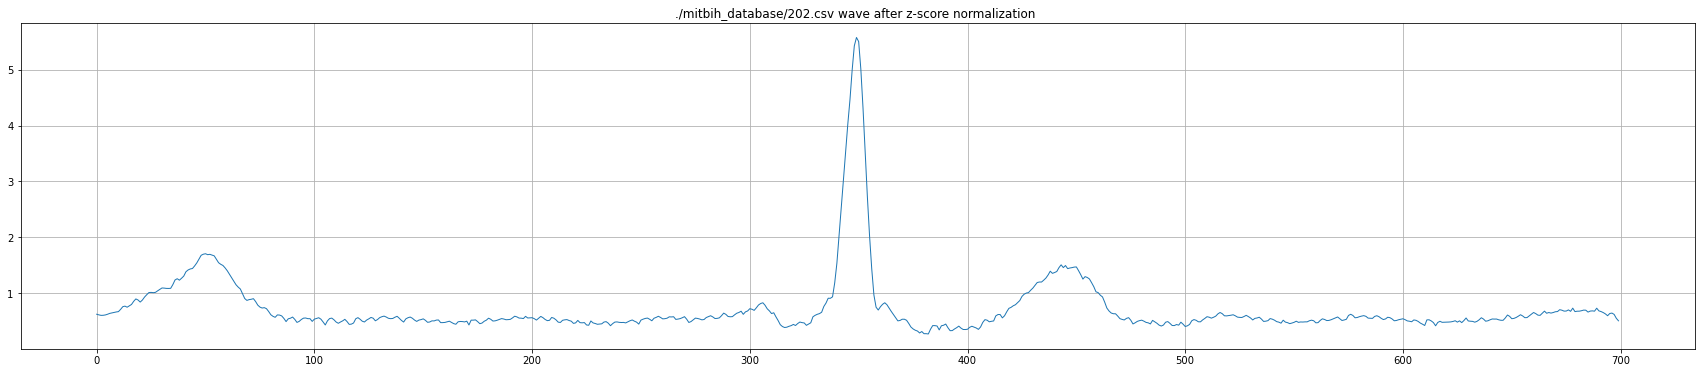

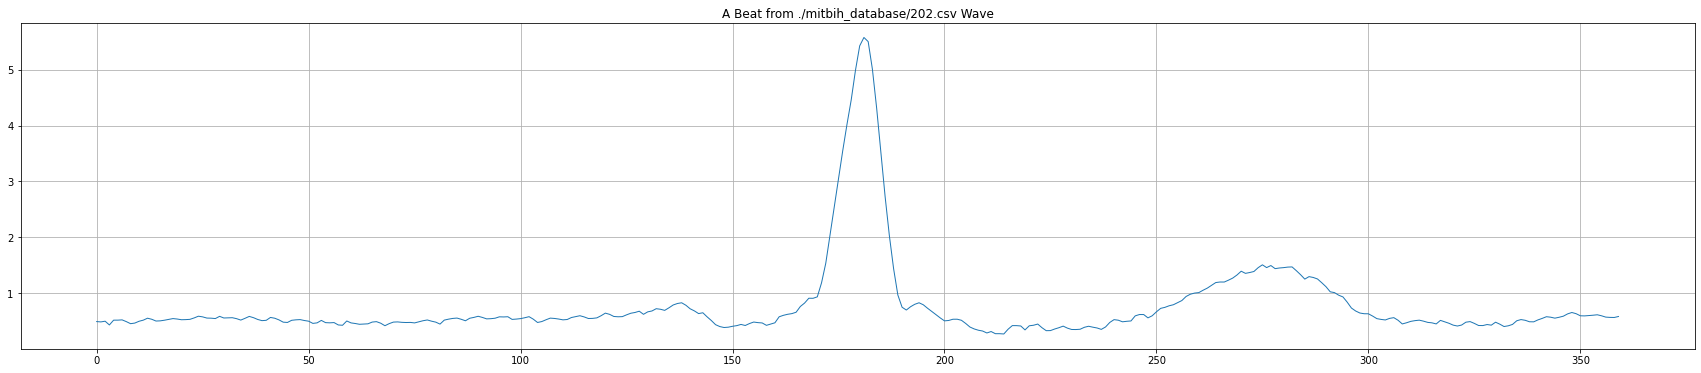

650000


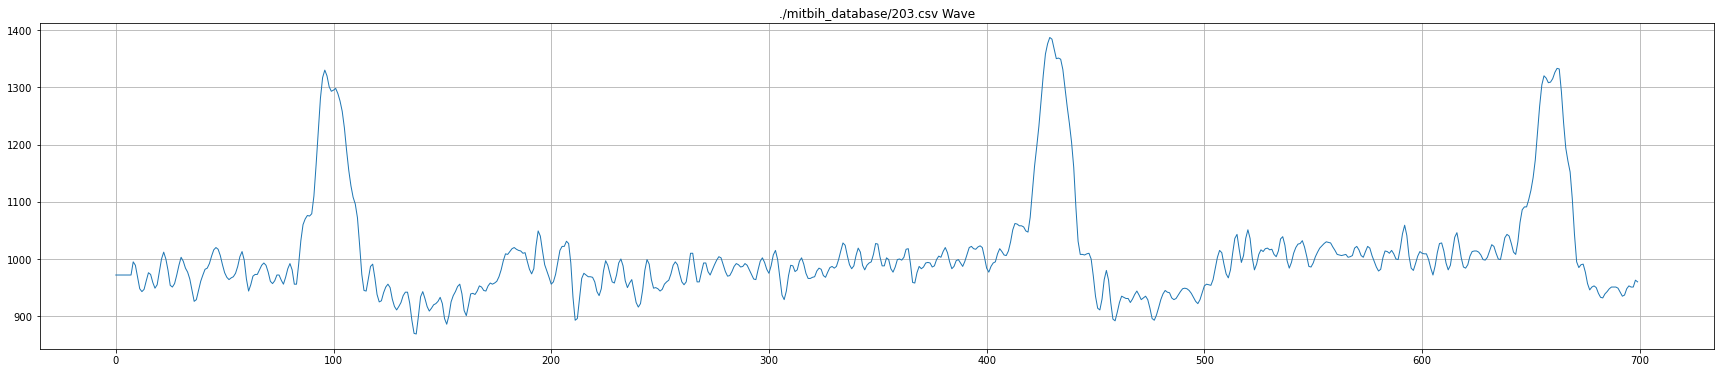

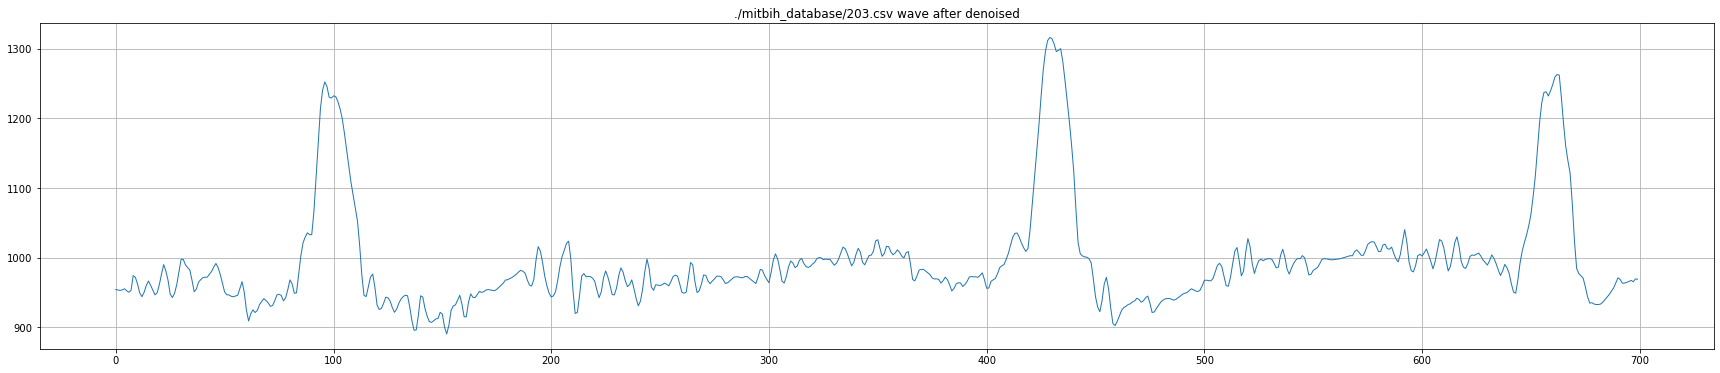

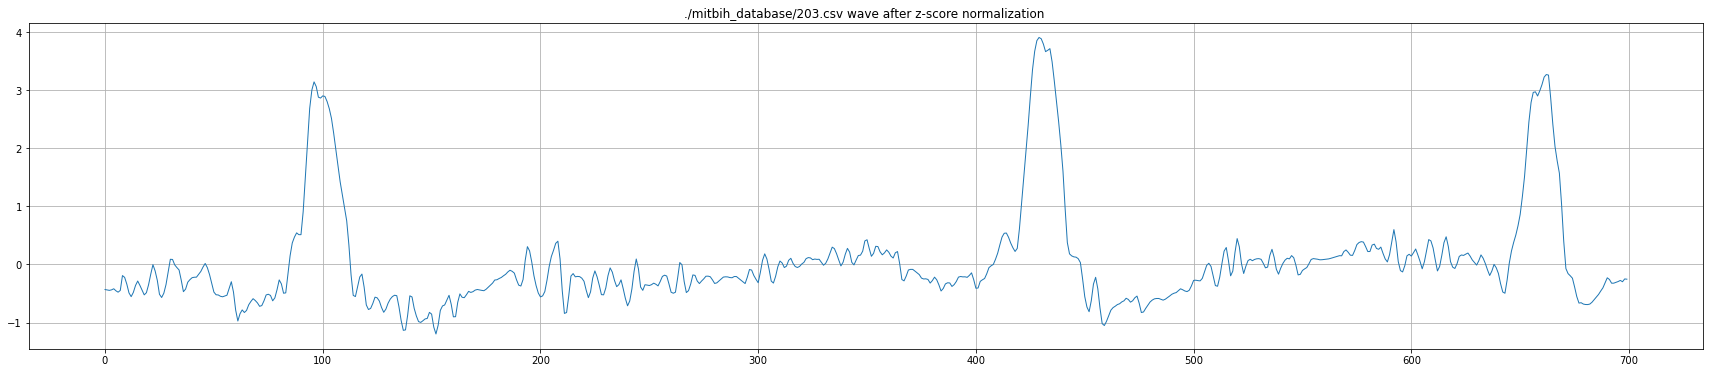

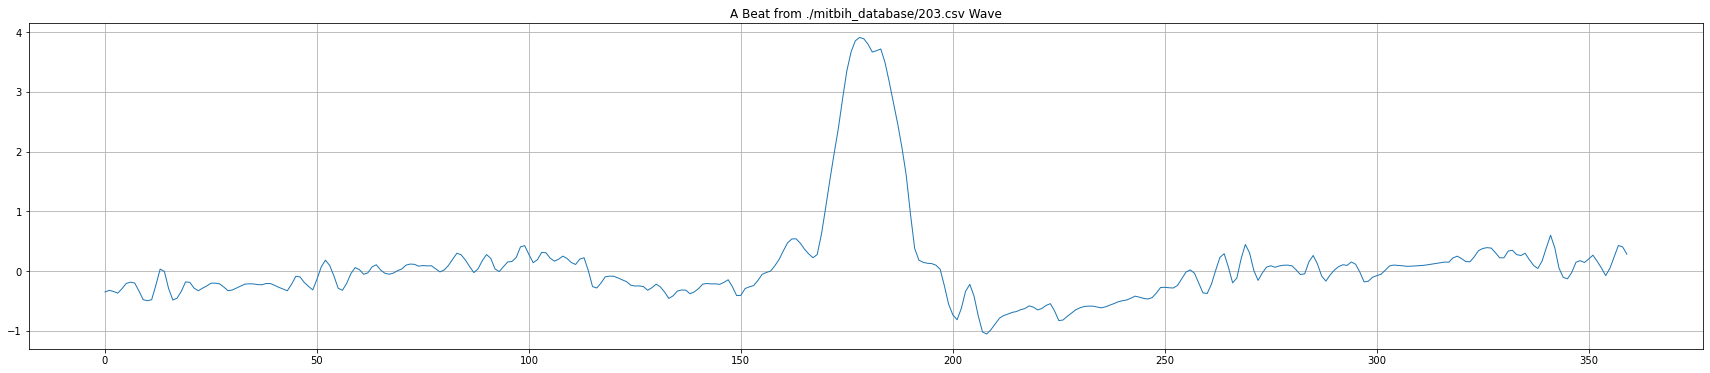

650000


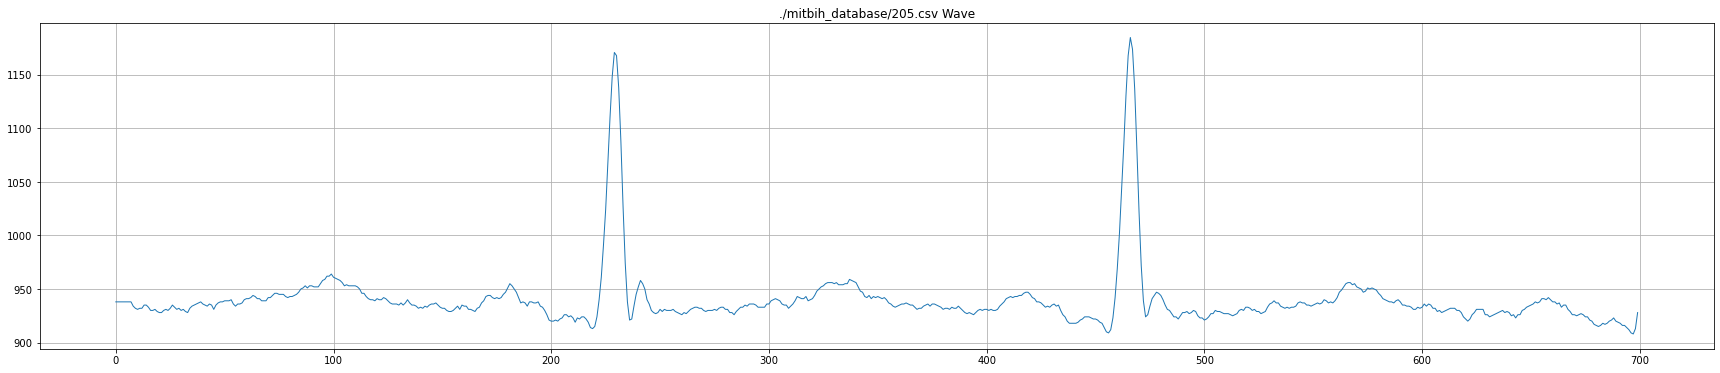

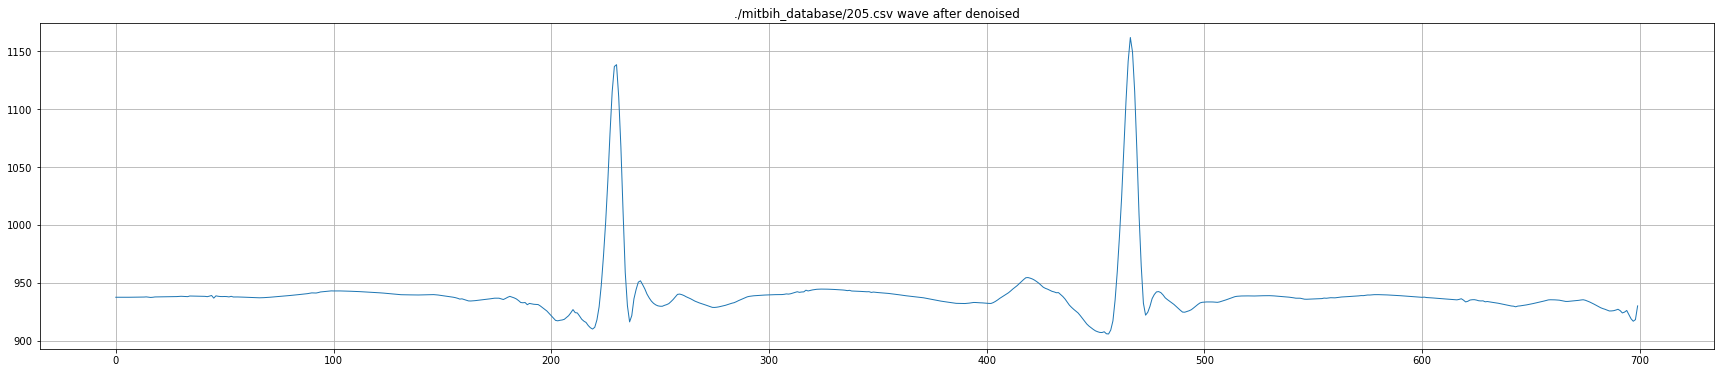

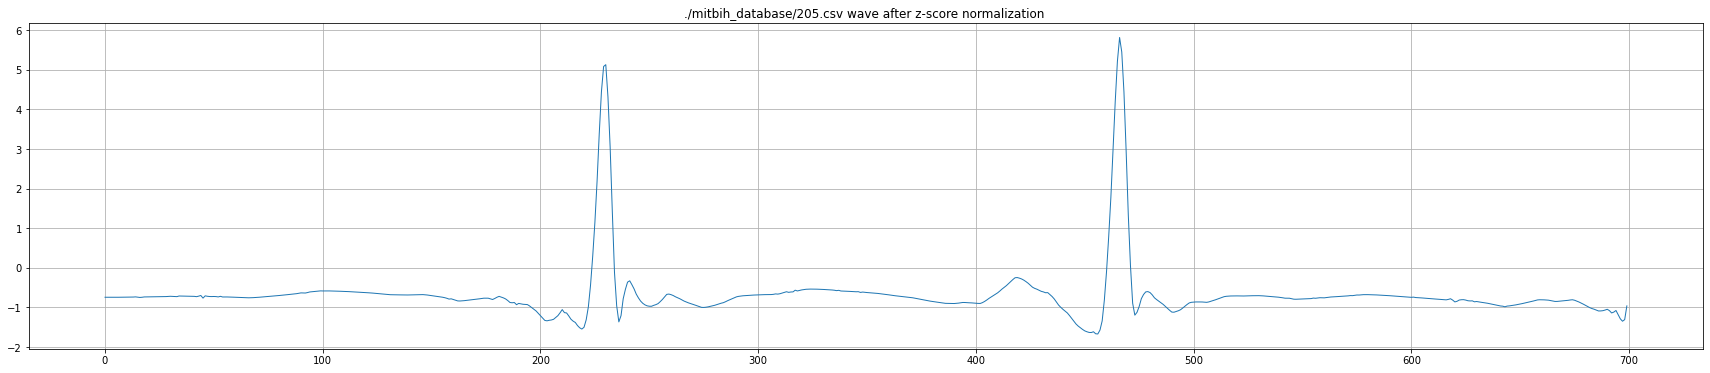

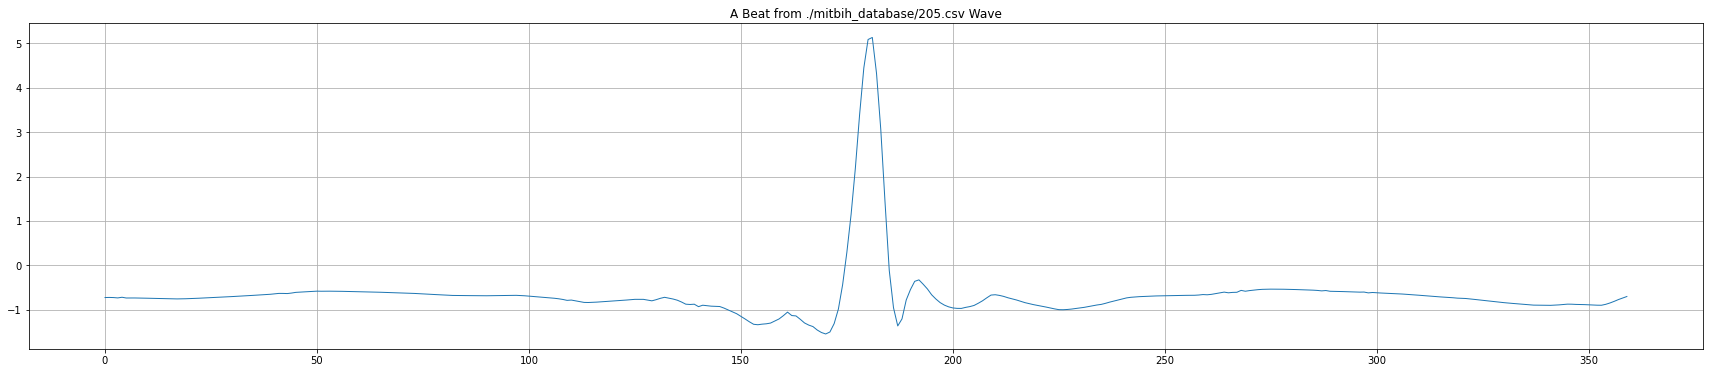

650000


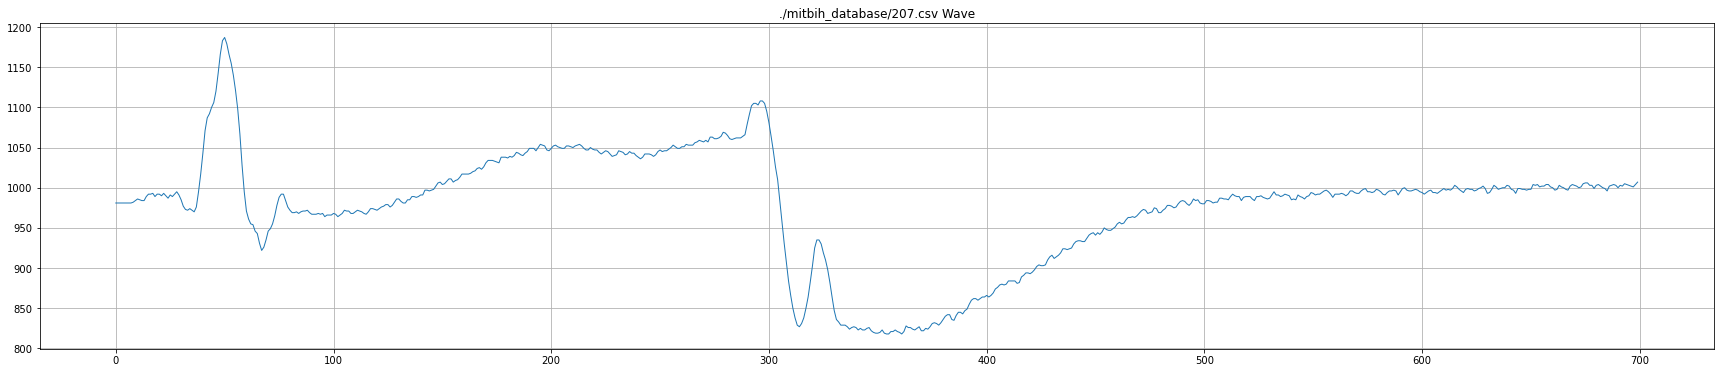

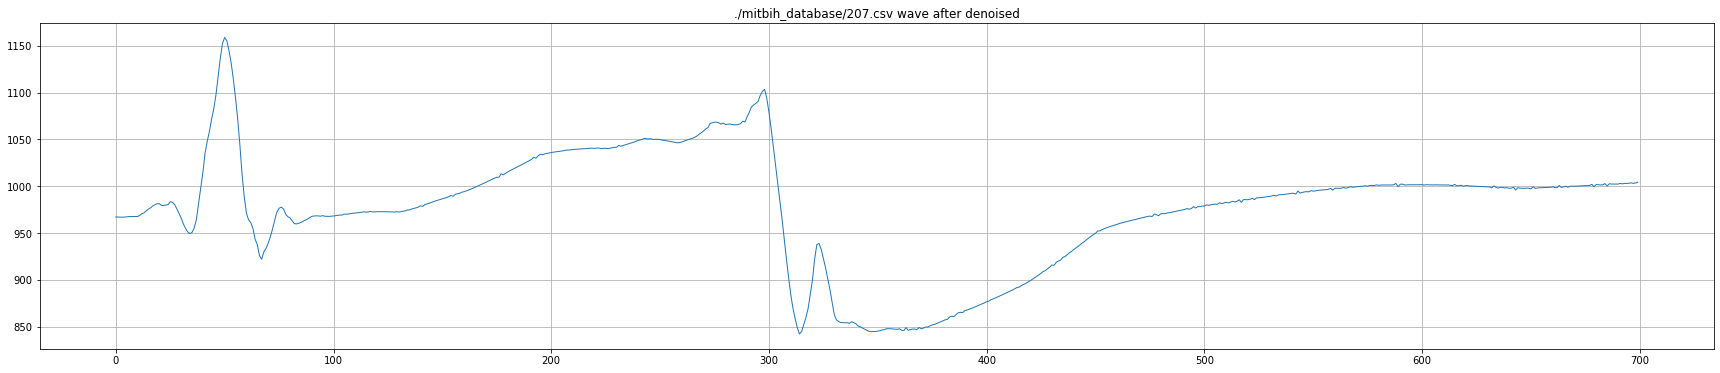

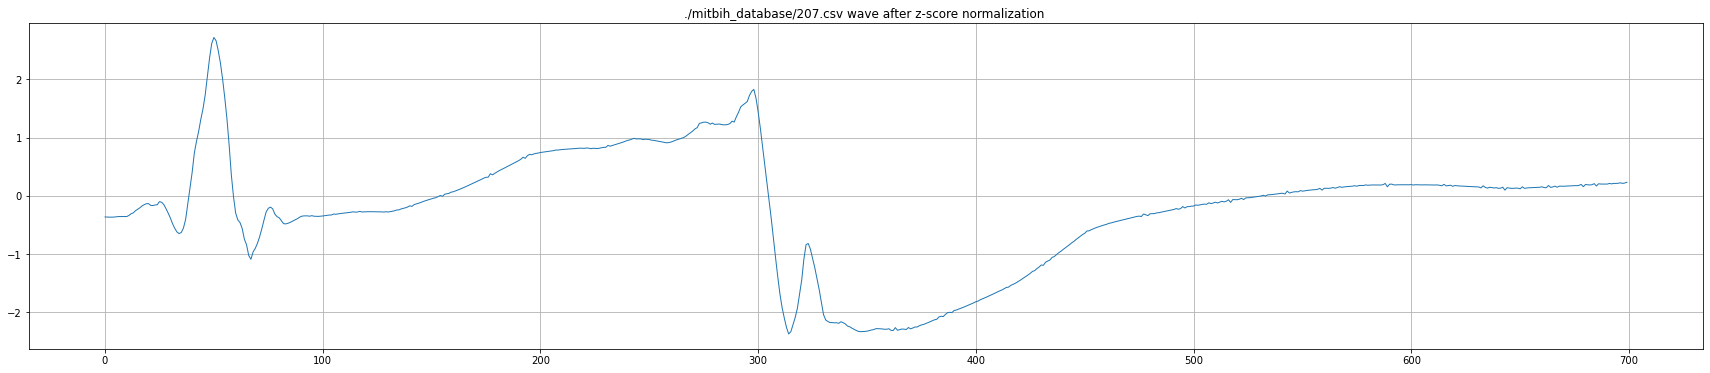

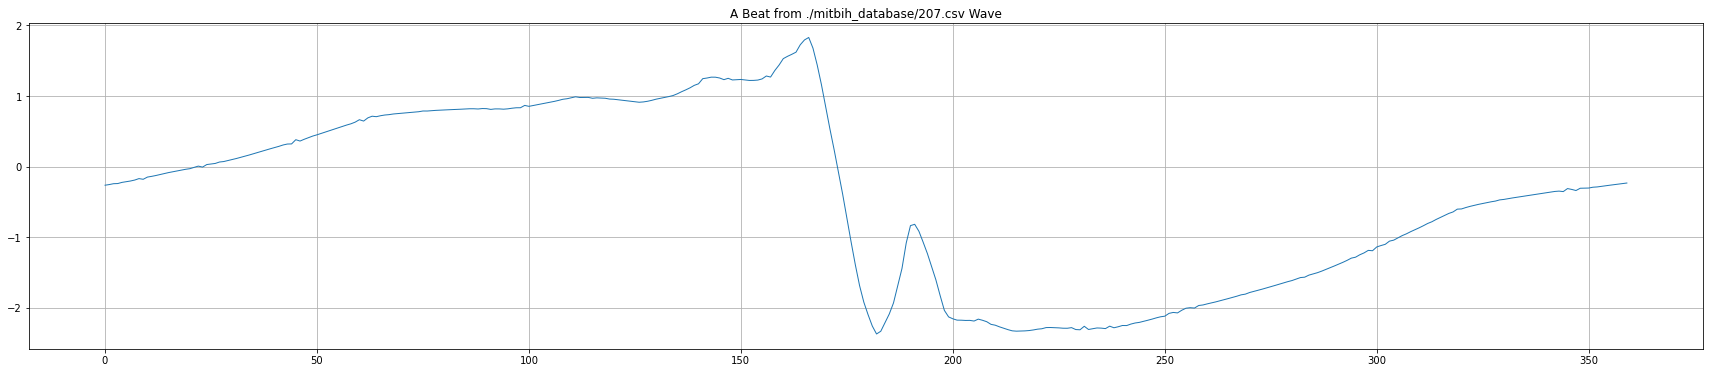

650000


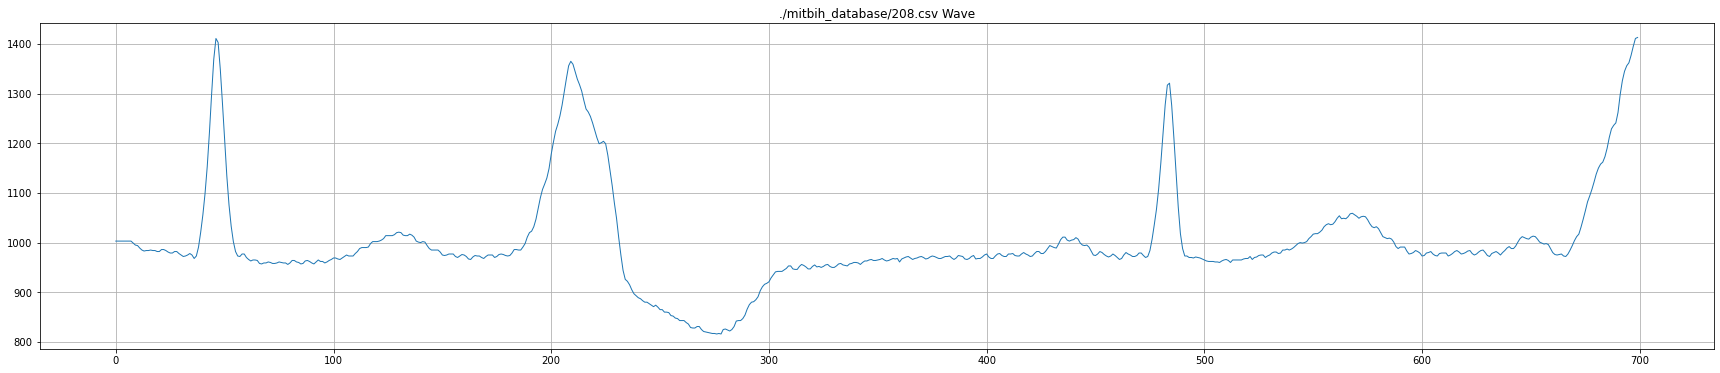

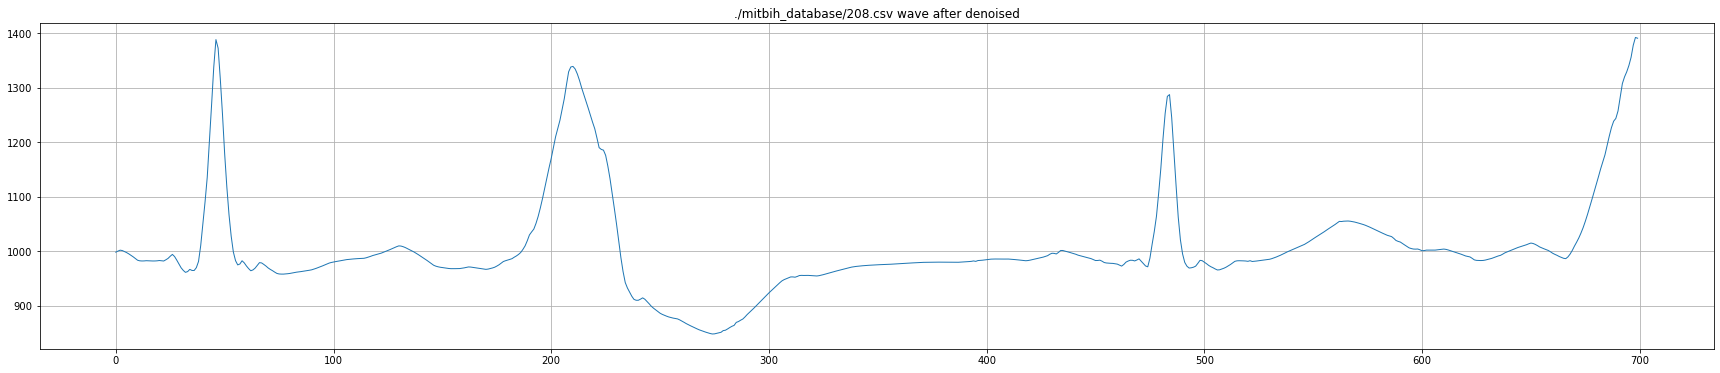

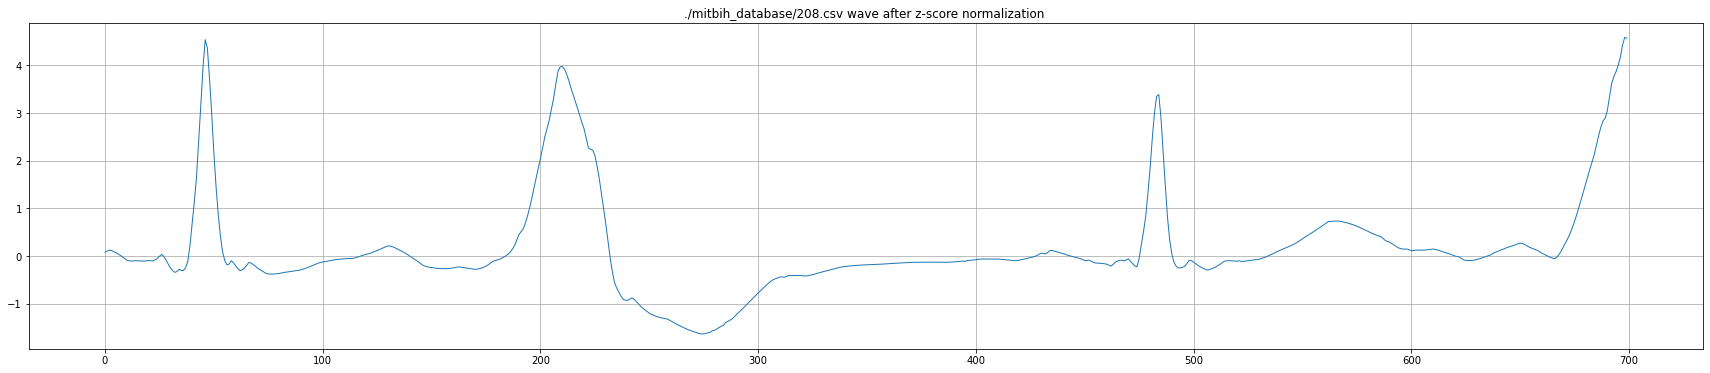

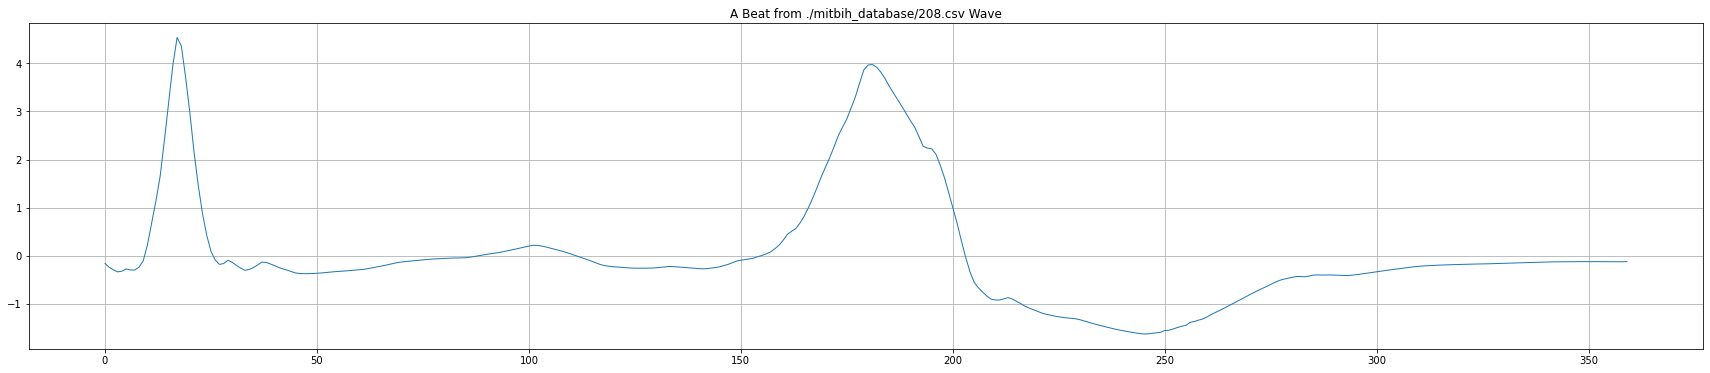

650000


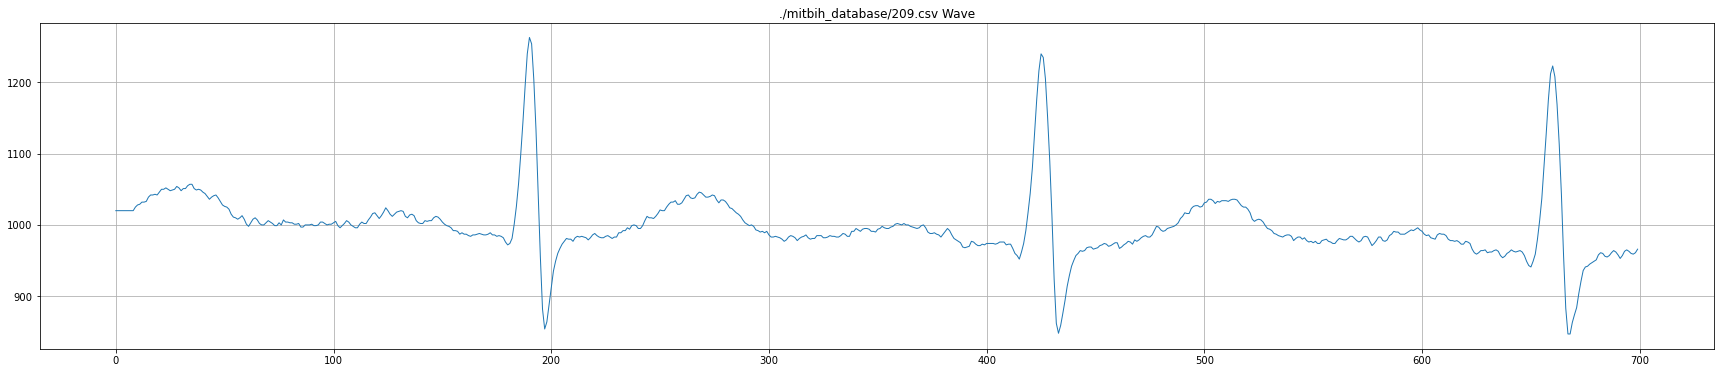

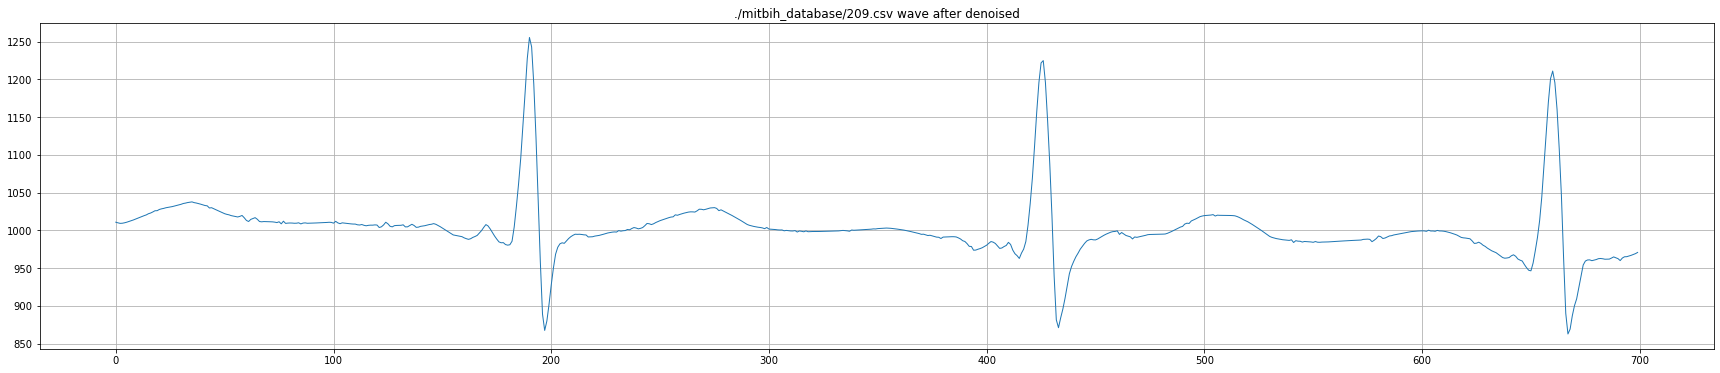

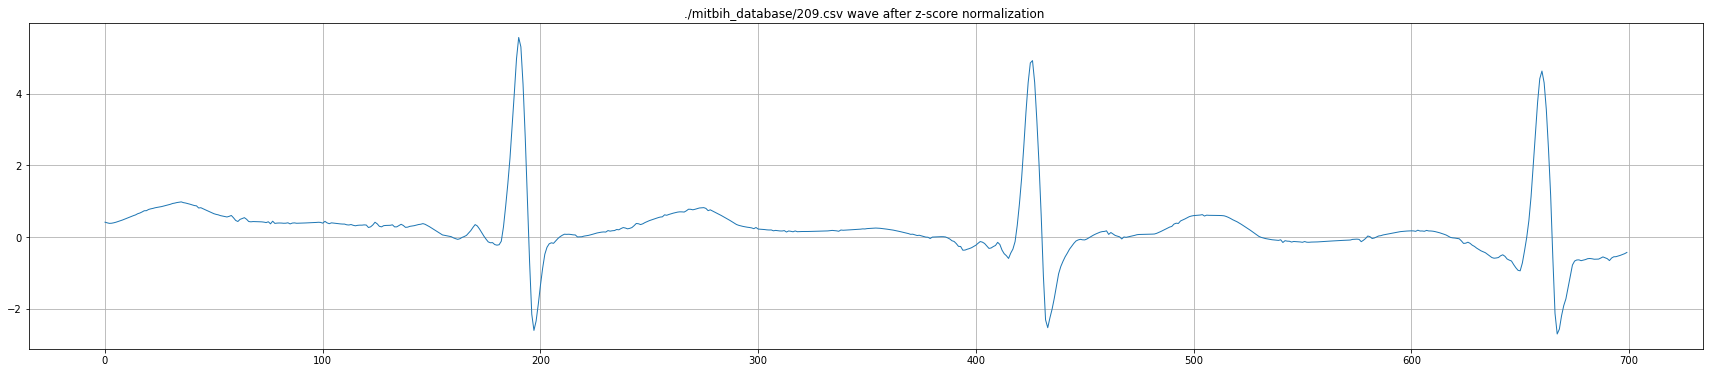

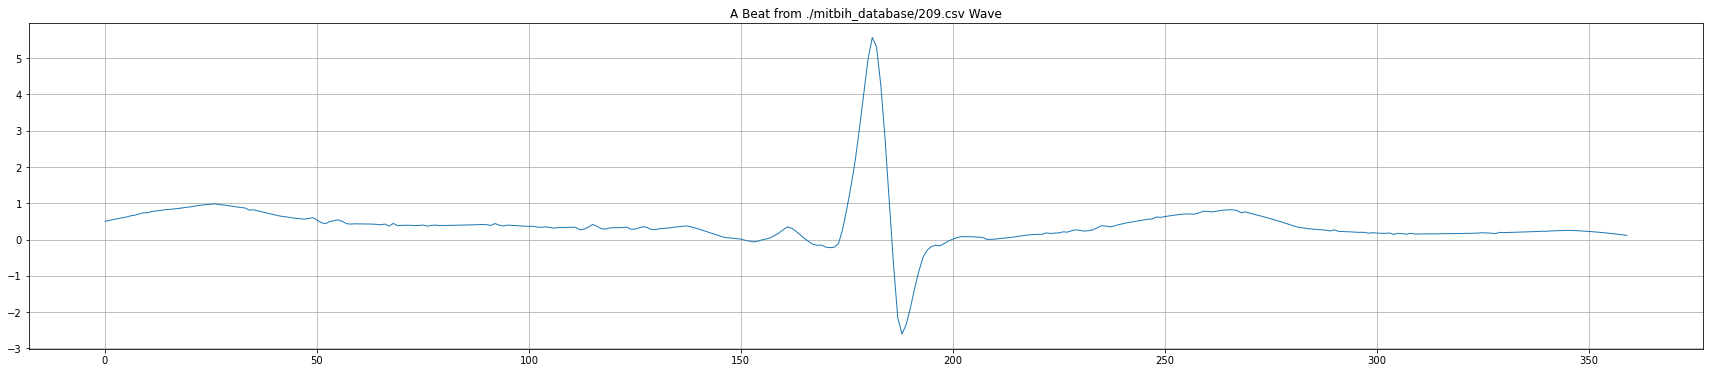

650000


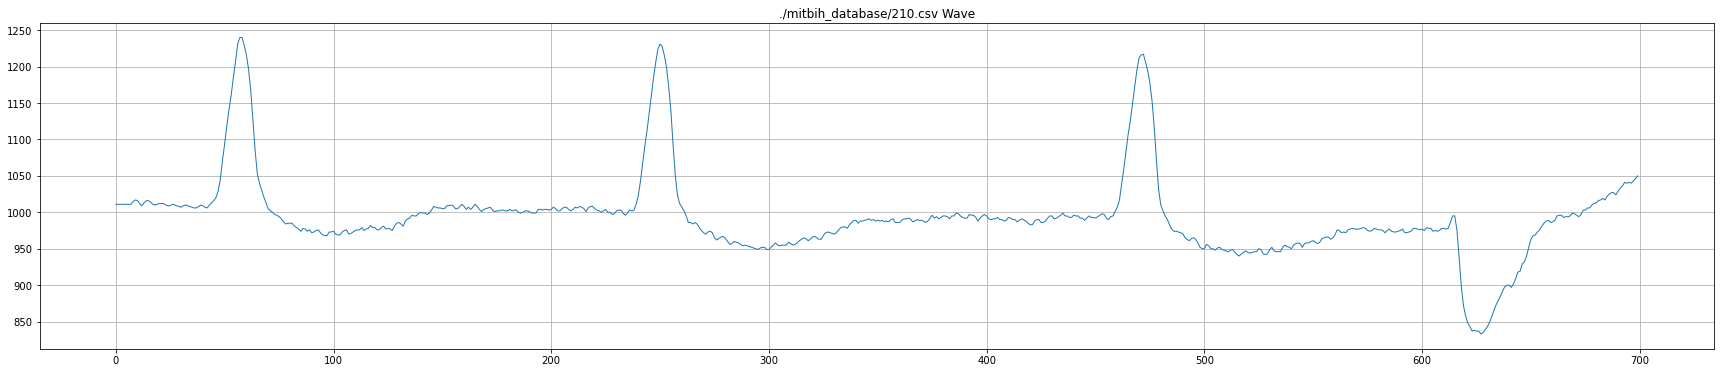

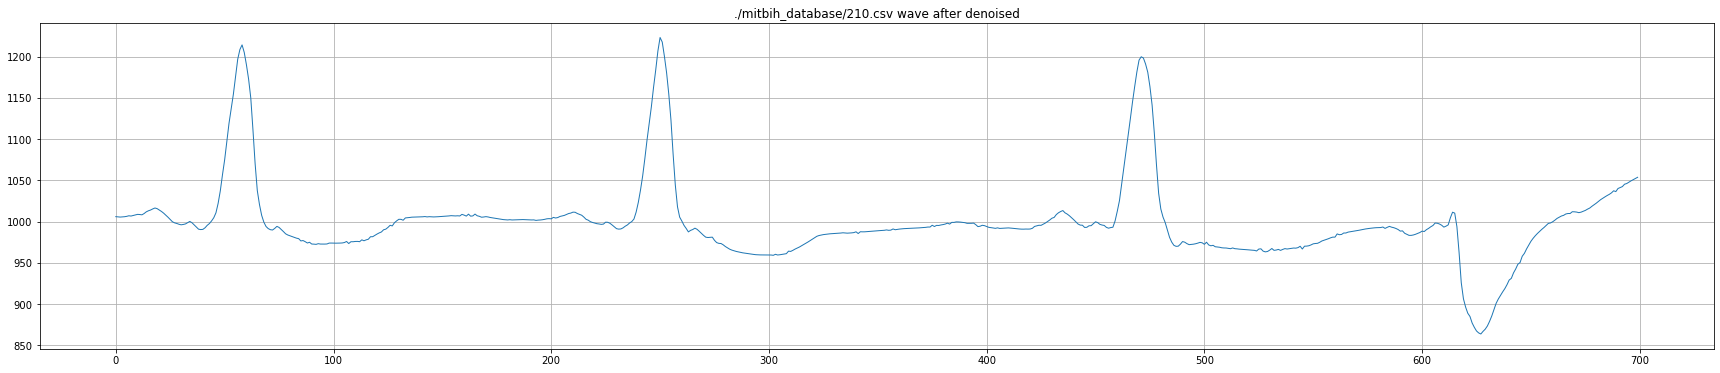

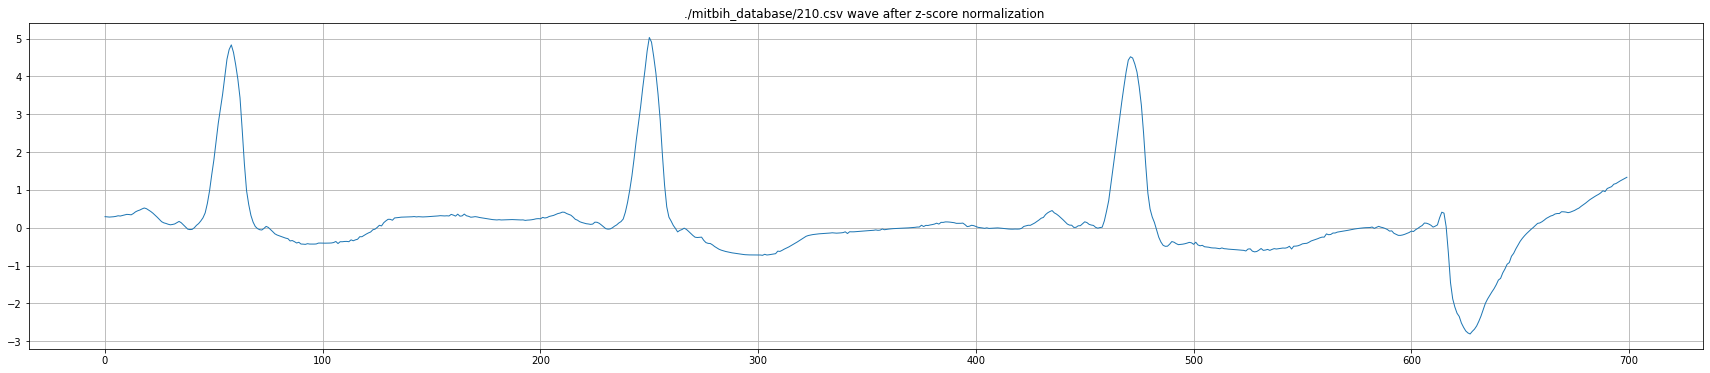

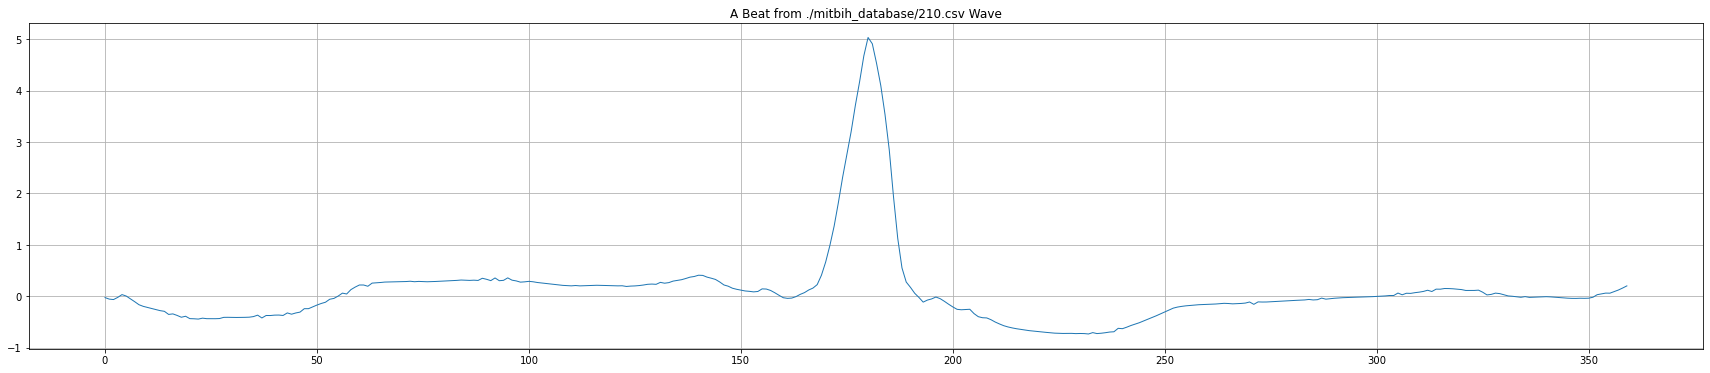

650000


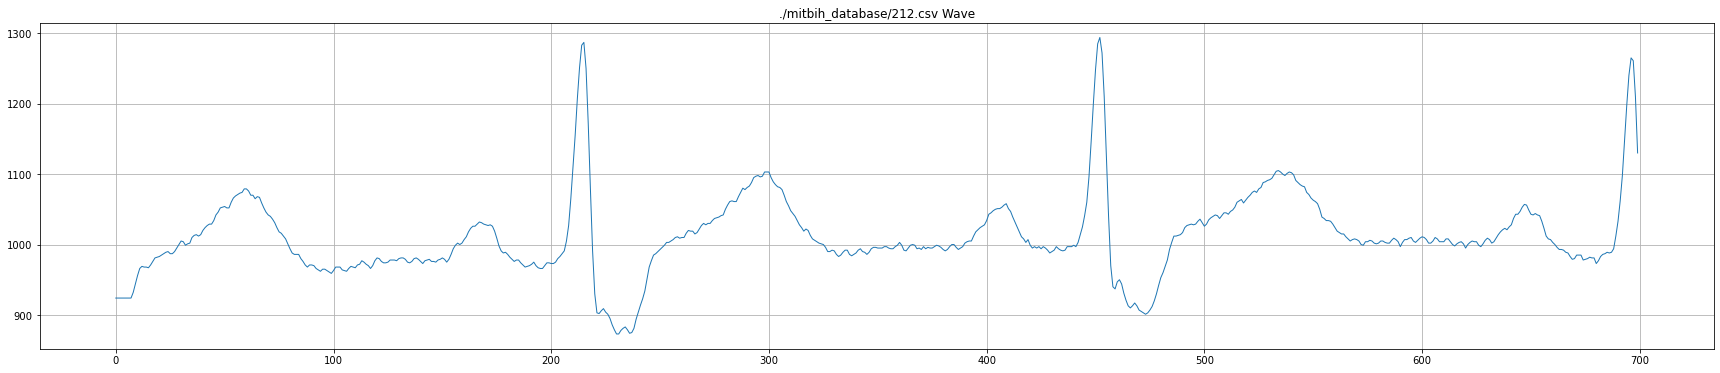

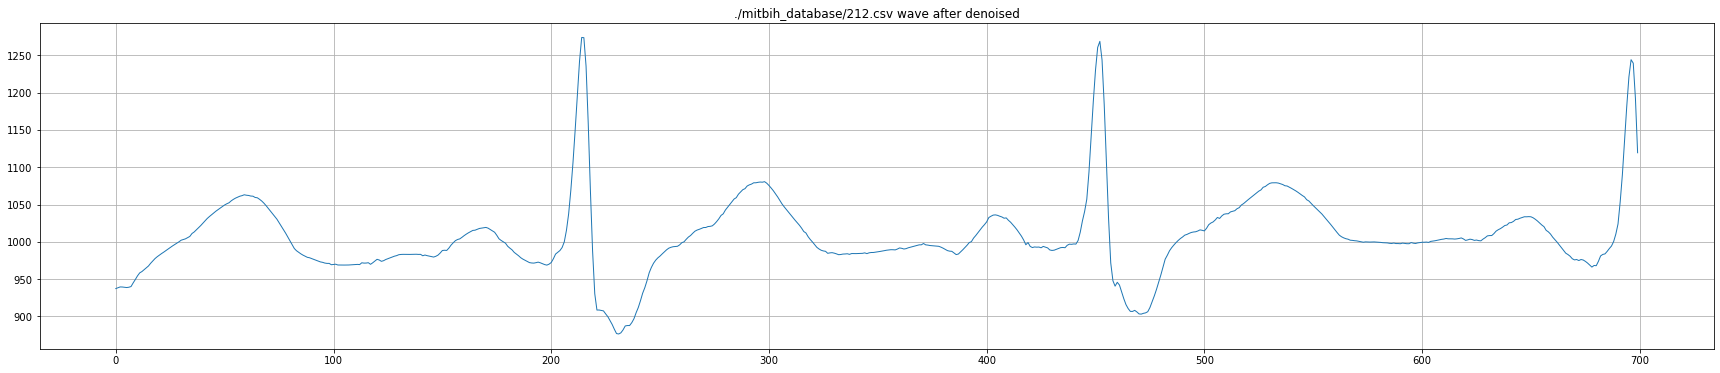

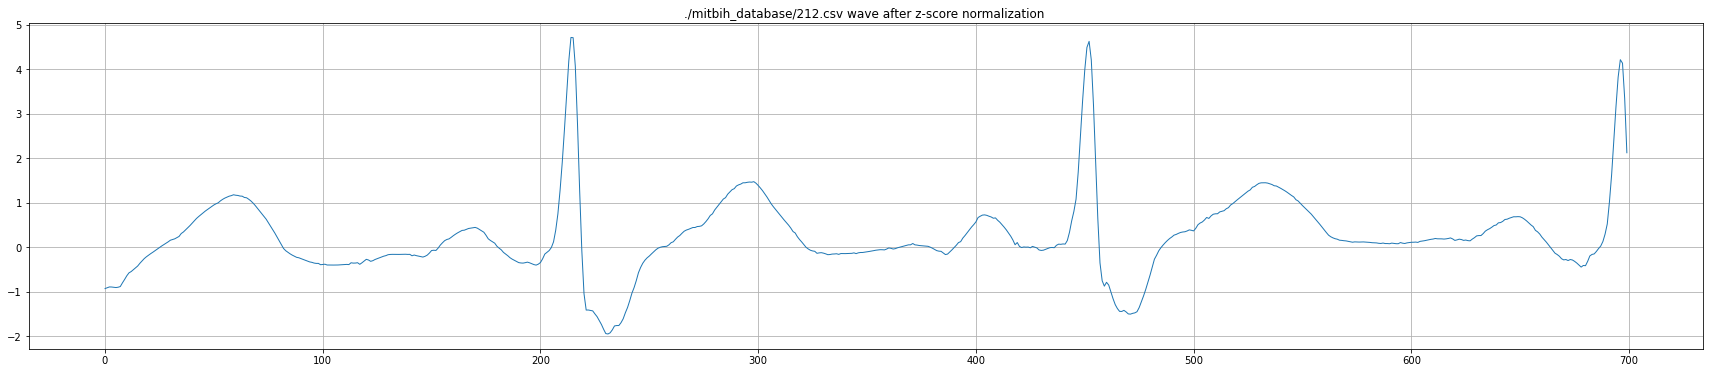

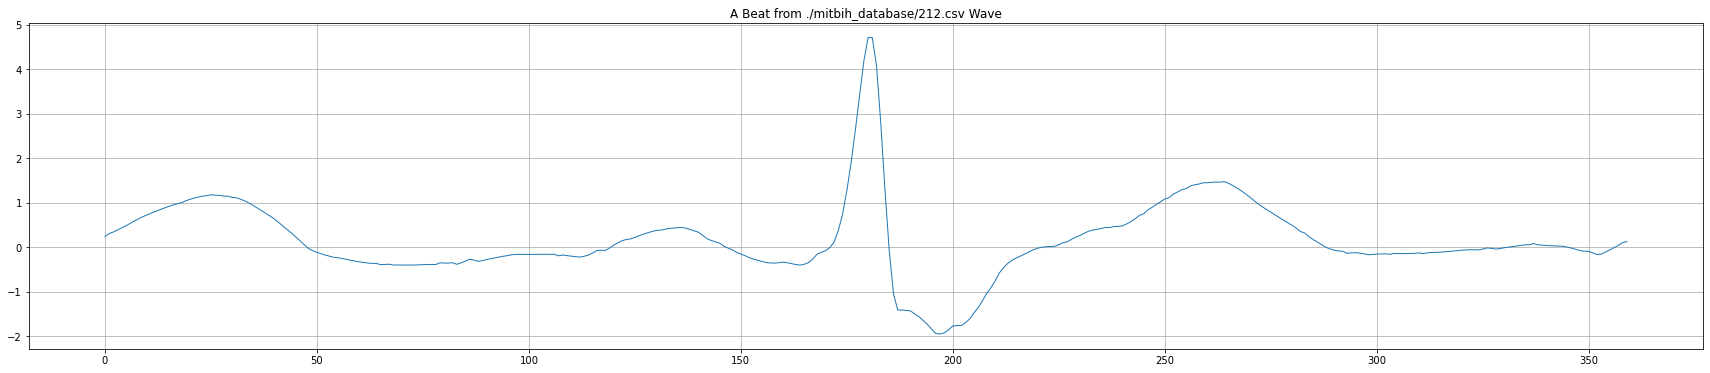

650000


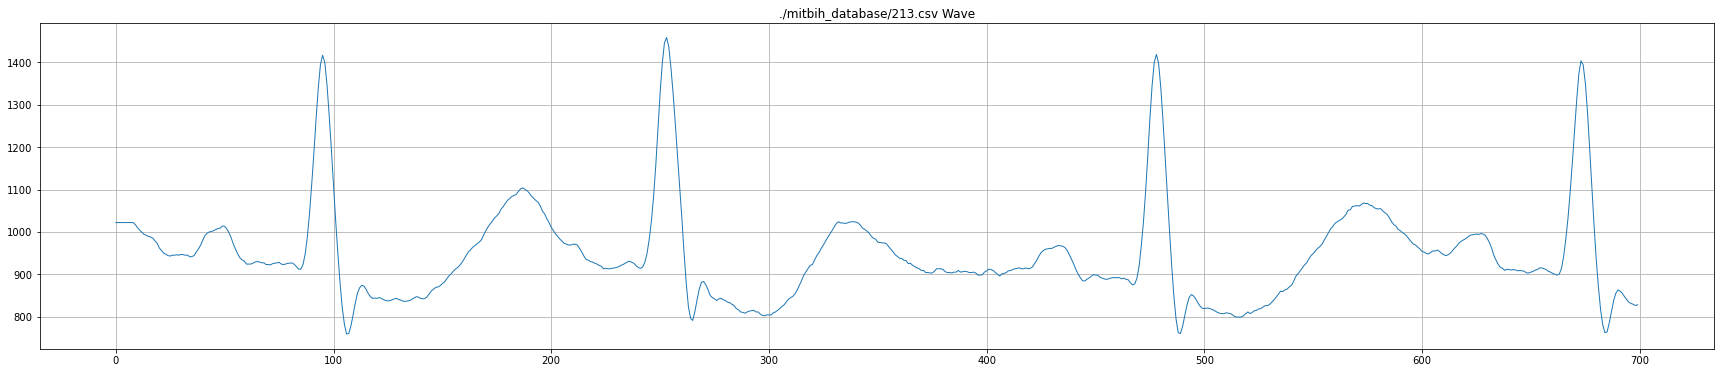

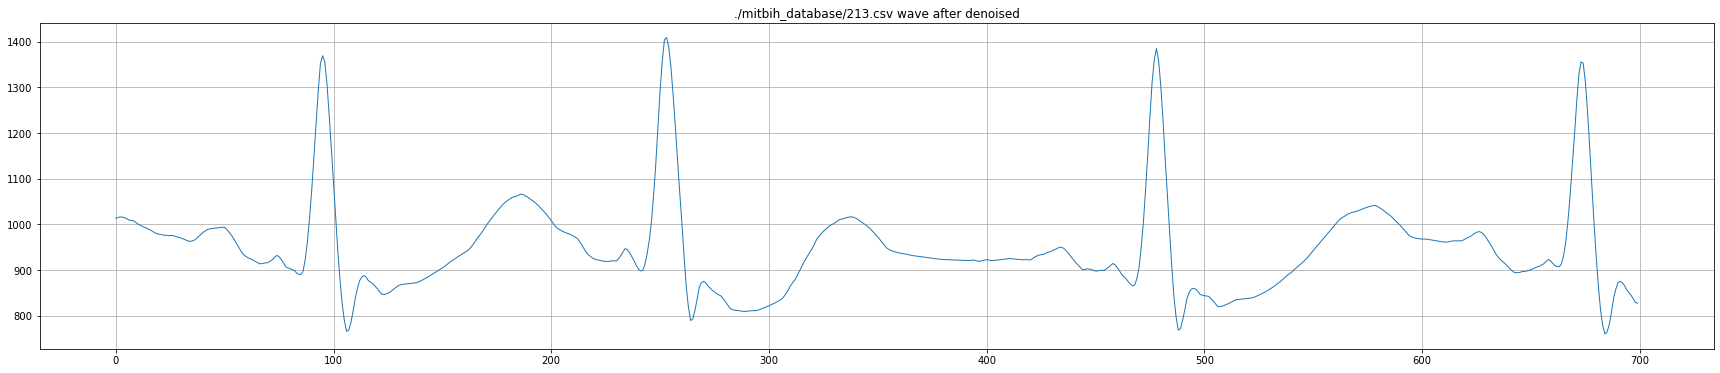

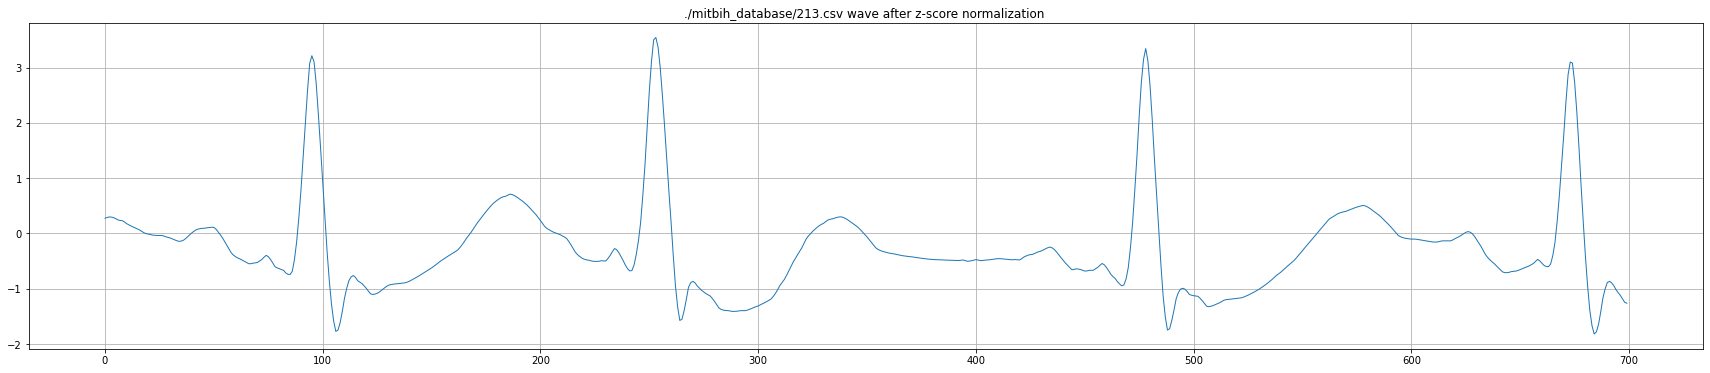

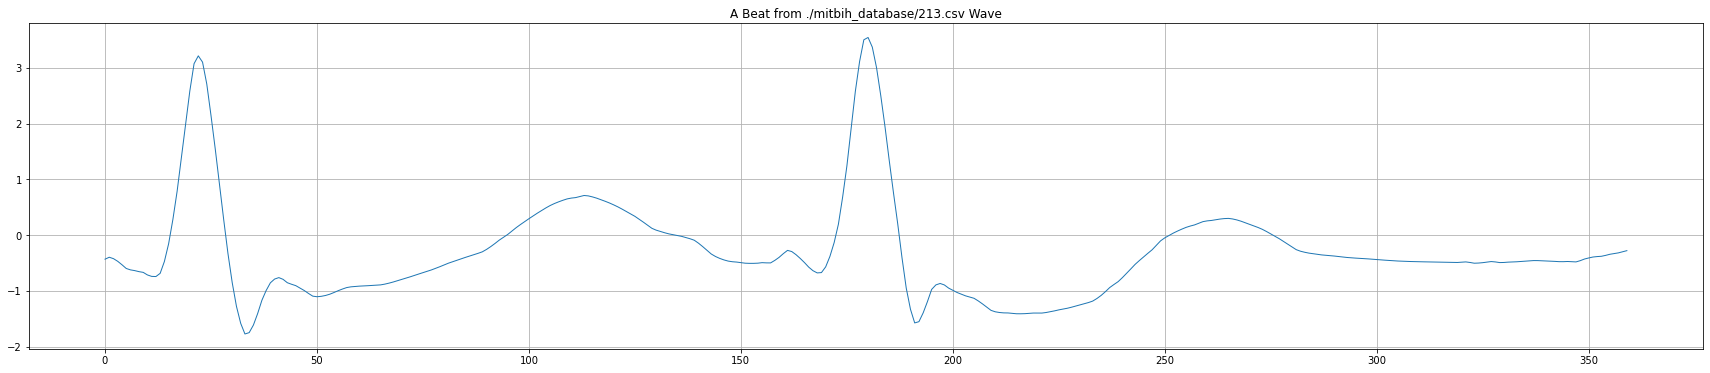

650000


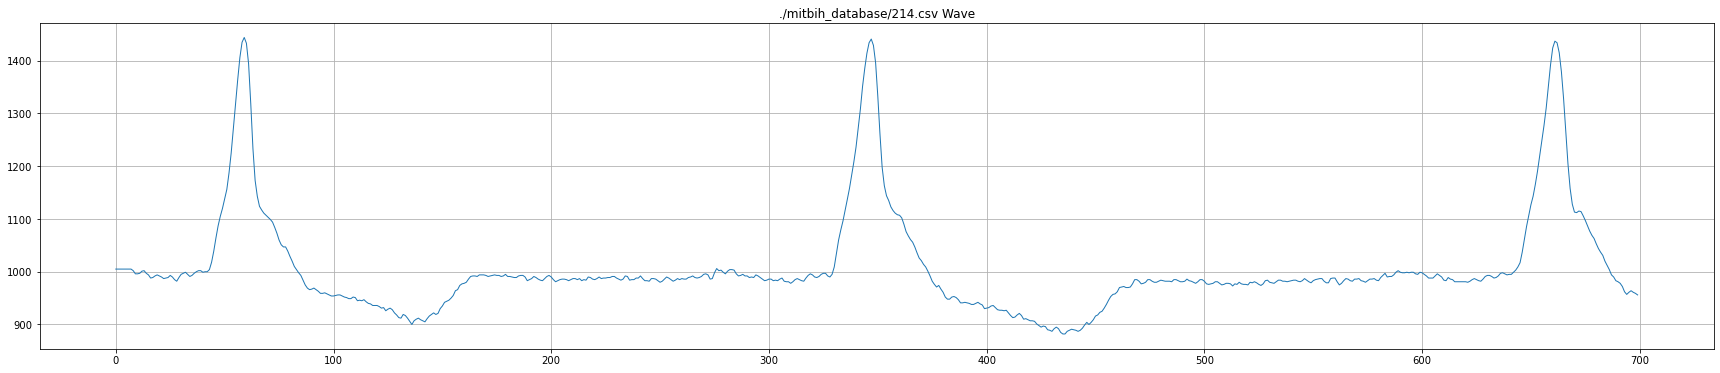

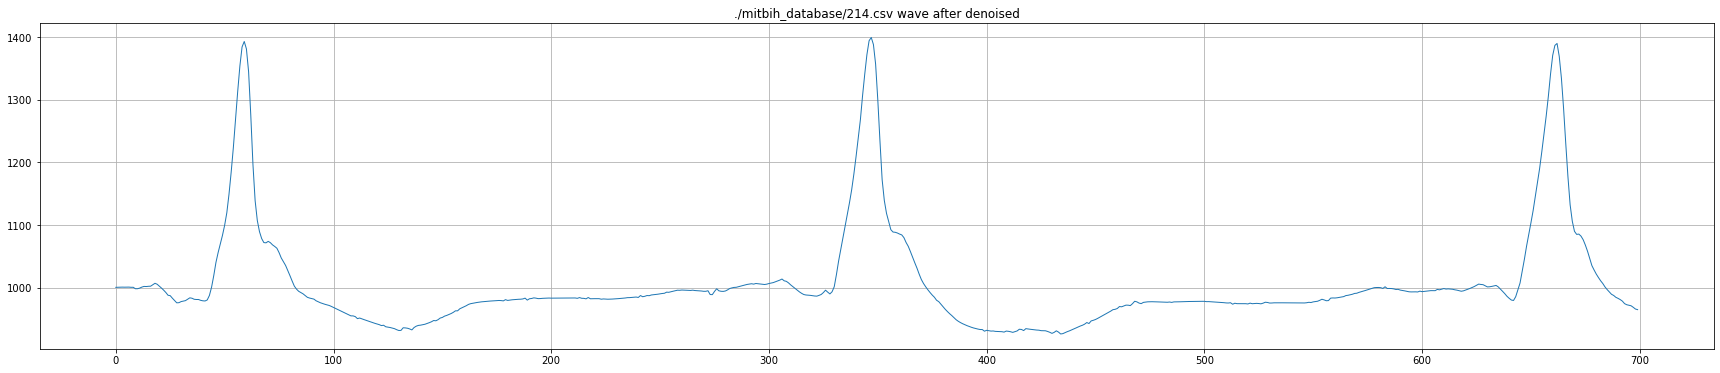

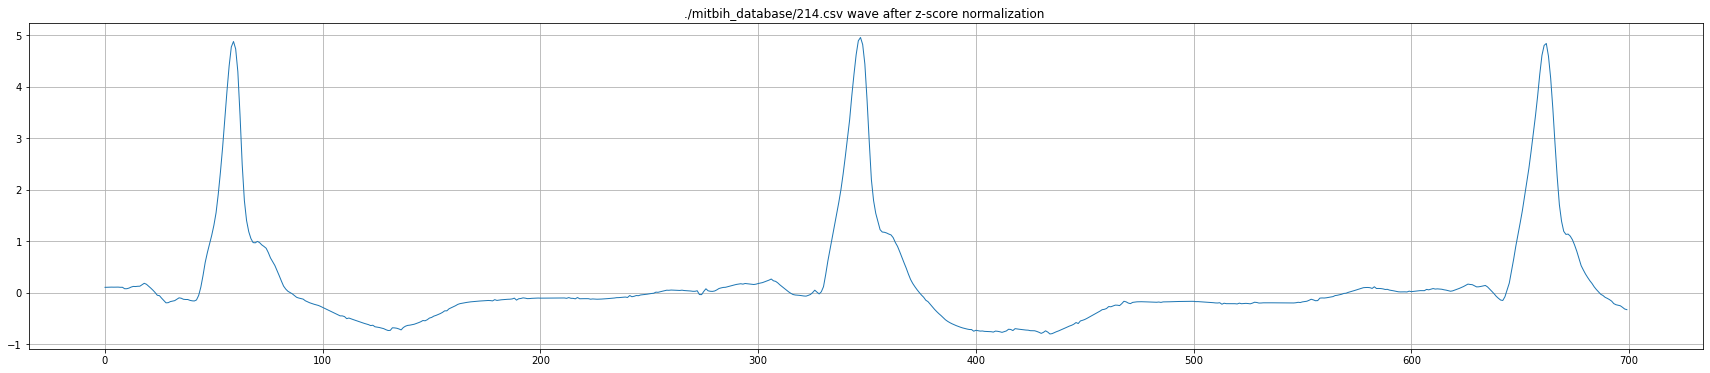

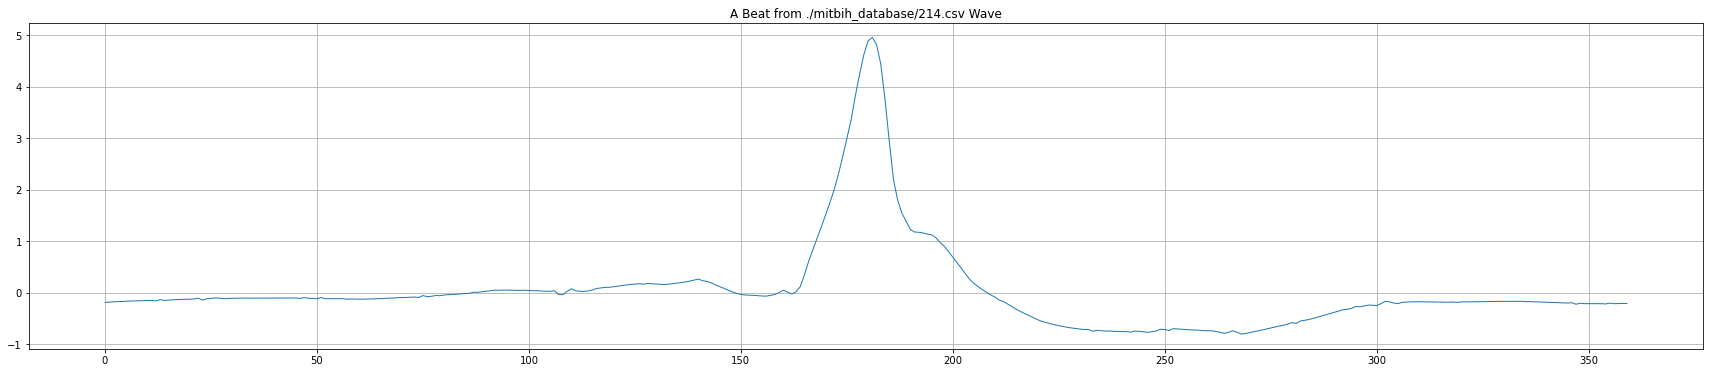

650000


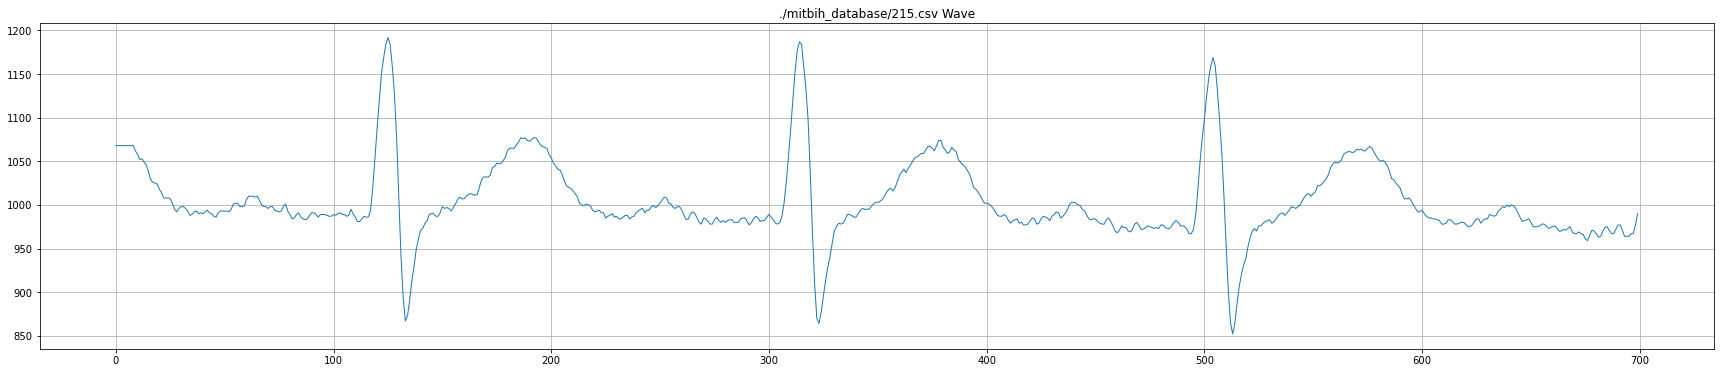

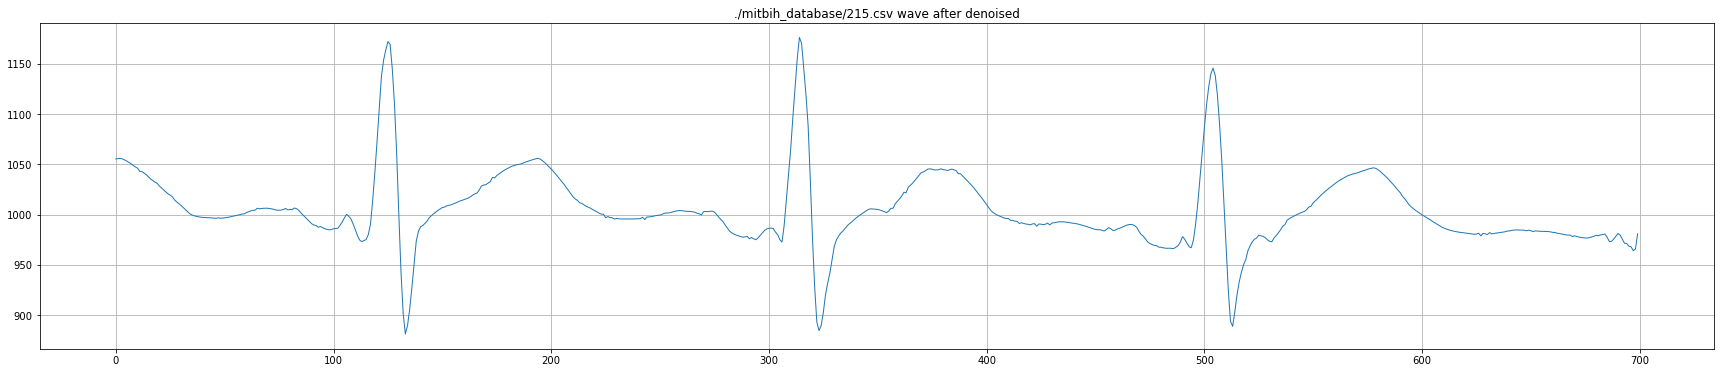

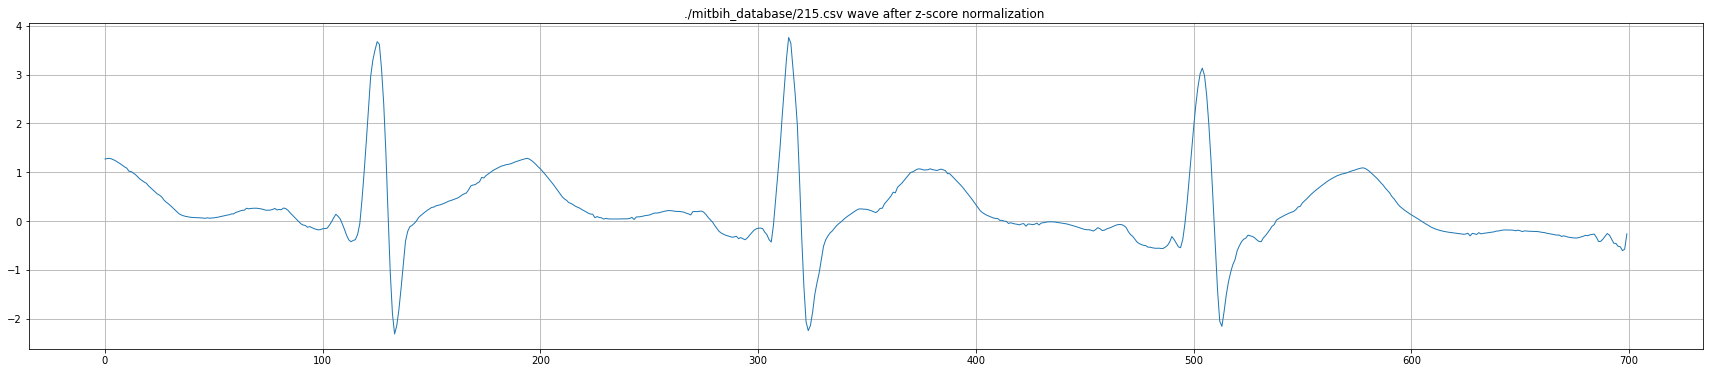

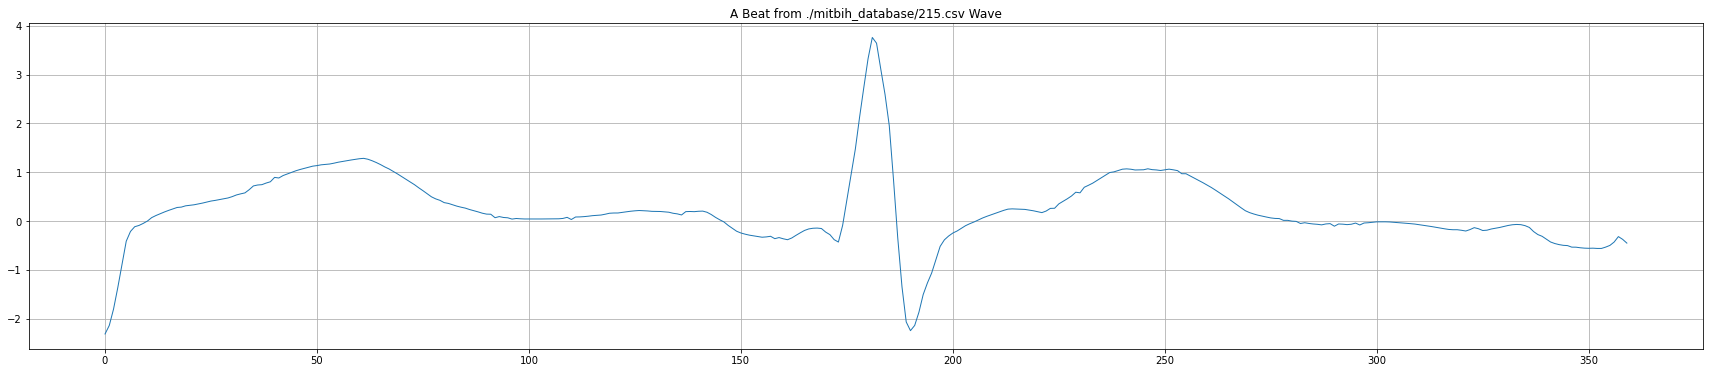

650000


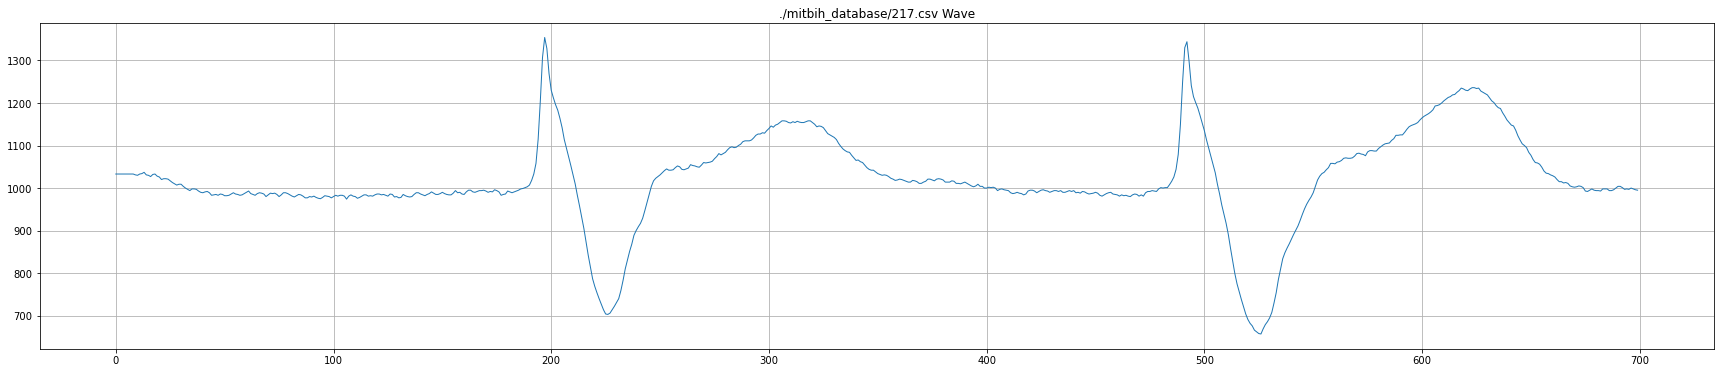

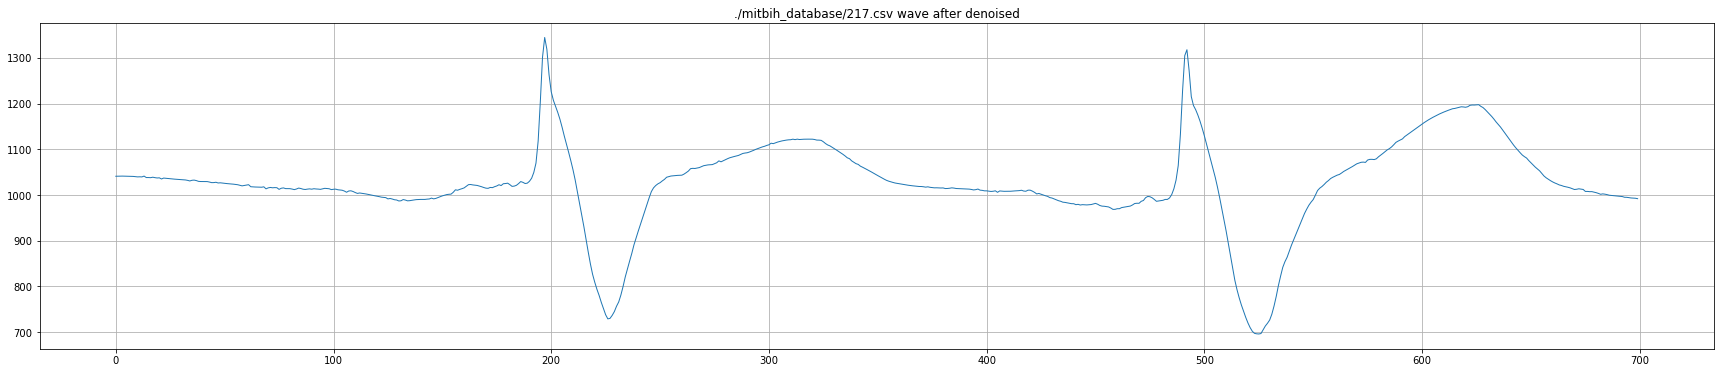

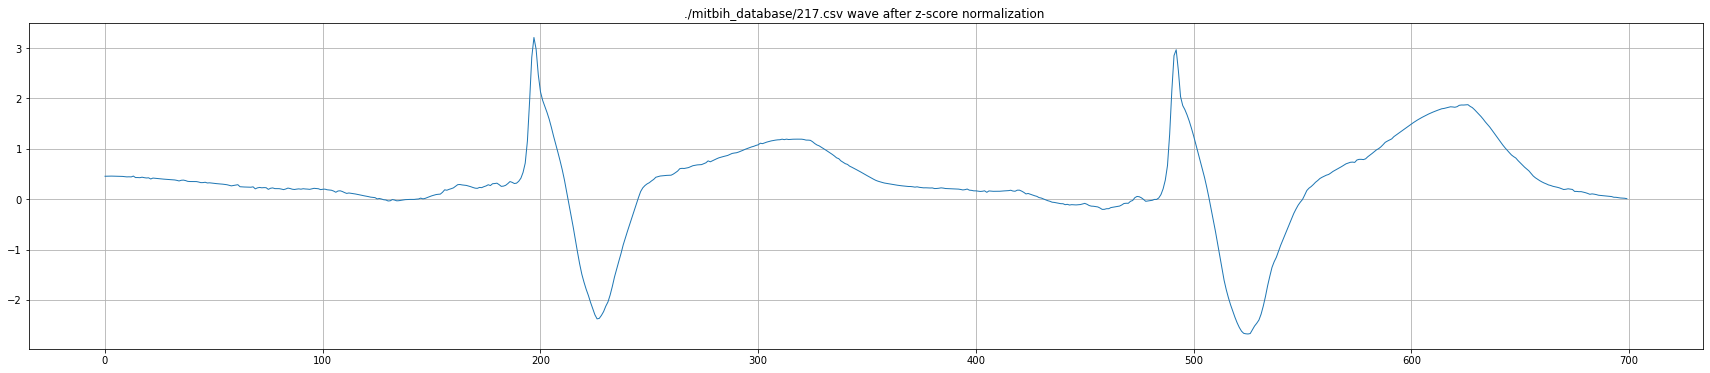

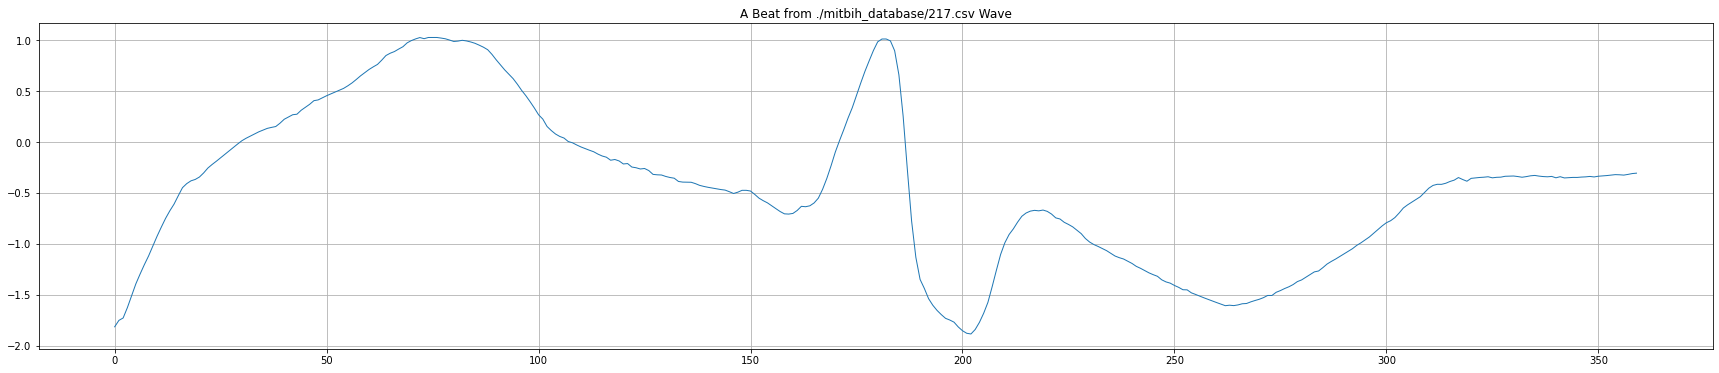

650000


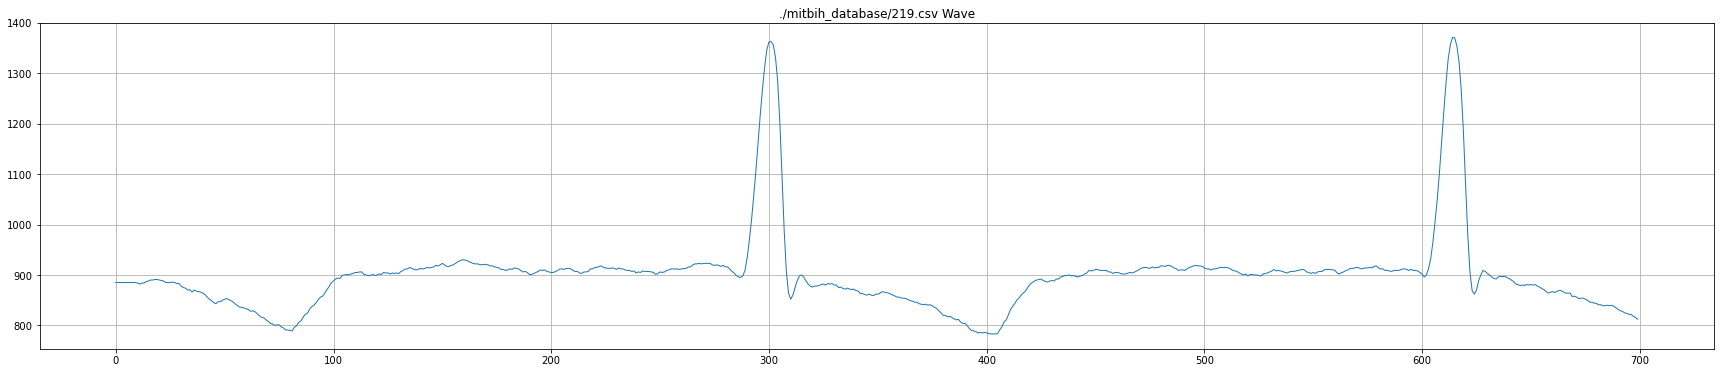

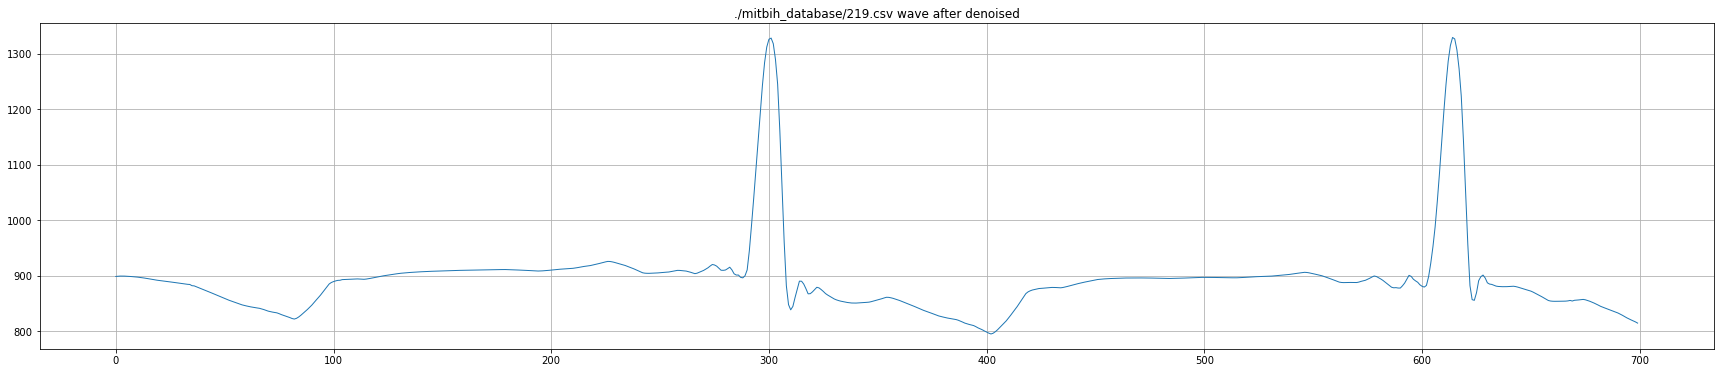

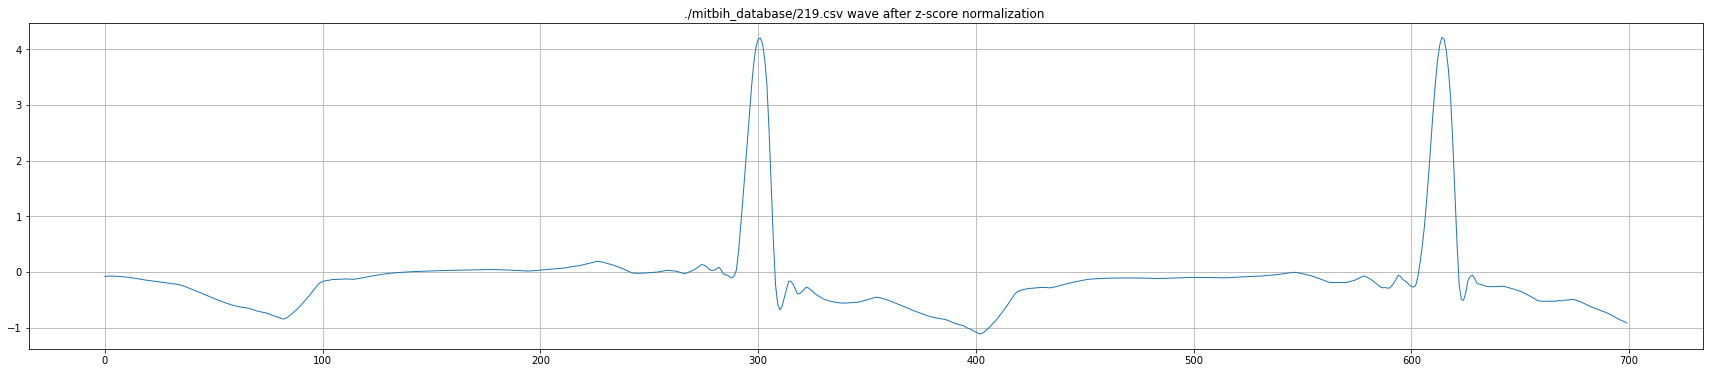

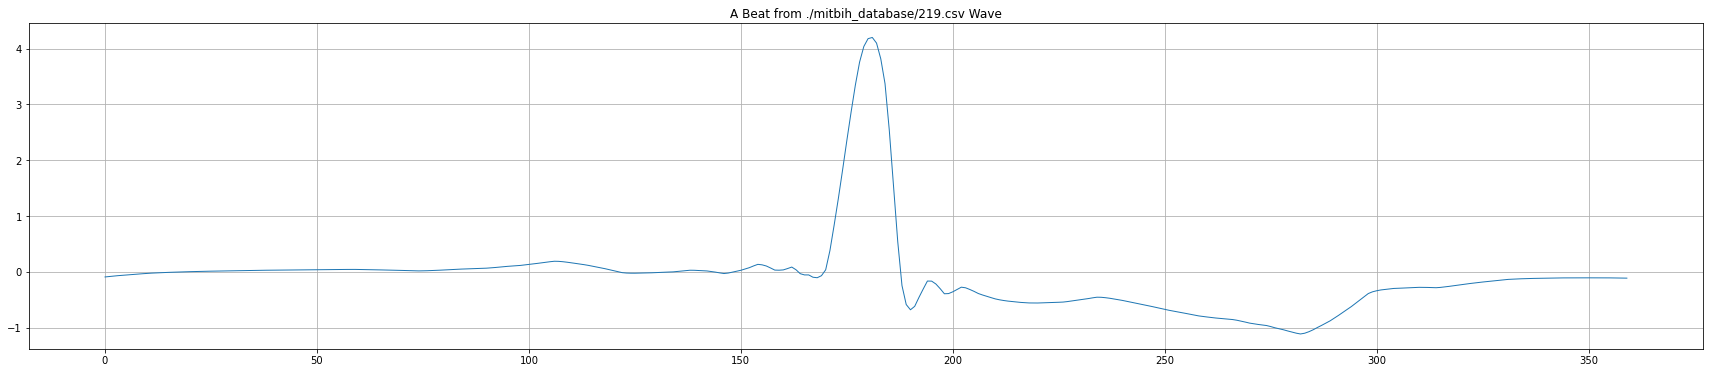

650000


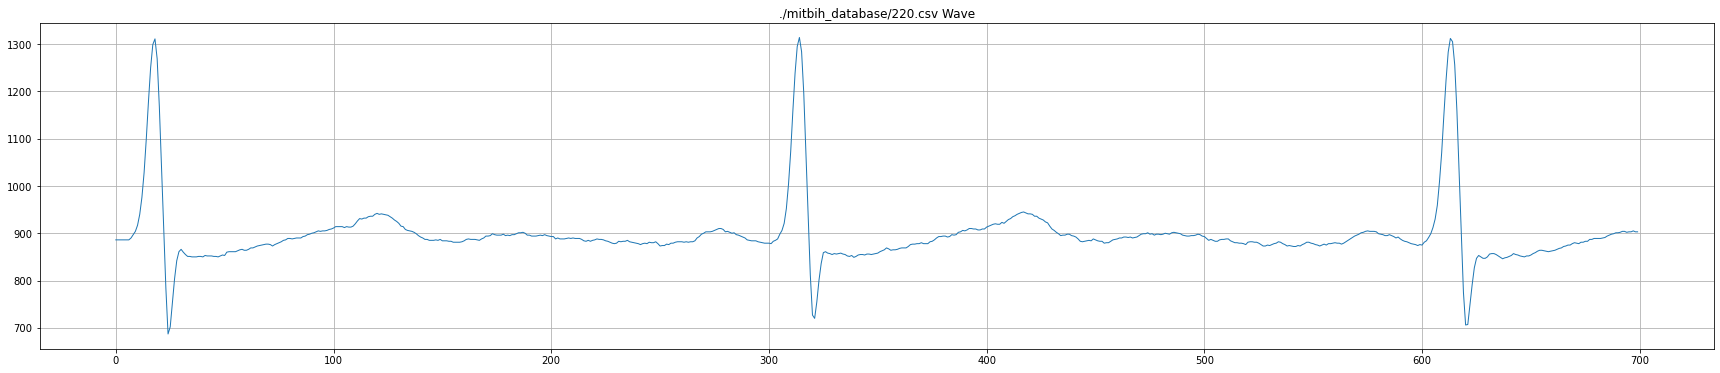

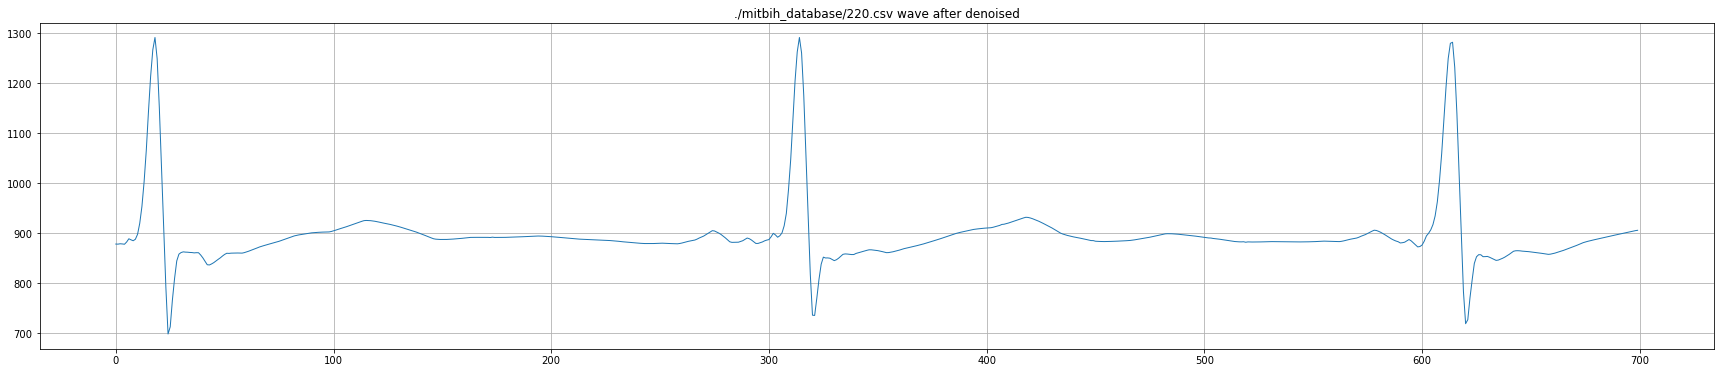

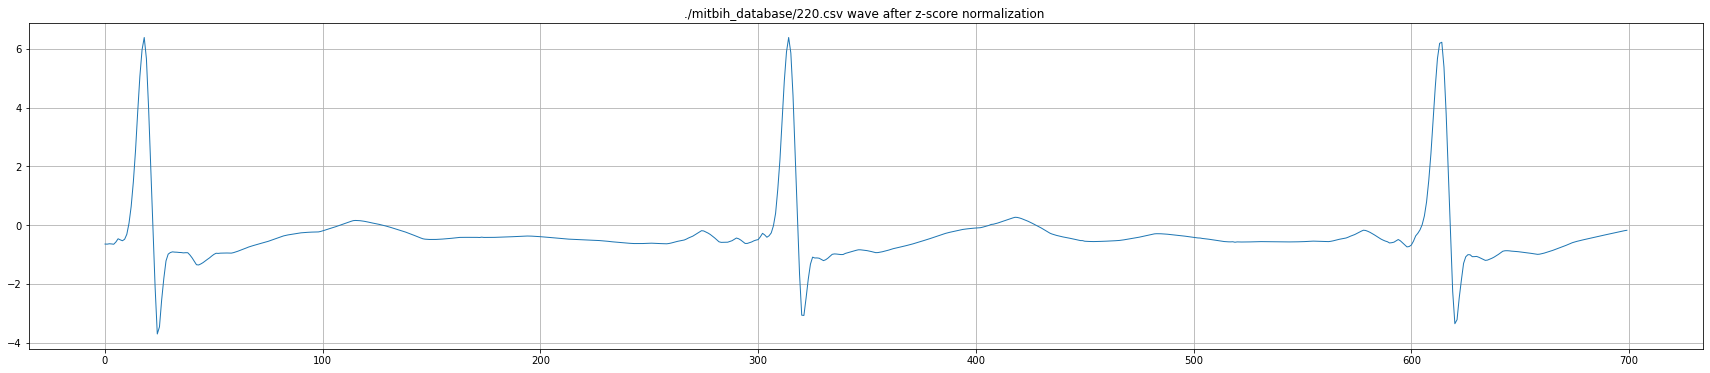

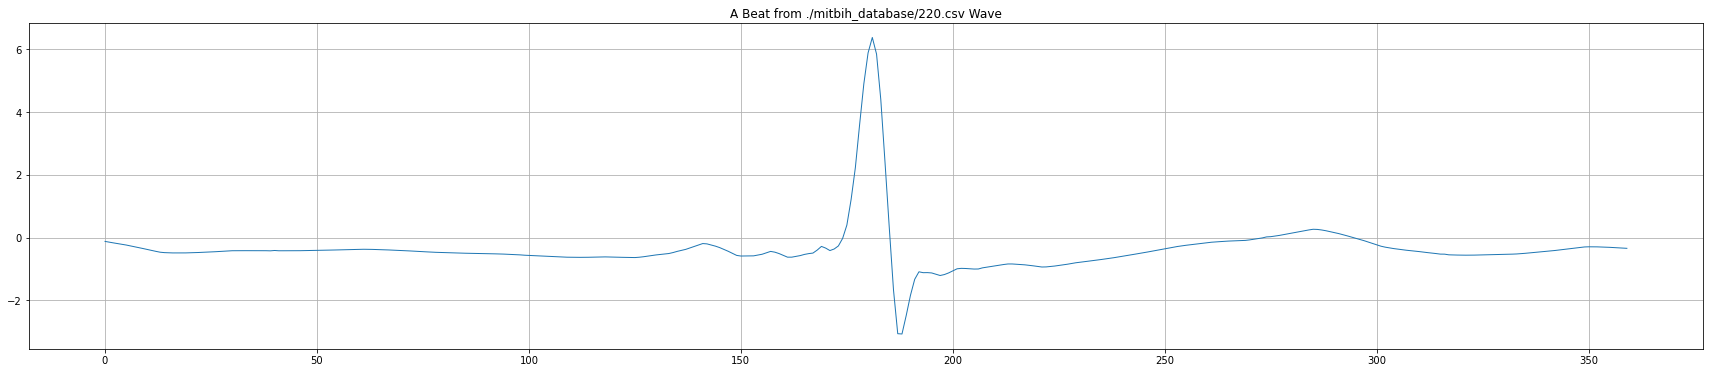

650000


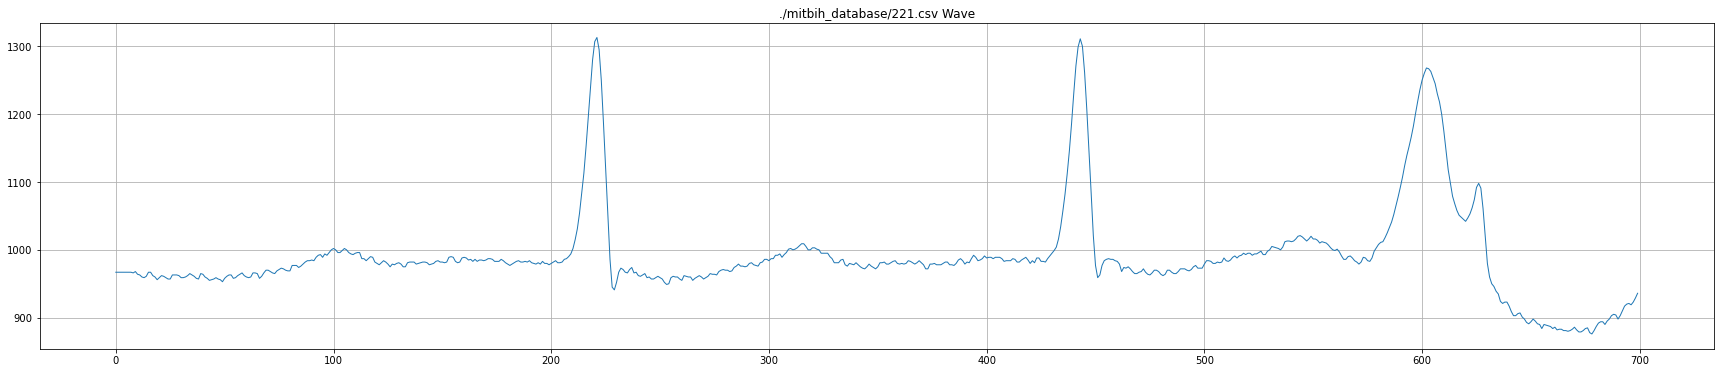

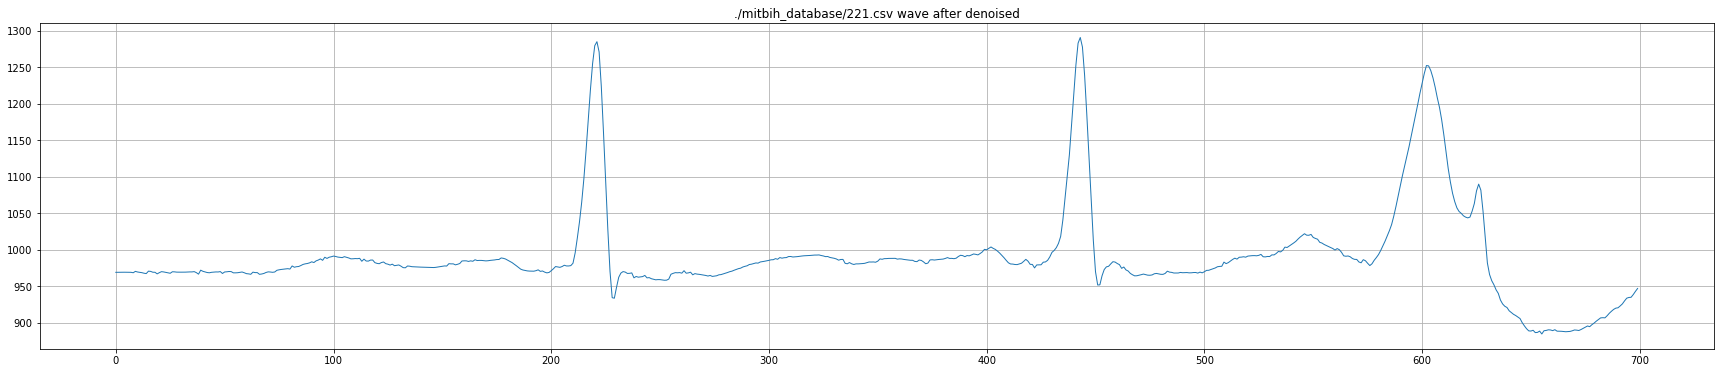

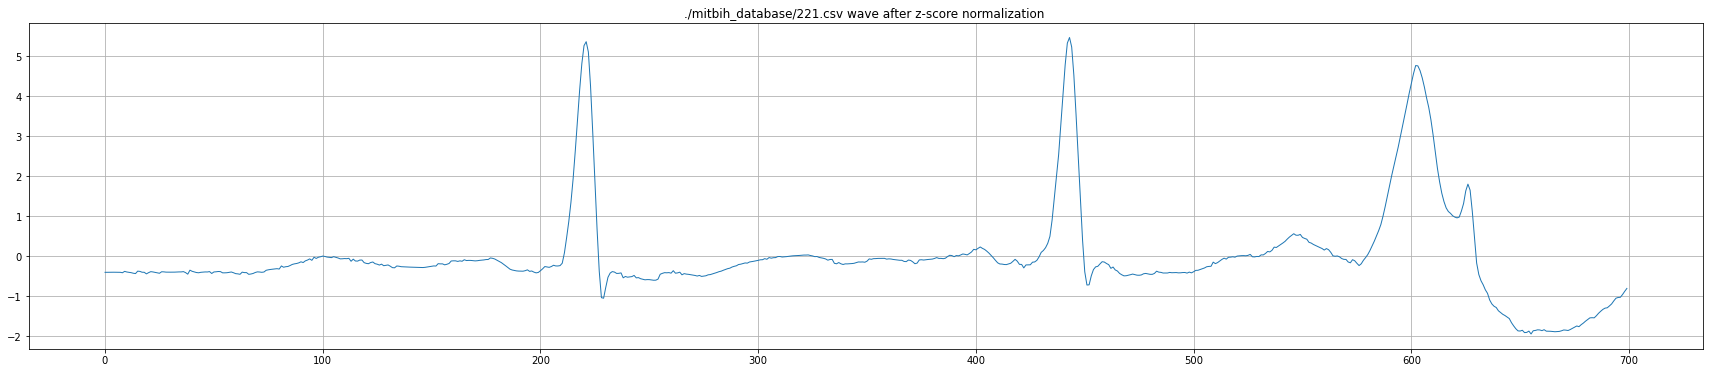

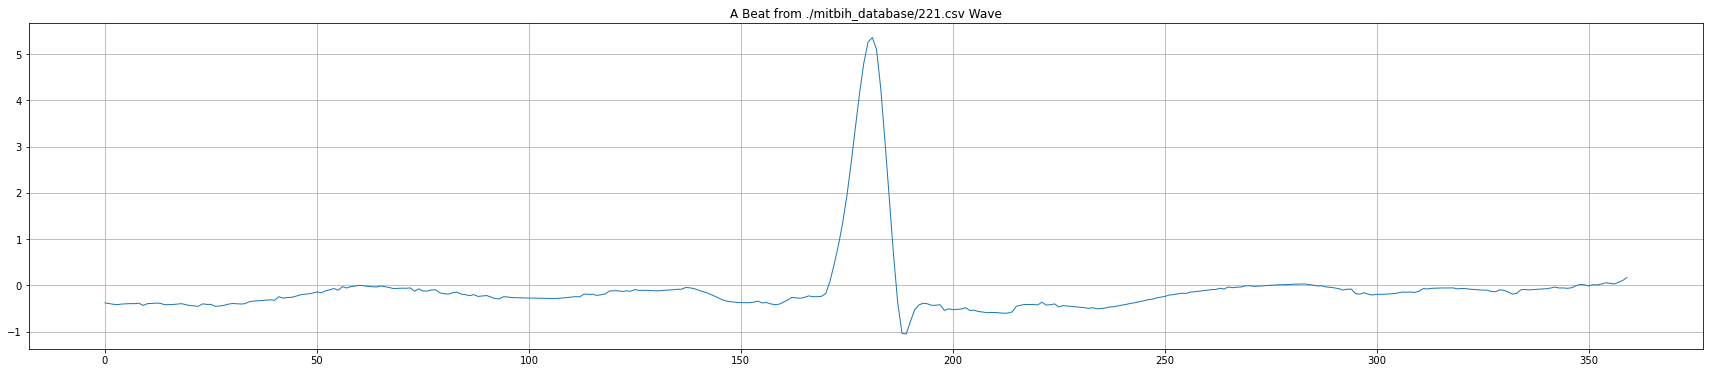

650000


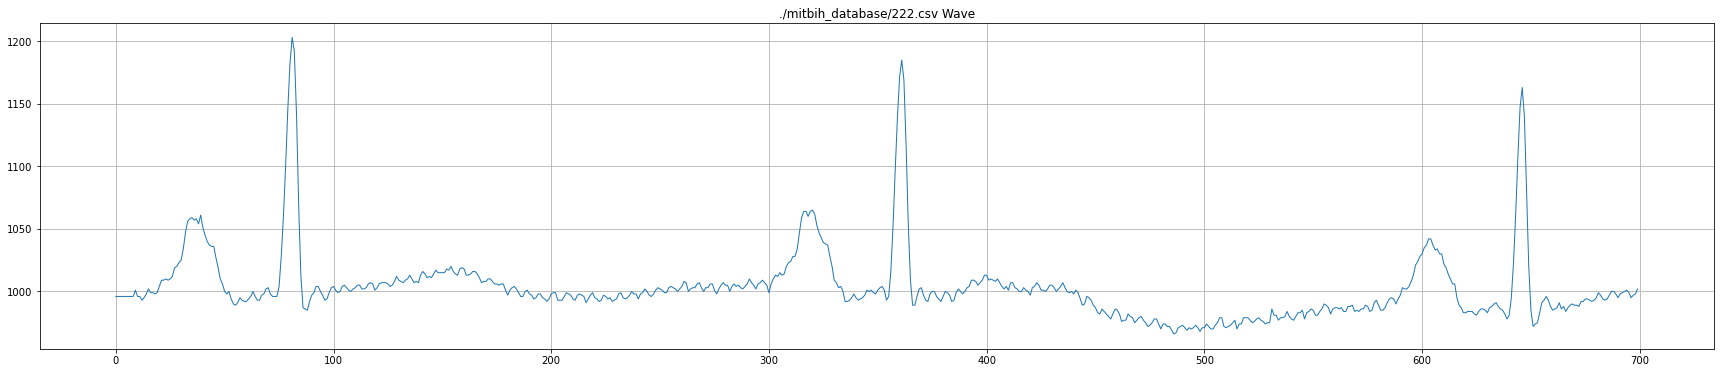

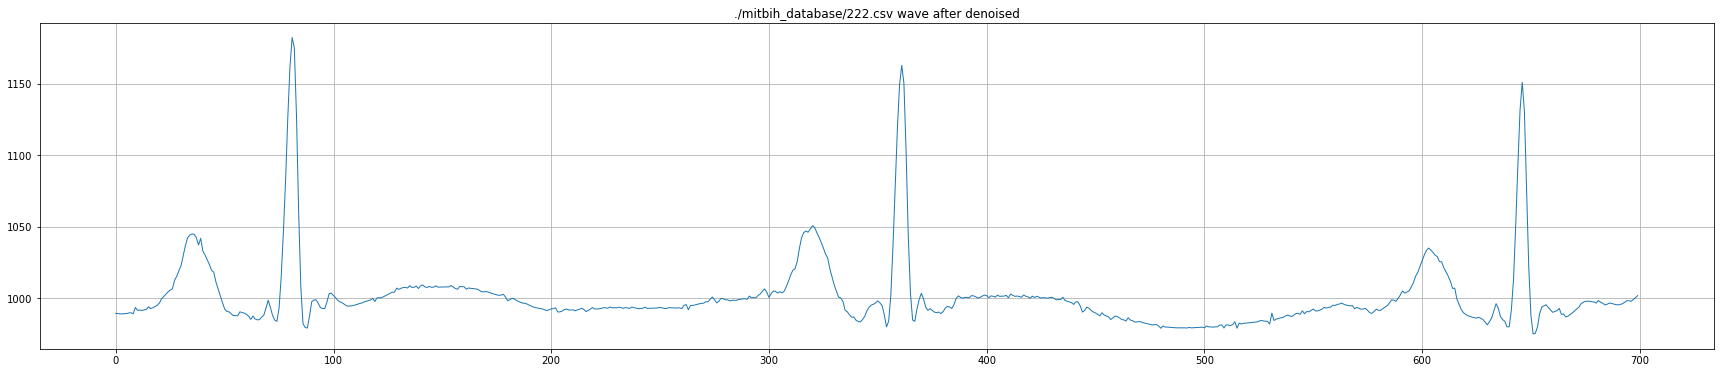

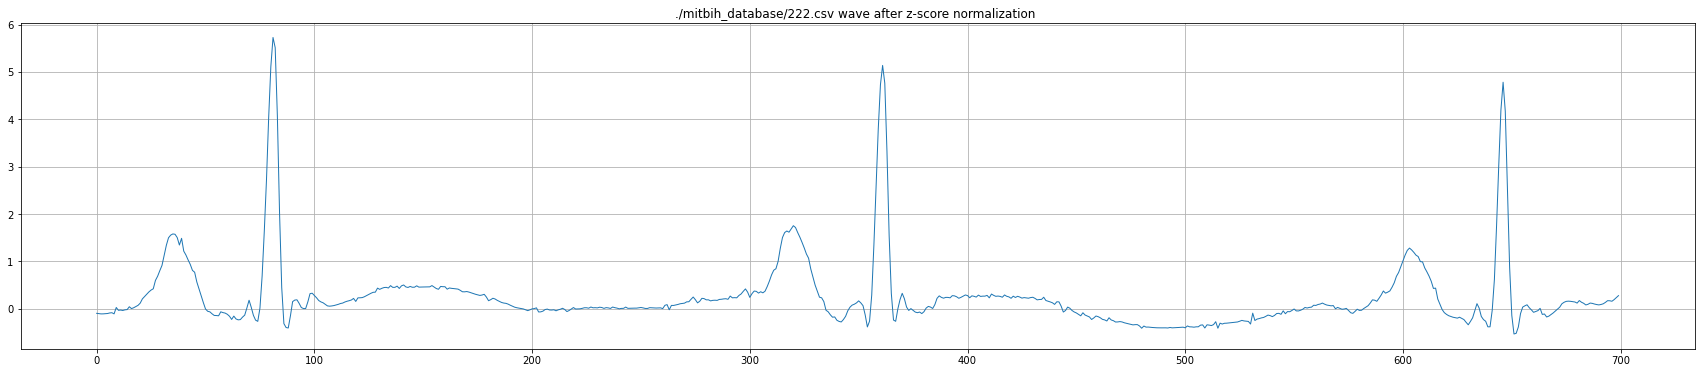

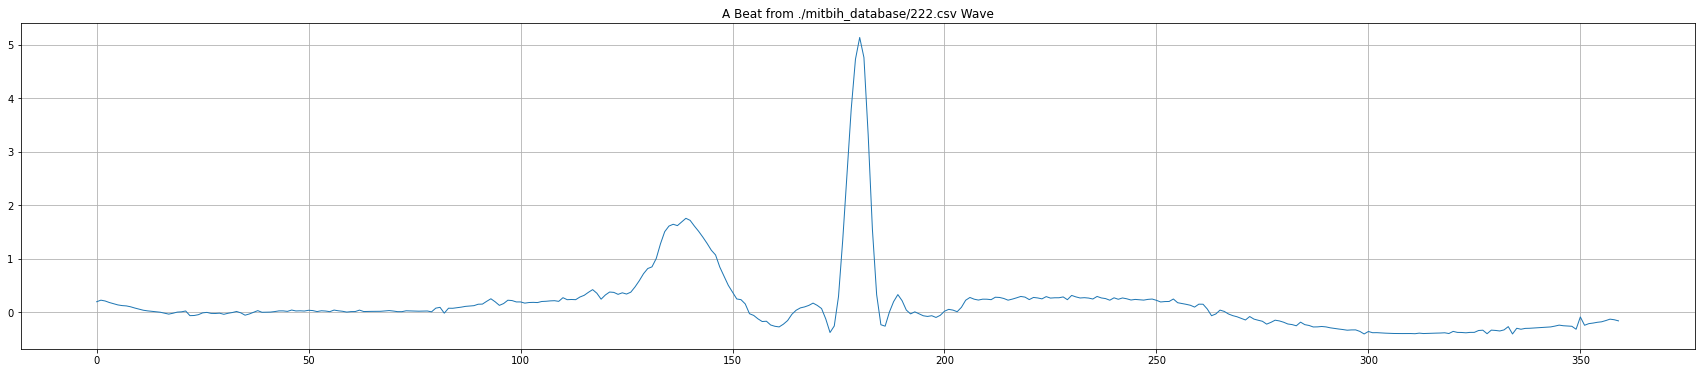

650000


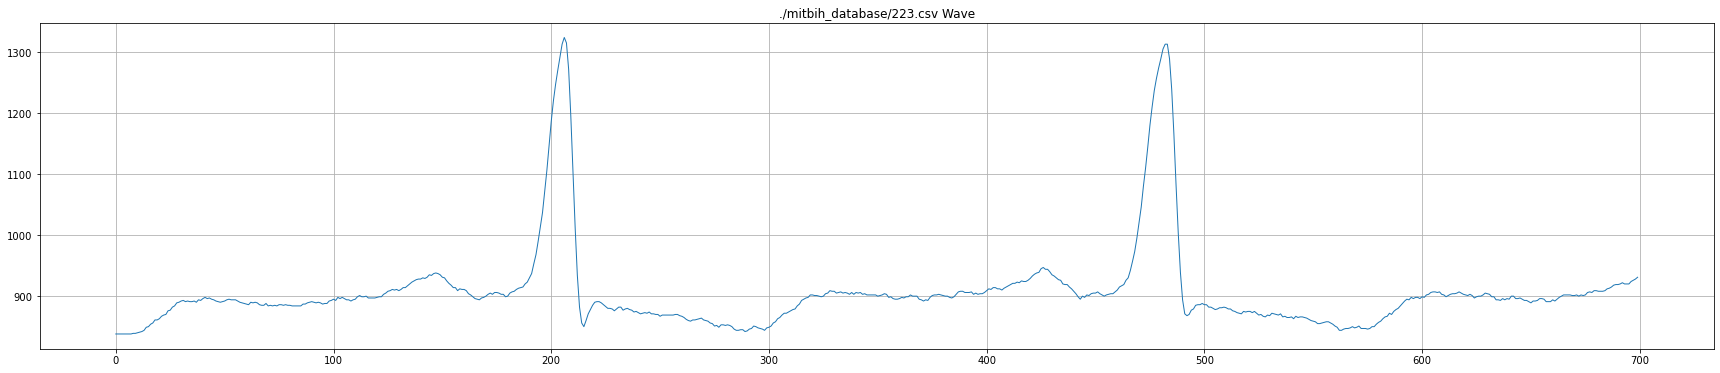

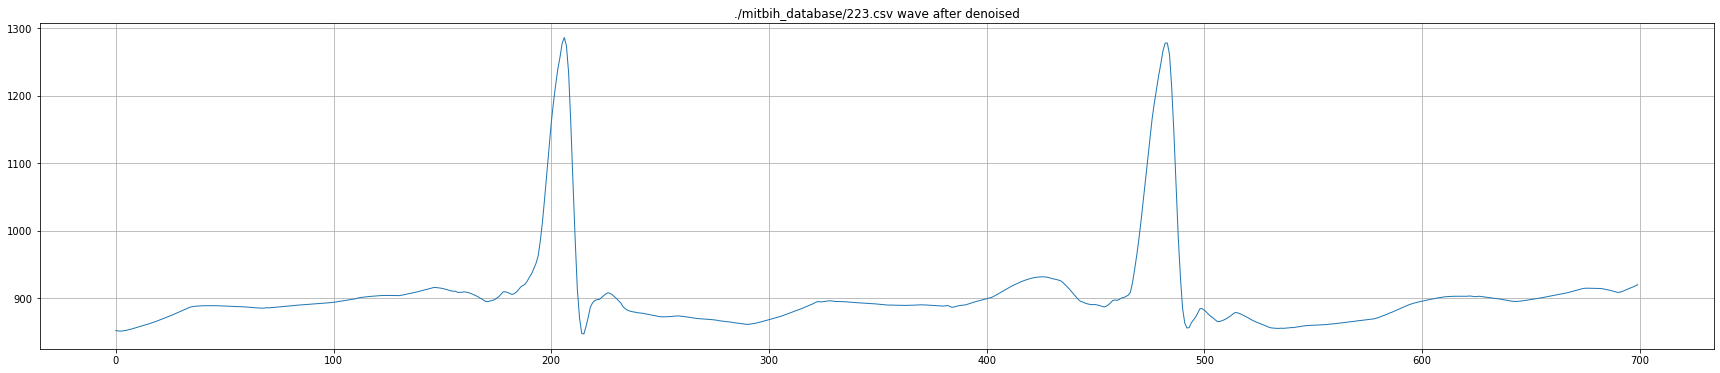

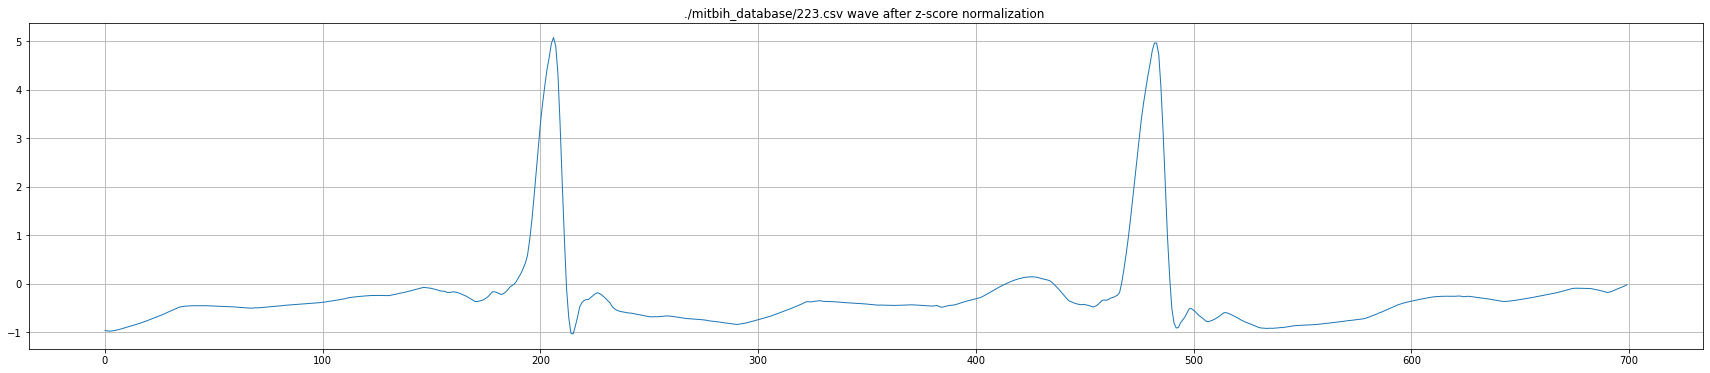

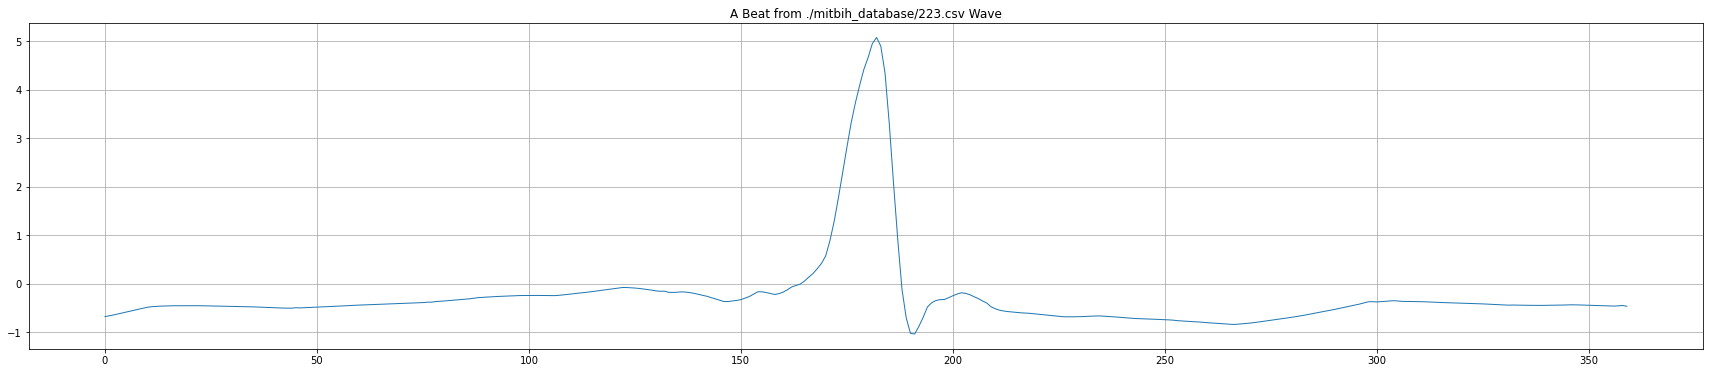

650000


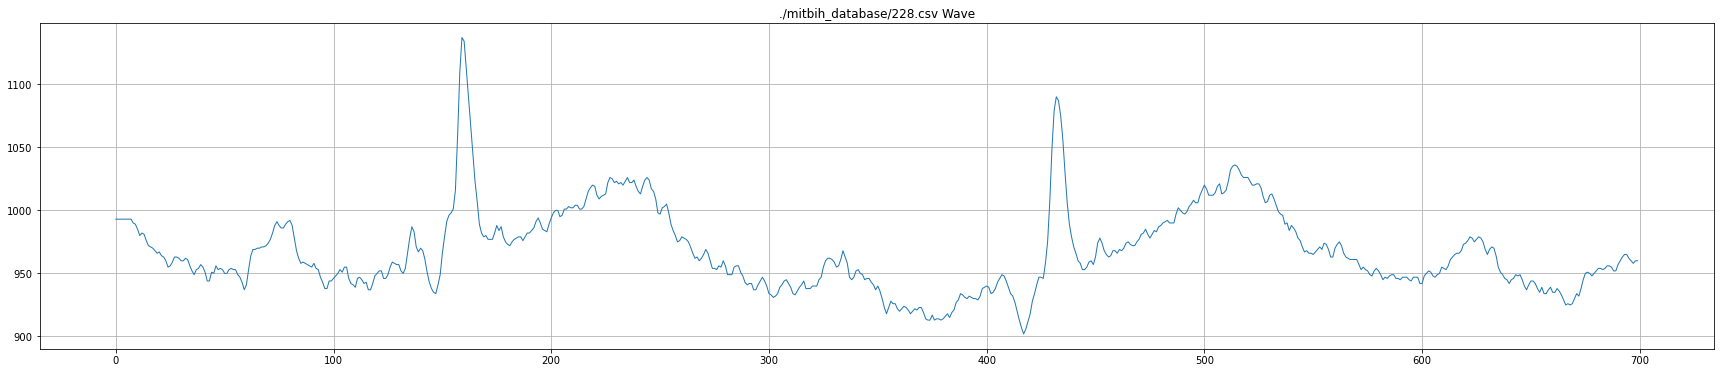

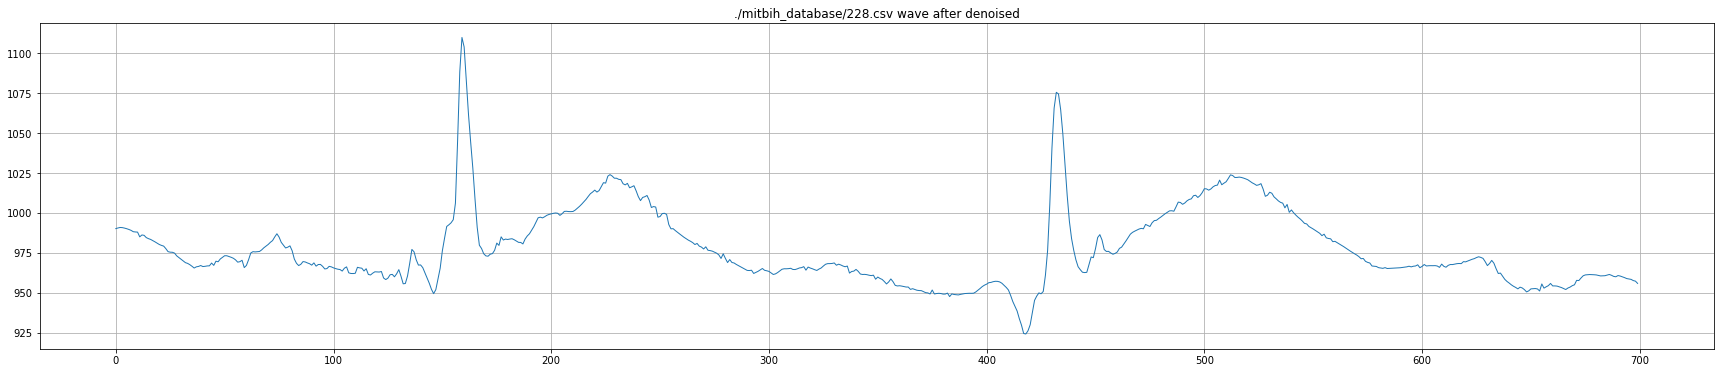

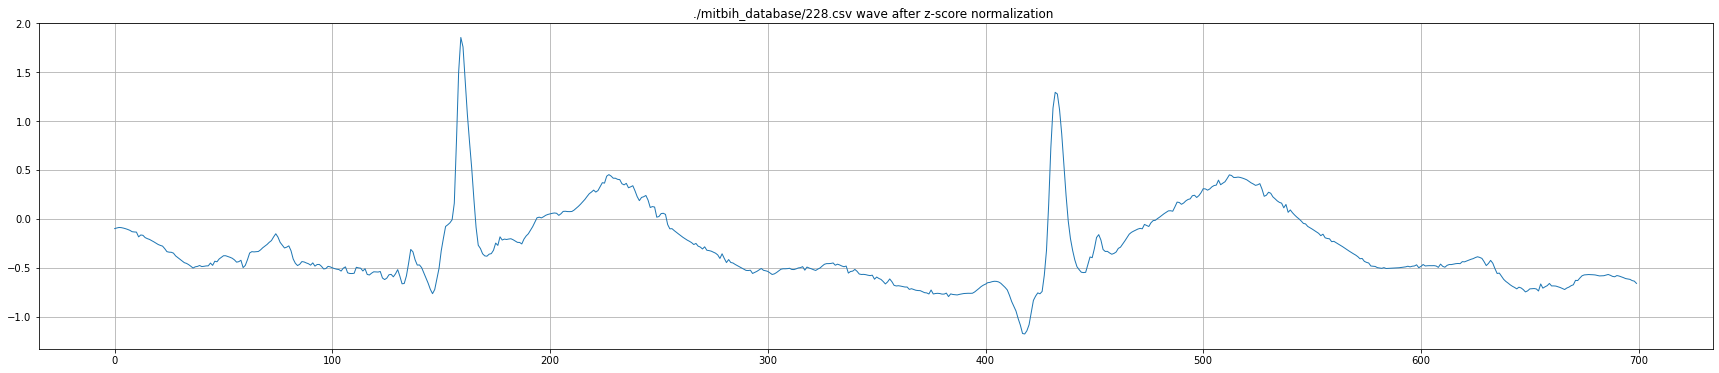

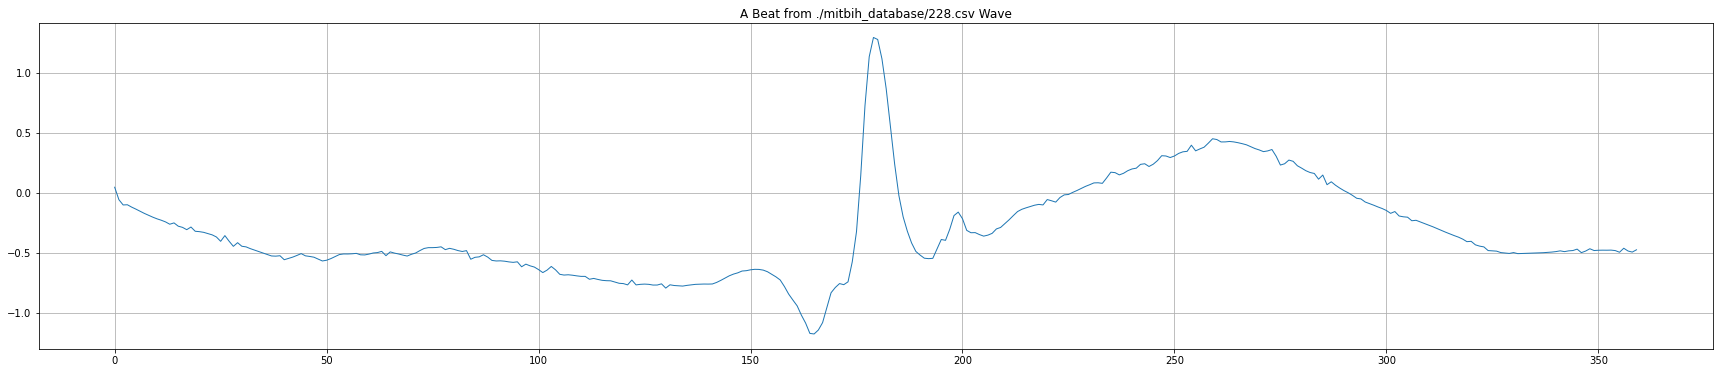

650000


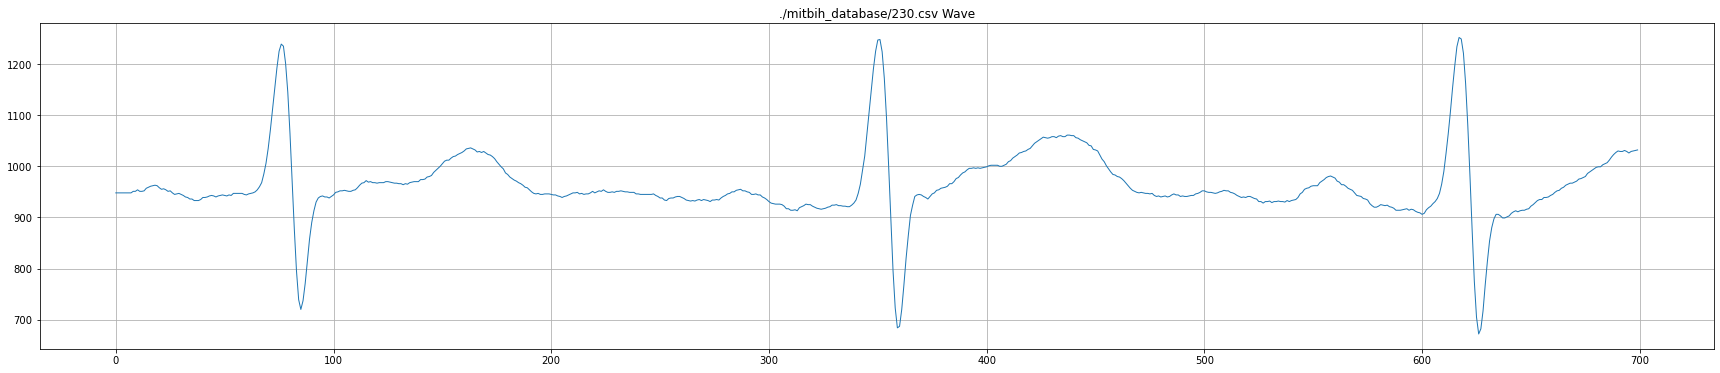

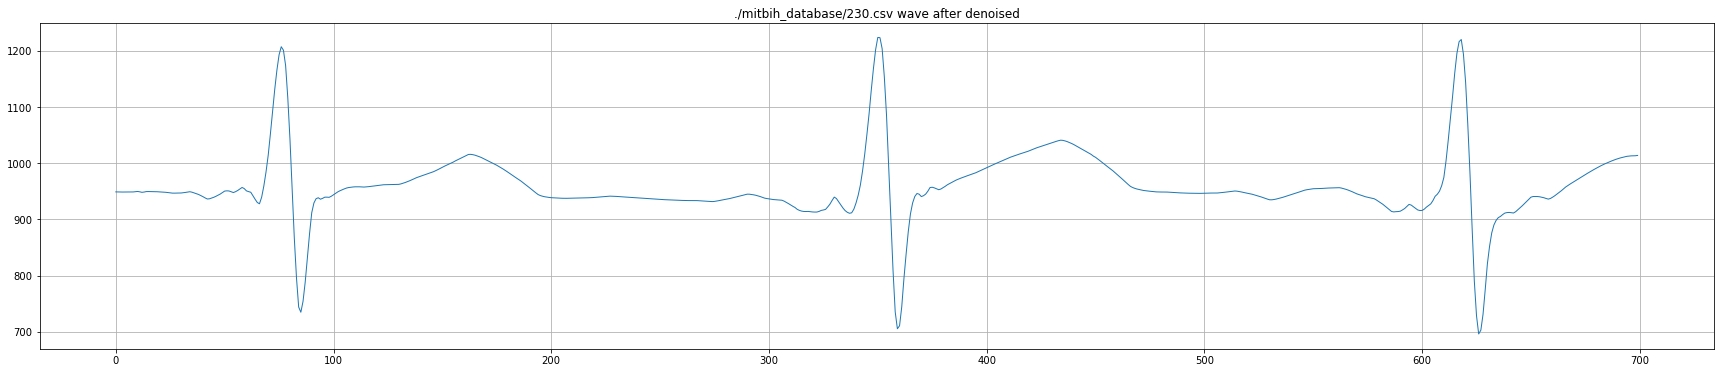

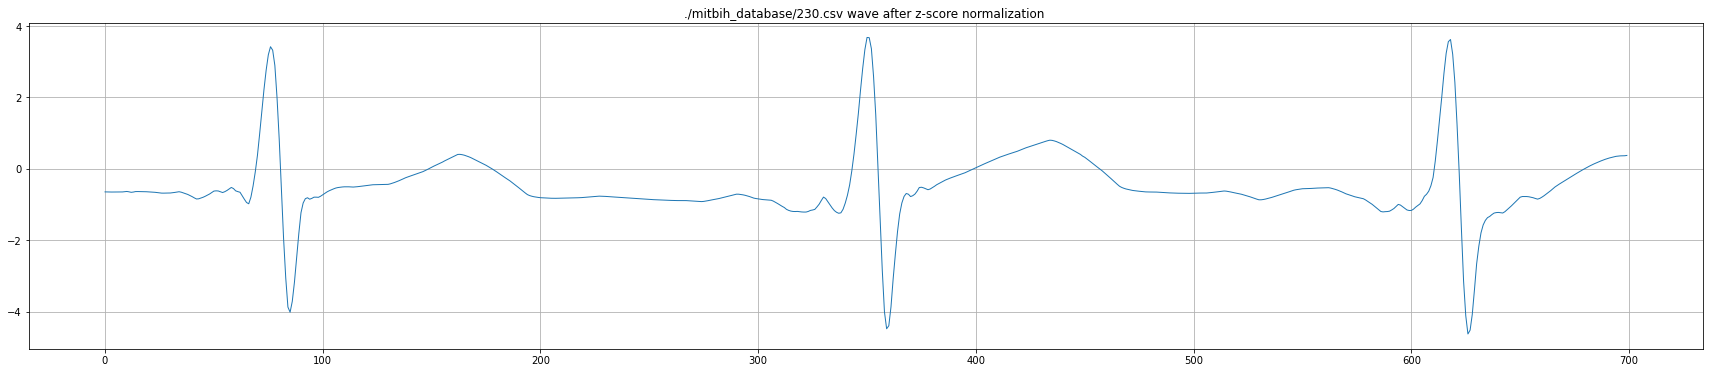

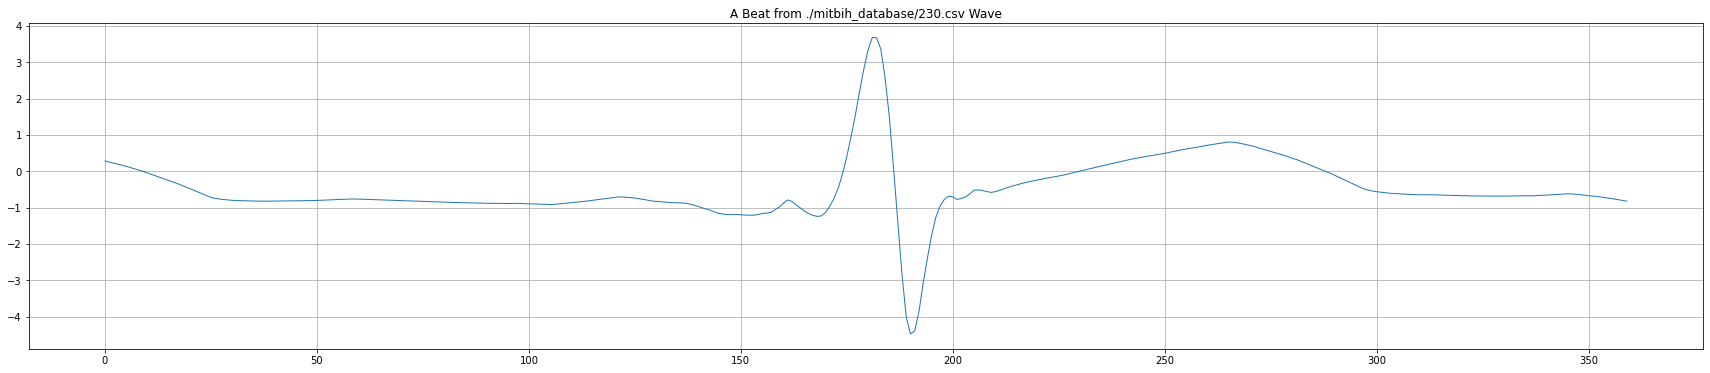

650000


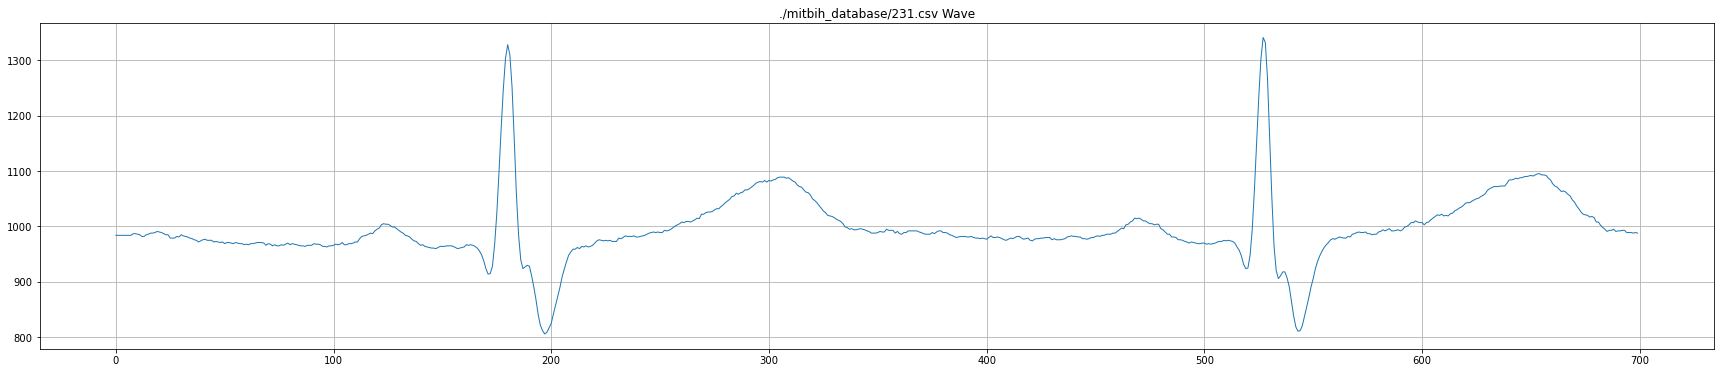

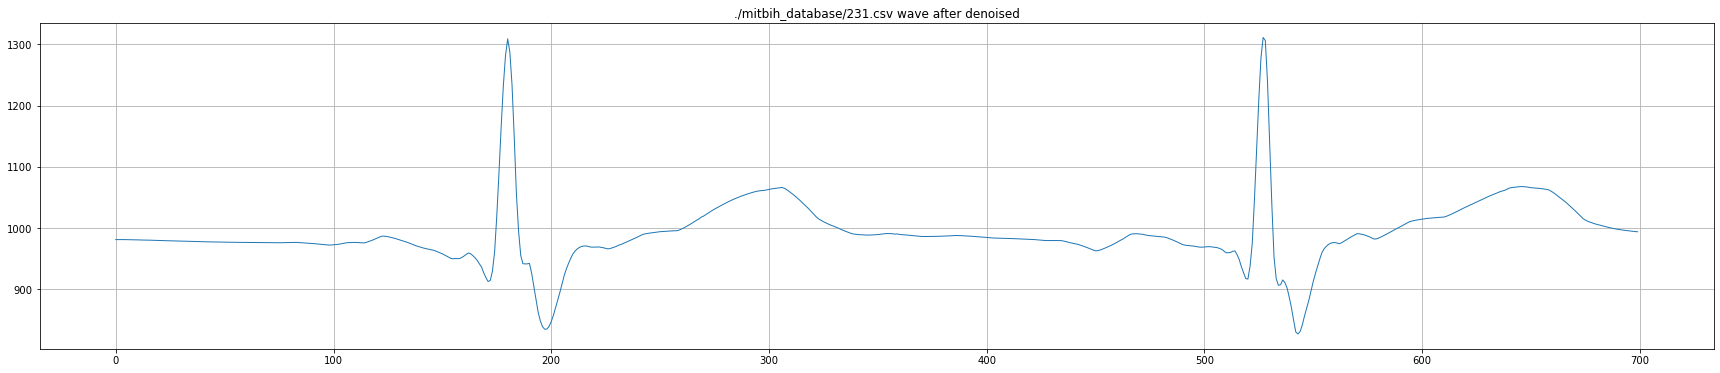

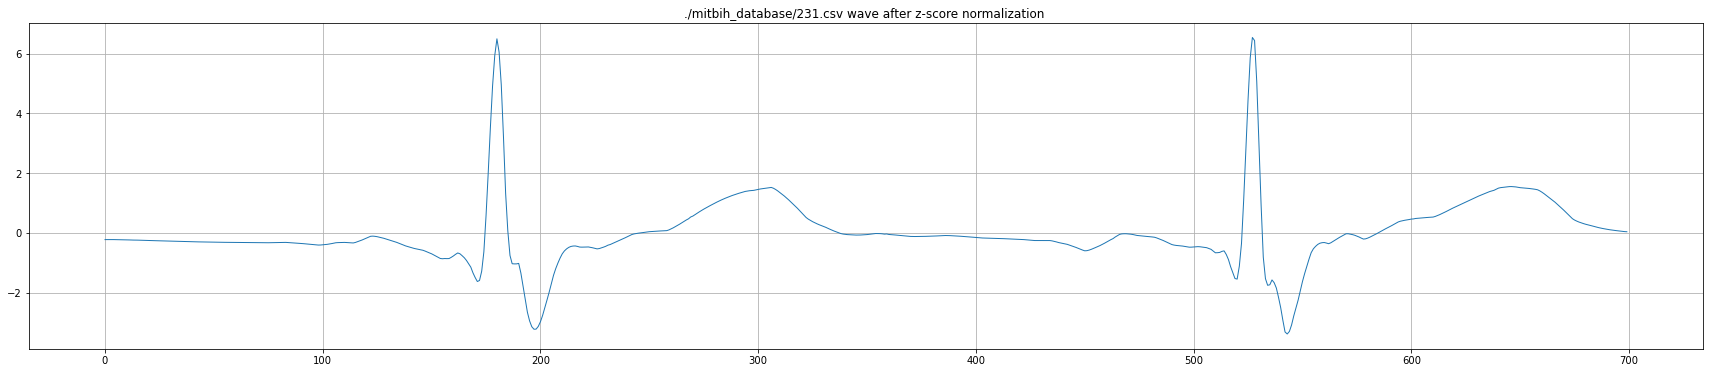

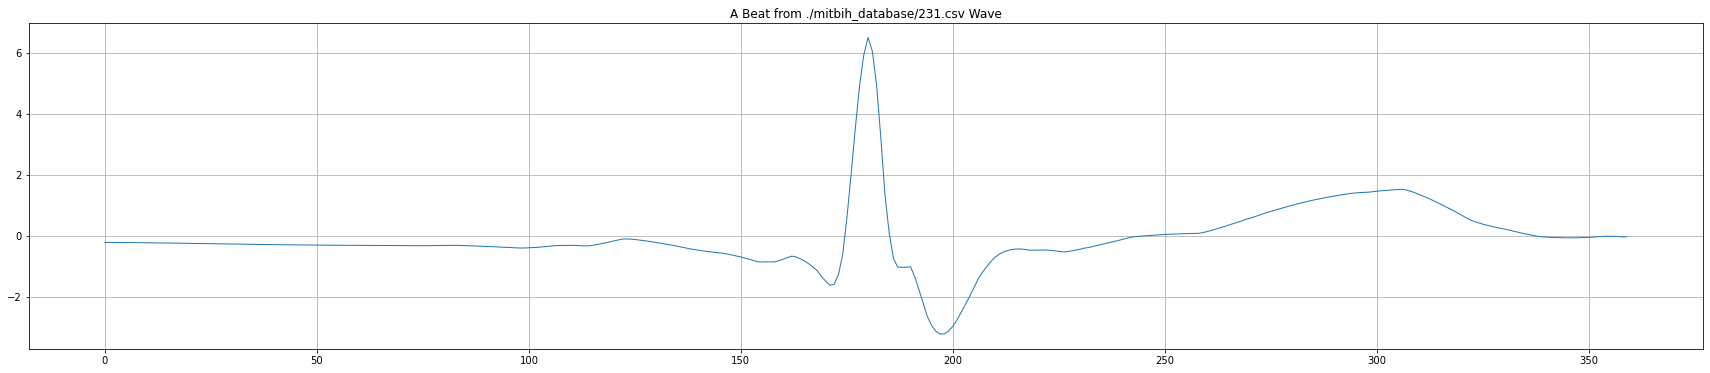

650000


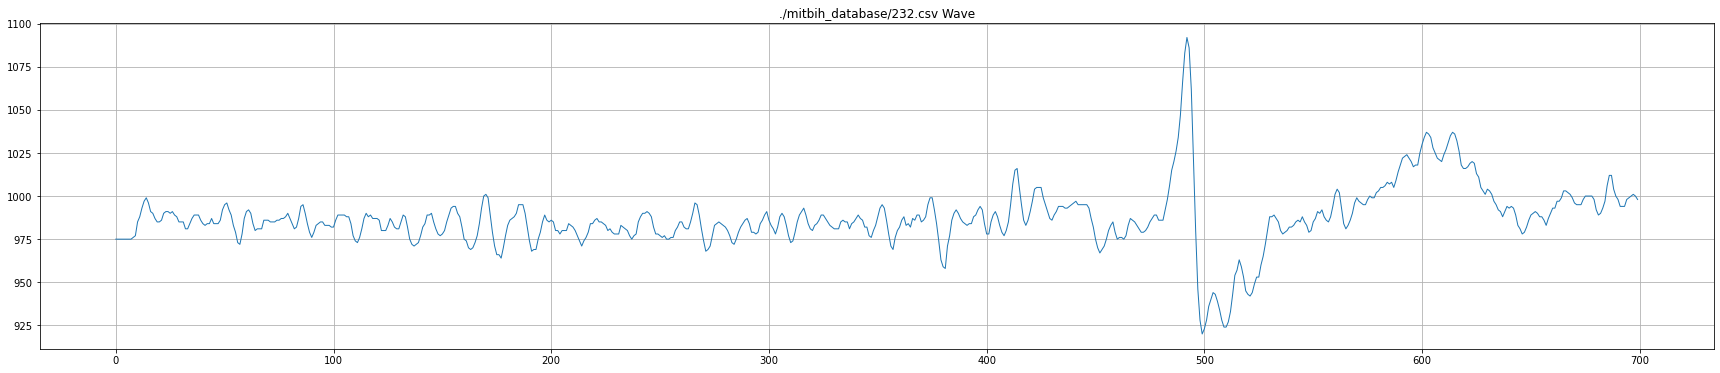

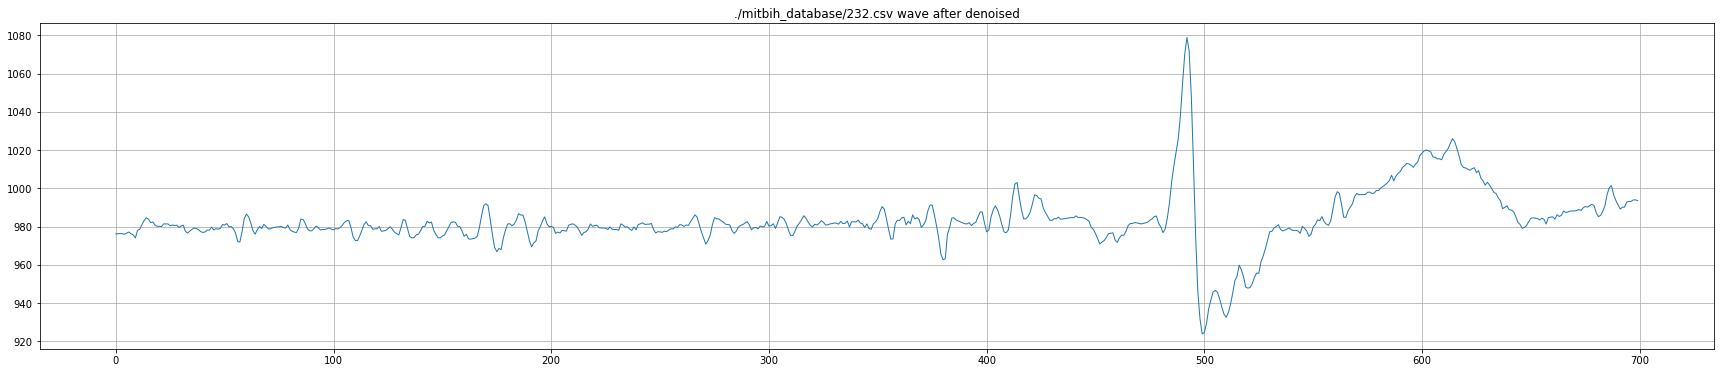

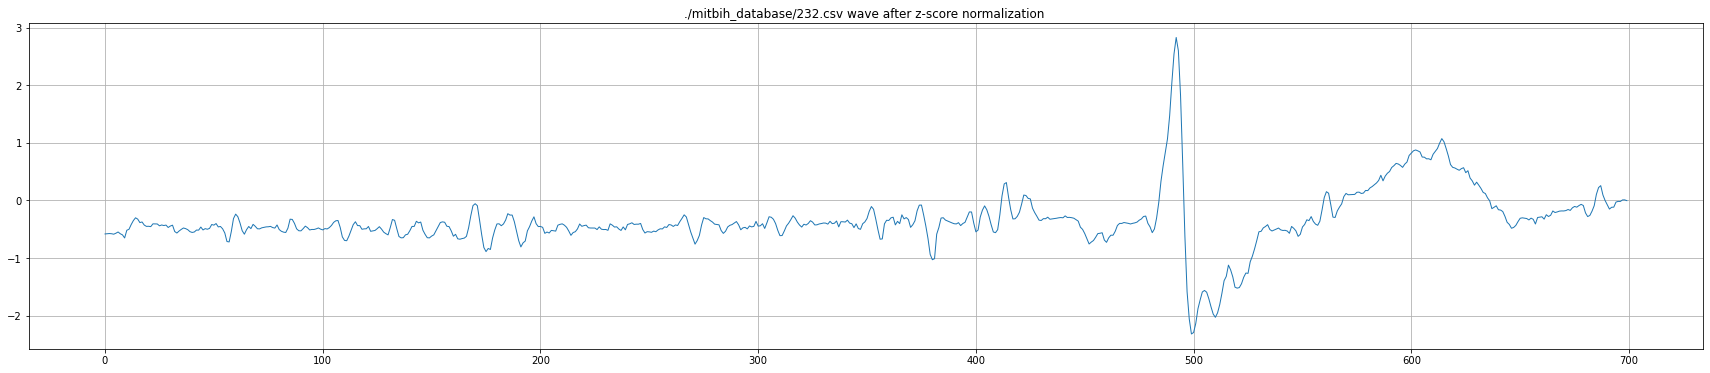

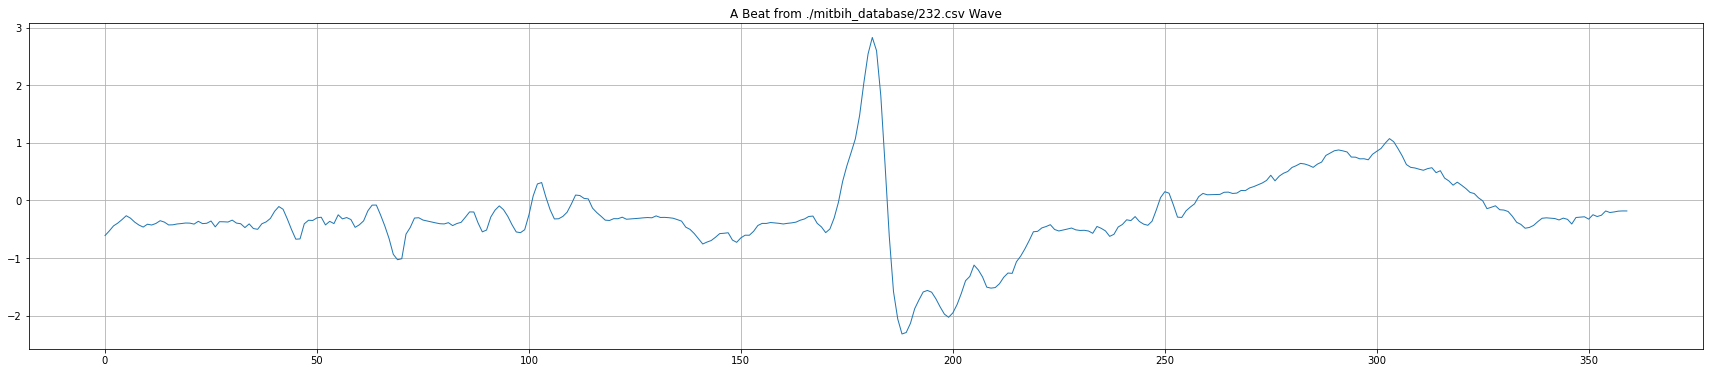

650000


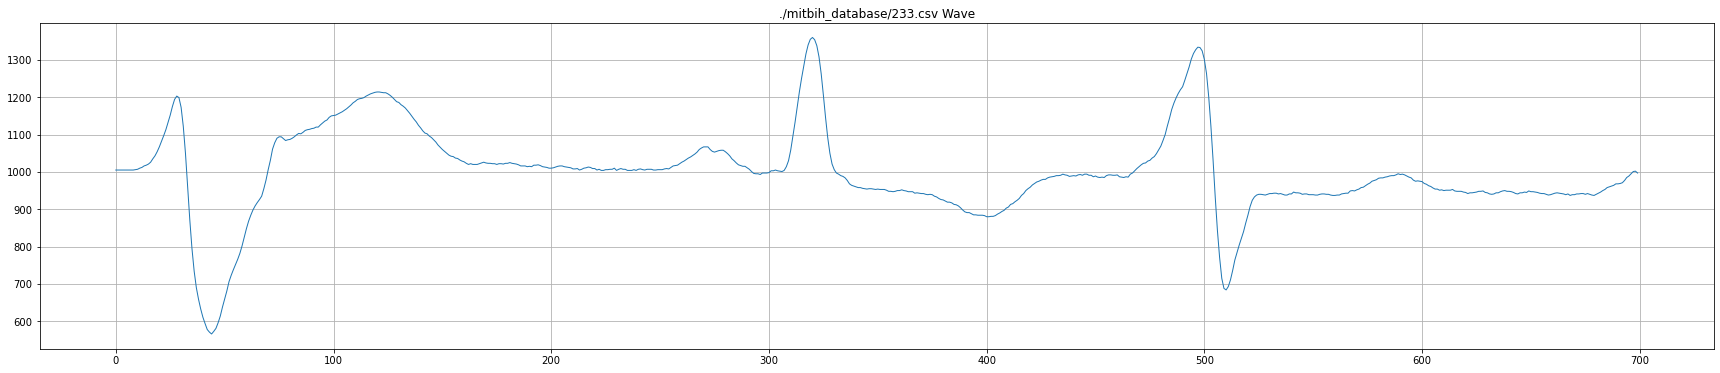

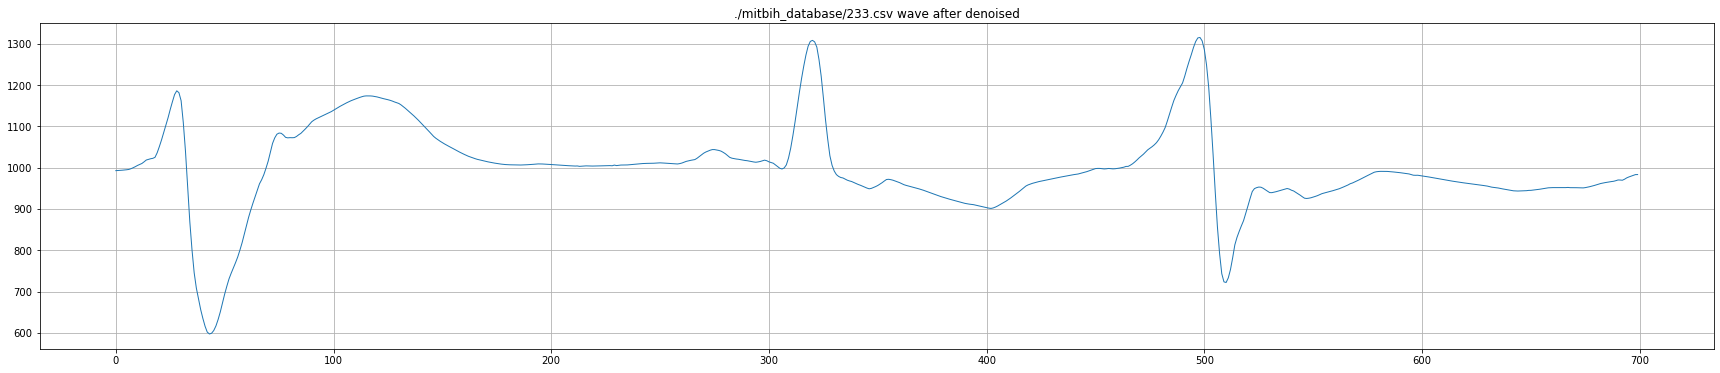

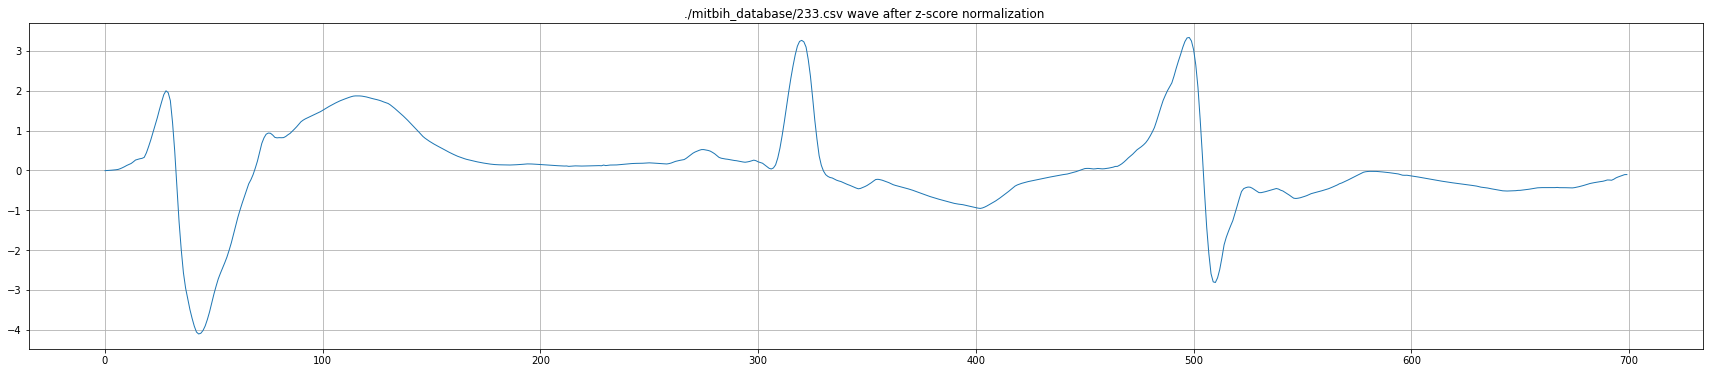

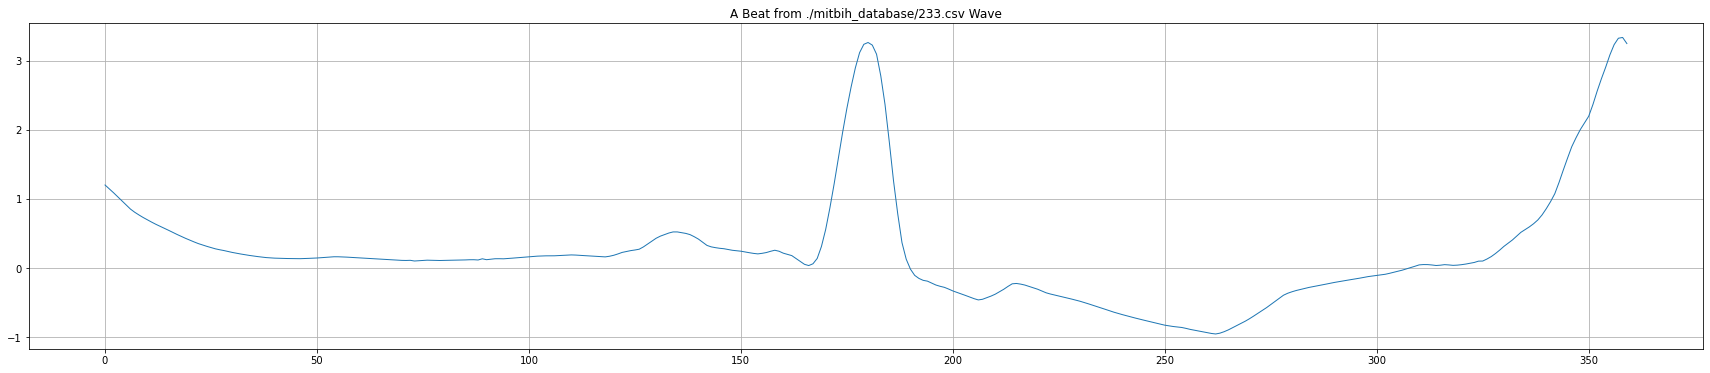

650000


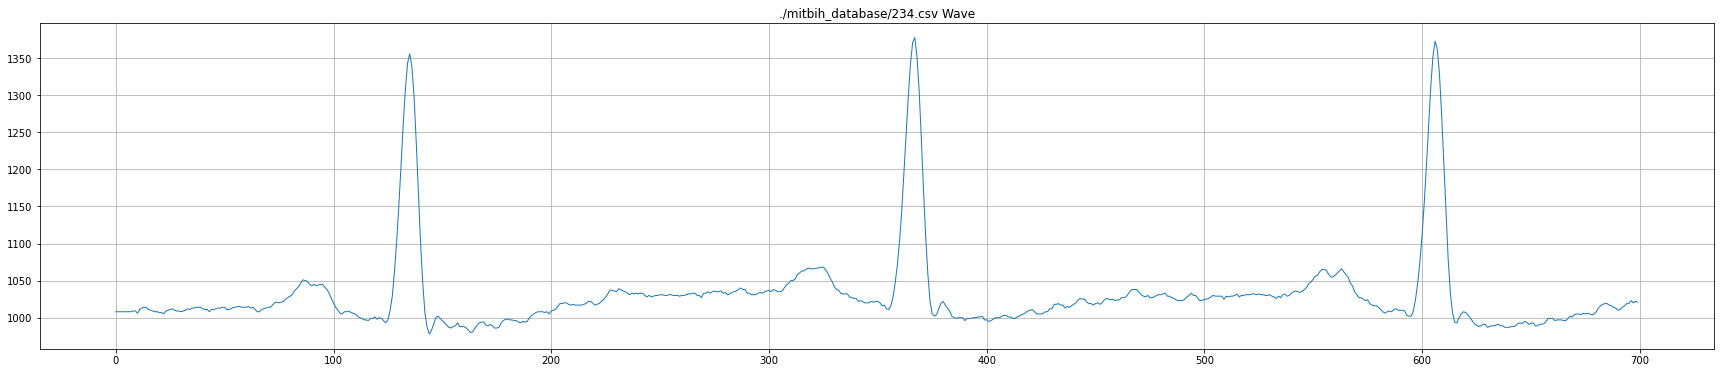

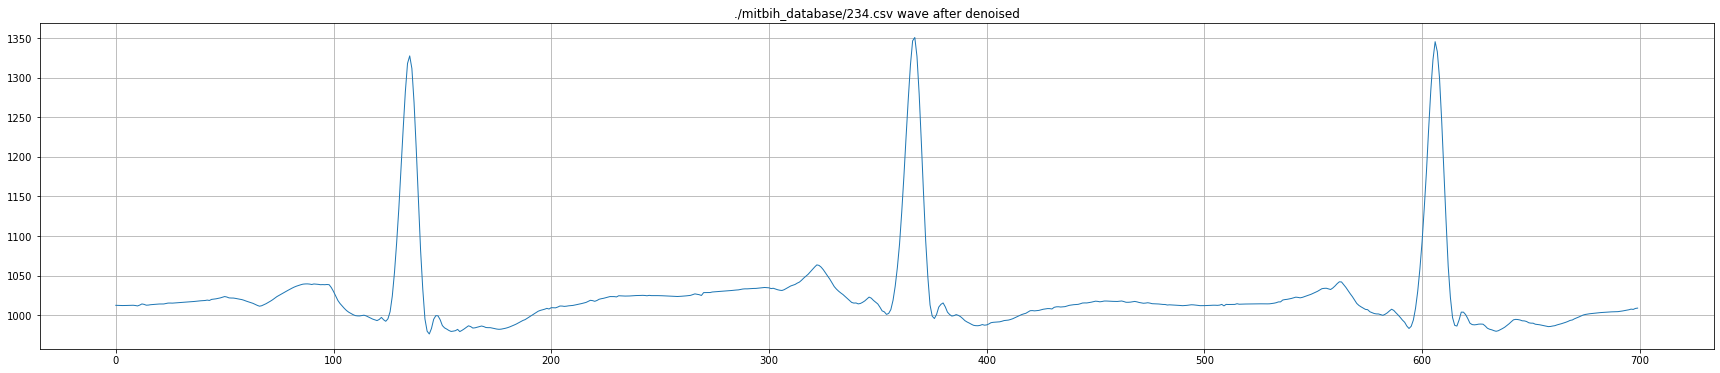

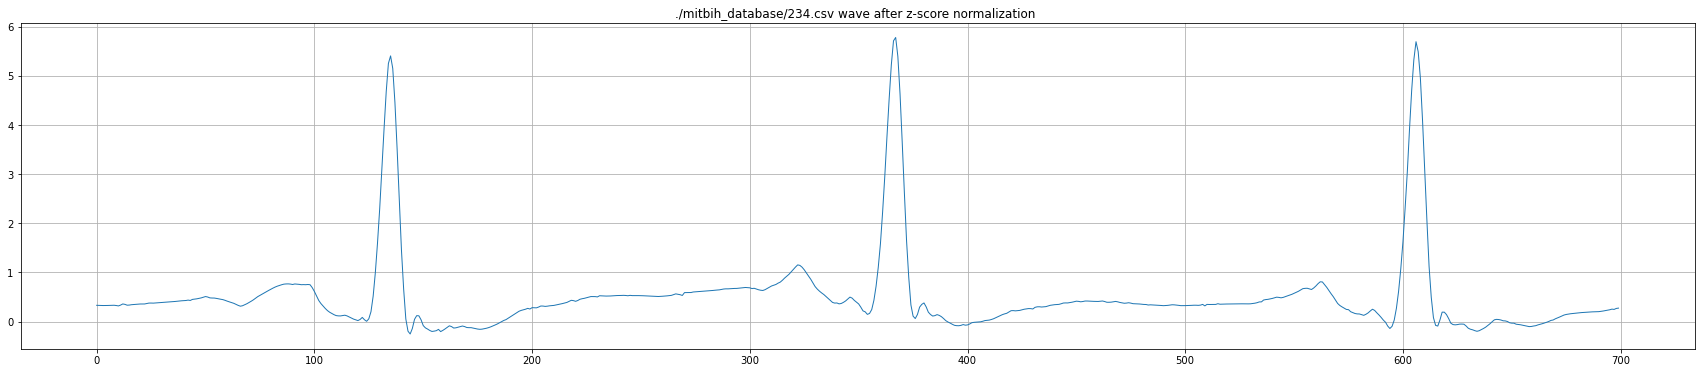

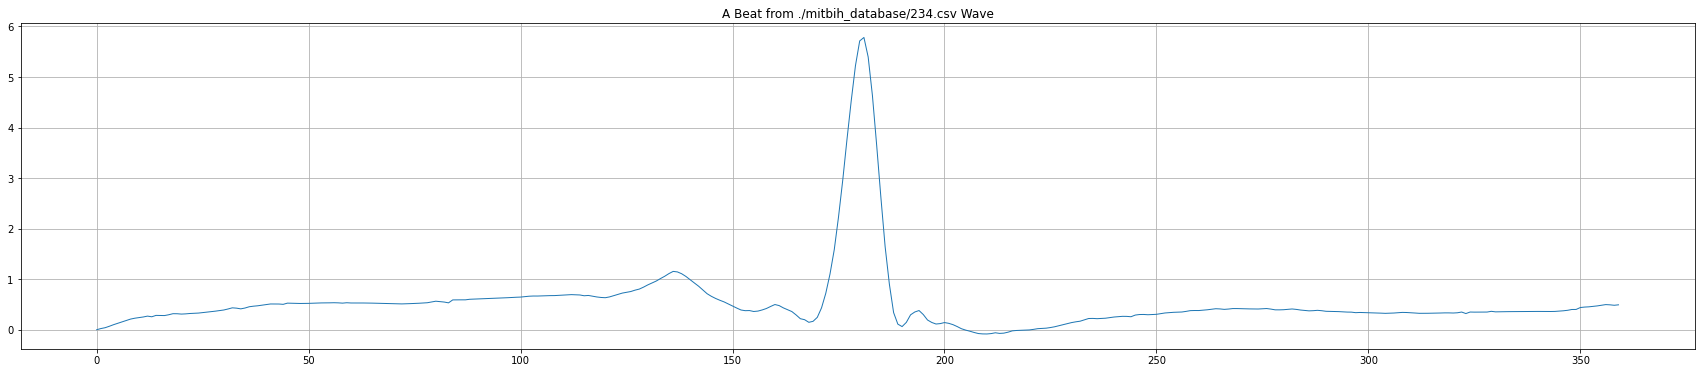

(304272, 360) (304272,)


In [11]:
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    # Plot an example to the signals
    if r == r:
        print(len(signals))
        # Plot each patient's signal
        plt.title(records[r] + " Wave")
        plt.plot(signals[0:700])
        plt.show()
    signals = denoise(signals)
    # Plot an example to the signals
    if r == r:
        # Plot each patient's signal
        plt.title(records[r] + " wave after denoised")
        plt.plot(signals[0:700])
        plt.show()
        
    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r == r:
        # Plot each patient's signal
        plt.title(records[r] + " wave after z-score normalization ")
        plt.plot(signals[0:700])
        plt.show()
        
    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
#                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
#                     pass
#                 else:
                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     ## REPLACE WITH R-PEAK DETECTION
                    # Plot an example to a beat    
                    if r == r and not example_beat_printed: 
                        plt.title("A Beat from " + records[r] + " Wave")
                        plt.plot(beat)
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))
